***
# Model Deployment : Estimating Lung Cancer Probabilities From Demographic Factors, Clinical Symptoms And Behavioral Indicators

***
### John Pauline Pineda <br> <br> *August 24, 2024*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Predictive Model Development](#1.6)
        * [1.6.1 Pre-Modelling Data Preparation](#1.6.1)
        * [1.6.2 Data Splitting](#1.6.2)
        * [1.6.3 Modelling Pipeline Development](#1.6.3)
            * [1.6.3.1 Individual Classifier](#1.6.3.1)
            * [1.6.3.2 Stacked Classifier](#1.6.3.2)
        * [1.6.4 Model Fitting using Original Training Data | Hyperparameter Tuning | Validation](#1.6.4)
            * [1.6.4.1 Individual Classifier](#1.6.4.1)
            * [1.6.4.2 Stacked Classifier](#1.6.4.2)
        * [1.6.5 Model Fitting using Upsampled Training Data | Hyperparameter Tuning | Validation](#1.6.5)
            * [1.6.5.1 Individual Classifier](#1.6.5.1)
            * [1.6.5.2 Stacked Classifier](#1.6.5.2)
        * [1.6.6 Model Fitting using Downsampled Training Data | Hyperparameter Tuning | Validation](#1.6.6)
            * [1.6.6.1 Individual Classifier](#1.6.6.1)
            * [1.6.6.2 Stacked Classifier](#1.6.6.2)
        * [1.6.7 Model Selection](#1.6.7)
        * [1.6.8 Model Testing](#1.6.8)
        * [1.6.9 Model Inference](#1.6.9)
    * [1.7 Predictive Model Deployment](#1.7)
        * [1.7.1 API Development](#1.7.1)
        * [1.7.2 UI Development](#1.7.2)
        * [1.7.3 Model Serving](#1.7.2)
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

This project implements the **Logistic Regression Model** as an independent learner and as a meta-learner of a stacking ensemble model with **Decision Trees**, **Random Forest**, and **Support Vector Machine** classifier algorithms using various helpful packages in <mark style="background-color: #CCECFF"><b>Python</b></mark> to estimate probability of a dichotomous categorical response variable by modelling the relationship between one or more predictor variables and a binary outcome. The resulting predictions derived from the candidate models were evaluated using the F1 score that ensures both false positives and false negatives are considered, providing a more balanced view of model classification performance. Resampling approaches including **Synthetic Minority Oversampling Technique** and **Condensed Nearest Neighbors** for imbalanced classification problems were applied by augmenting the dataset used for model training based on its inherent characteristics to achieve a more reasonably balanced distribution between the majority and minority classes. Additionally, **Class Weights** were also implemented by amplifying the loss contributed by the minority class and diminishing the loss from the majority class, forcing the model to focus more on correctly predicting the minority class. Penalties including **Least Absolute Shrinkage and Selection Operator** and **Ridge Regularization** were evaluated to impose constraints on the weight updates. All results were consolidated in a [<span style="color: #FF0000"><b>Summary</b></span>](#Summary) presented at the end of the document. 

[Machine Learning Classification Models](http://appliedpredictivemodeling.com/) are algorithms that learn to assign predefined categories or labels to input data based on patterns and relationships identified during the training phase. Classification is a supervised learning task, meaning the models are trained on a labeled dataset where the correct output (class or label) is known for each input. Once trained, these models can predict the class of new, unseen instances.

[Binary Classification Learning](http://appliedpredictivemodeling.com/) refers to a predictive modelling problem where only two class labels are predicted for a given sample of input data. These models use the training data set and calculate how to best map instances of input data to the specific class labels. Typically, binary classification tasks involve one class that is the normal state (assigned the class label 0) and another class that is the abnormal state (assigned the class label 1). It is common to structure a binary classification task with a model that predicts a Bernoulli probability distribution for each instance. The Bernoulli distribution is a discrete probability distribution that covers a case where an event will have a binary outcome as either a 0 or 1. For a binary classification, this means that the model predicts a probability of an instance belonging to class 1, or the abnormal state.

[Imbalanced Class Learning](http://appliedpredictivemodeling.com/) refers to the process of building and training models to predict a dichotomous categorical response in scenarios where the two classes are not equally represented in the dataset. This imbalance can cause challenges in training machine learning models, leading to biased predictions that favor the majority class or misleading estimation of model performance using the accuracy metric. Several strategies can be employed to effectively handle class imbalance including resampling, class weighting, cost-sensitive learning, and choosing appropriate metrics. in effect, models can be trained to perform well on both the minority and majority classes, ensuring more reliable and fair predictions.

[Regularization Methods](http://appliedpredictivemodeling.com/), in the context of binary classification using Logistic Regression, are primarily used to prevent overfitting and improve the model's generalization to new data. Overfitting occurs when a model is too complex and learns not only the underlying pattern in the data but also the noise. This leads to poor performance on unseen data. Regularization introduces a penalty for large coefficients in the model, which helps in controlling the model complexity. In Logistic Regression, this is done by adding a regularization term to the loss function, which penalizes large values of the coefficients. This forces the model to keep the coefficients small, thereby reducing the likelihood of overfitting. Addiitonally, by penalizing the complexity of the model through the regularization term, regularization methods also help the model generalize better to unseen data. This is because the model is less likely to overfit the training data and more likely to capture the true underlying pattern.

## 1.1. Data Background <a class="anchor" id="1.1"></a>

An open [Lung Cancer Dataset](https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer/data) from [Kaggle](https://www.kaggle.com/) (with all credits attributed to [Nancy Al Aswad](https://www.kaggle.com/nancyalaswad90)) was used for the analysis as consolidated from the following primary source: 
1. Research Paper entitled **Optimal Discriminant Plane for a Small Number of Samples and Design Method of Classifier on the Plane** from the [Pattern Recognition](https://www.sciencedirect.com/science/article/abs/pii/003132039190074F) Journal

This study hypothesized that demographic factors, clinical symptoms, and behavioral indicators influence lung cancer probabilities between patients.

The dichotomous categorical variable for the study is:
* <span style="color: #FF0000">LUNG_CANCER</span> - Lung cancer status of the patient (YES, lung cancer cases | NO, non-lung cancer case)

The predictor variables for the study are:
* <span style="color: #FF0000">GENDER</span> - Patient's sex (M, Male | F, Female)
* <span style="color: #FF0000">AGE</span> - Patient's age (Years)
* <span style="color: #FF0000">SMOKING</span> - Behavioral indication of smoking (1, Absent | 2, Present)
* <span style="color: #FF0000">YELLOW_FINGERS</span> - Clinical symptom of yellowing of fingers (1, Absent | 2, Present)
* <span style="color: #FF0000">ANXIETY</span> - Behavioral indication of experiencing anxiety (1, Absent | 2, Present)
* <span style="color: #FF0000">PEER_PRESSURE</span> - Behavioral indication of experiencing peer pressure (1, Absent | 2, Present)
* <span style="color: #FF0000">CHRONIC DISEASE</span> - Clinical symptom of chronic diseases (1, Absent | 2, Present)
* <span style="color: #FF0000">FATIGUE</span> - Clinical symptom of chronic fatigue (1, Absent | 2, Present)
* <span style="color: #FF0000">ALLERGY</span> - Clinical symptom of allergies (1, Absent | 2, Present)
* <span style="color: #FF0000">WHEEZING</span> - Clinical symptom of wheezing (1, Absent | 2, Present)
* <span style="color: #FF0000">ALCOHOL CONSUMING</span> - Behavioral indication of consuming alcohol (1, Absent | 2, Present)
* <span style="color: #FF0000">COUGHING</span> - Clinical symptom of wheezing (1, Absent | 2, Present)
* <span style="color: #FF0000">SHORTNESS OF BREATH</span> - Clinical symptom of shortness of breath (1, Absent | 2, Present)
* <span style="color: #FF0000">SWALLOWING DIFFICULTY</span> - Clinical symptom of difficulty in swallowing (1, Absent | 2, Present)
* <span style="color: #FF0000">CHEST PAIN</span> - Clinical symptom of chest pain (1, Absent | 2, Present)


## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The dataset is comprised of:
    * **309 rows** (observations)
    * **16 columns** (variables)
        * **1/16 target** (categorical)
             * <span style="color: #FF0000">LUNG_CANCER</span>
        * **1/16 predictor** (numeric)
             * <span style="color: #FF0000">AGE</span>
        * **14/16 predictors** (categorical)
             * <span style="color: #FF0000">GENDER</span>
             * <span style="color: #FF0000">SMOKING</span>
             * <span style="color: #FF0000">YELLOW_FINGERS</span>
             * <span style="color: #FF0000">ANXIETY</span>
             * <span style="color: #FF0000">PEER_PRESSURE</span>
             * <span style="color: #FF0000">CHRONIC_DISEASE</span>
             * <span style="color: #FF0000">FATIGUE</span>
             * <span style="color: #FF0000">ALLERGY</span>
             * <span style="color: #FF0000">WHEEZING</span>
             * <span style="color: #FF0000">ALCOHOL CONSUMING </span>
             * <span style="color: #FF0000">COUGHING</span>
             * <span style="color: #FF0000">SHORTNESS OF BREATH</span>
             * <span style="color: #FF0000">SWALLOWING DIFFICULTY</span>
             * <span style="color: #FF0000">CHEST PAIN</span>

In [1]:
##################################
# Setting up compatibility issues
# between the scikit-learn and imblearn packages
##################################
#!pip uninstall scikit-learn --yes
#!pip uninstall imblearn --yes
#!pip install scikit-learn==1.2.2
#!pip install imblearn

In [2]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
import joblib
%matplotlib inline
import shap

from operator import add,mul,truediv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer, StandardScaler
from scipy import stats
from scipy.stats import pointbiserialr

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour

In [3]:
##################################
# Defining file paths
##################################
DATASETS_ORIGINAL_PATH = r"datasets\original"
DATASETS_PREPROCESSED_PATH = r"datasets\preprocessed"
DATASETS_FINAL_PATH = r"datasets\final\complete"
DATASETS_FINAL_TRAIN_PATH = r"datasets\final\train"
DATASETS_FINAL_TRAIN_FEATURES_PATH = r"datasets\final\train\features"
DATASETS_FINAL_TRAIN_TARGET_PATH = r"datasets\final\train\target"
DATASETS_FINAL_VALIDATION_PATH = r"datasets\final\validation"
DATASETS_FINAL_VALIDATION_FEATURES_PATH = r"datasets\final\validation\features"
DATASETS_FINAL_VALIDATION_TARGET_PATH = r"datasets\final\validation\target"
DATASETS_FINAL_TEST_PATH = r"datasets\final\test"
DATASETS_FINAL_TEST_FEATURES_PATH = r"datasets\final\test\features"
DATASETS_FINAL_TEST_TARGET_PATH = r"datasets\final\test\target"
MODELS_PATH = r"models"

In [4]:
##################################
# Loading the dataset
# from the DATASETS_ORIGINAL_PATH
##################################
lung_cancer = pd.read_csv(os.path.join("..", DATASETS_ORIGINAL_PATH, "lung_cancer.csv"))

In [5]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(lung_cancer.shape)

Dataset Dimensions: 


(309, 16)

In [6]:
##################################
# Verifying the column names
##################################
print('Column Names: ')
display(lung_cancer.columns)

Column Names: 


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [7]:
##################################
# Removing trailing white spaces
# in column names
##################################
lung_cancer.columns = [x.strip() for x in lung_cancer.columns]

In [8]:
##################################
# Verifying the corrected column names
##################################
print('Column Names: ')
display(lung_cancer.columns)

Column Names: 


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [9]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(lung_cancer.dtypes)

Column Names and Data Types:


GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [10]:
##################################
# Taking a snapshot of the dataset
##################################
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [11]:
##################################
# Setting the levels of the dichotomous categorical variables
# to boolean values
##################################
lung_cancer[['GENDER','LUNG_CANCER']] = lung_cancer[['GENDER','LUNG_CANCER']].astype('category')
lung_cancer['GENDER'] = lung_cancer['GENDER'].cat.set_categories(['F', 'M'], ordered=True)
lung_cancer['LUNG_CANCER'] = lung_cancer['LUNG_CANCER'].cat.set_categories(['NO', 'YES'], ordered=True)
lung_cancer.iloc[:,2:15] = lung_cancer.iloc[:,2:15].replace({1: 'Absent', 2: 'Present'})

In [12]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(lung_cancer.dtypes)

Column Names and Data Types:


GENDER                   category
AGE                         int64
SMOKING                    object
YELLOW_FINGERS             object
ANXIETY                    object
PEER_PRESSURE              object
CHRONIC DISEASE            object
FATIGUE                    object
ALLERGY                    object
WHEEZING                   object
ALCOHOL CONSUMING          object
COUGHING                   object
SHORTNESS OF BREATH        object
SWALLOWING DIFFICULTY      object
CHEST PAIN                 object
LUNG_CANCER              category
dtype: object

In [13]:
##################################
# Taking a snapshot of the dataset
##################################
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,Absent,Present,Present,Absent,Absent,Present,Absent,Present,Present,Present,Present,Present,Present,YES
1,M,74,Present,Absent,Absent,Absent,Present,Present,Present,Absent,Absent,Absent,Present,Present,Present,YES
2,F,59,Absent,Absent,Absent,Present,Absent,Present,Absent,Present,Absent,Present,Present,Absent,Present,NO
3,M,63,Present,Present,Present,Absent,Absent,Absent,Absent,Absent,Present,Absent,Absent,Present,Present,NO
4,F,63,Absent,Present,Absent,Absent,Absent,Absent,Absent,Present,Absent,Present,Present,Absent,Absent,NO


In [14]:
##################################
# Performing a general exploration 
# of the numeric variables
##################################
print('Numeric Variable Summary:')
display(lung_cancer.describe(include='number').transpose())

Numeric Variable Summary:


,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0


In [15]:
##################################
# Performing a general exploration 
# of the object and categorical variables
##################################
print('Categorical Variable Summary:')
display(lung_cancer.describe(include=['category','object']).transpose())

Categorical Variable Summary:


,count,unique,top,freq
GENDER,309,2,M,162
SMOKING,309,2,Present,174
YELLOW_FINGERS,309,2,Present,176
ANXIETY,309,2,Absent,155
PEER_PRESSURE,309,2,Present,155
CHRONIC DISEASE,309,2,Present,156
FATIGUE,309,2,Present,208
ALLERGY,309,2,Present,172
WHEEZING,309,2,Present,172
ALCOHOL CONSUMING,309,2,Present,172


## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. 33 duplicated rows observed. These cases were not removed considering that most variables are dichotomous categorical where duplicate values might be possible.
2. No missing data noted for any variable with Null.Count>0 and Fill.Rate<1.0.
3. No low variance observed for the numeric predictor with First.Second.Mode.Ratio>5.
4. No low variance observed for the numeric and categorical predictors with Unique.Count.Ratio>5.
5. Low variance observed for the target variable with Unique.Count.Ratio>5 indicating **class imbalance** that needs to be addressed for the downstream modelling process.
    * <span style="color: #FF0000">LUNG_CANCER</span>: Unique.Count.Ratio = +6.923
6. No high skewness observed for the numeric predictor with Skewness>3 or Skewness<(-3).

In [16]:
##################################
# Counting the number of duplicated rows
##################################
lung_cancer.duplicated().sum()

33

In [17]:
##################################
# Displaying the duplicated rows
##################################
lung_cancer[lung_cancer.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,Present,Absent,Absent,Absent,Absent,Present,Present,Present,Present,Present,Present,Absent,Present,YES
100,M,58,Present,Absent,Absent,Absent,Absent,Absent,Present,Present,Present,Present,Absent,Absent,Absent,YES
117,F,51,Present,Present,Present,Present,Absent,Present,Present,Absent,Absent,Absent,Present,Present,Absent,YES
199,F,55,Present,Absent,Absent,Present,Present,Present,Present,Present,Present,Absent,Absent,Present,Present,YES
212,M,58,Present,Absent,Absent,Absent,Absent,Present,Present,Present,Present,Present,Present,Absent,Present,YES
223,M,63,Present,Present,Present,Absent,Present,Present,Present,Present,Absent,Absent,Present,Absent,Absent,YES
256,M,60,Present,Absent,Absent,Absent,Absent,Present,Present,Present,Present,Present,Present,Absent,Present,YES
275,M,64,Present,Present,Present,Present,Present,Absent,Absent,Absent,Present,Absent,Absent,Present,Present,YES
284,M,58,Present,Present,Present,Present,Present,Absent,Absent,Absent,Present,Absent,Absent,Present,Present,YES
285,F,58,Present,Present,Present,Present,Absent,Present,Absent,Absent,Absent,Present,Present,Present,Absent,YES


In [18]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(lung_cancer.dtypes)

In [19]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(lung_cancer.columns)

In [20]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(lung_cancer)] * len(lung_cancer.columns))

In [21]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(lung_cancer.isna().sum(axis=0))

In [22]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(lung_cancer.count())

In [23]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [24]:
##################################
# Formulating the summary
# for all columns
##################################
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,GENDER,category,309,309,0,1.0
1,AGE,int64,309,309,0,1.0
2,SMOKING,object,309,309,0,1.0
3,YELLOW_FINGERS,object,309,309,0,1.0
4,ANXIETY,object,309,309,0,1.0
5,PEER_PRESSURE,object,309,309,0,1.0
6,CHRONIC DISEASE,object,309,309,0,1.0
7,FATIGUE,object,309,309,0,1.0
8,ALLERGY,object,309,309,0,1.0
9,WHEEZING,object,309,309,0,1.0


In [25]:
##################################
# Counting the number of columns
# with Fill.Rate < 1.00
##################################
print('Number of Columns with Missing Data:', str(len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])))

Number of Columns with Missing Data: 0


In [26]:
##################################
# Identifying the rows
# with Fill.Rate < 1.00
##################################
column_low_fill_rate = all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1.00)]

In [27]:
##################################
# Gathering the metadata labels for each observation
##################################
row_metadata_list = lung_cancer.index.values.tolist()

In [28]:
##################################
# Gathering the number of columns for each observation
##################################
column_count_list = list([len(lung_cancer.columns)] * len(lung_cancer))

In [29]:
##################################
# Gathering the number of missing data for each row
##################################
null_row_list = list(lung_cancer.isna().sum(axis=1))

In [30]:
##################################
# Gathering the missing data percentage for each column
##################################
missing_rate_list = map(truediv, null_row_list, column_count_list)

In [31]:
##################################
# Exploring the rows
# for missing data
##################################
all_row_quality_summary = pd.DataFrame(zip(row_metadata_list,
                                           column_count_list,
                                           null_row_list,
                                           missing_rate_list), 
                                        columns=['Row.Name',
                                                 'Column.Count',
                                                 'Null.Count',                                                 
                                                 'Missing.Rate'])
display(all_row_quality_summary)

,Row.Name,Column.Count,Null.Count,Missing.Rate
0,0,16,0,0.0
1,1,16,0,0.0
2,2,16,0,0.0
3,3,16,0,0.0
4,4,16,0,0.0
...,...,...,...,...
304,304,16,0,0.0
305,305,16,0,0.0
306,306,16,0,0.0
307,307,16,0,0.0


In [32]:
##################################
# Counting the number of rows
# with Fill.Rate < 1.00
##################################
print('Number of Rows with Missing Data:',str(len(all_row_quality_summary[all_row_quality_summary['Missing.Rate']>0])))

Number of Rows with Missing Data: 0


In [33]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
lung_cancer_numeric = lung_cancer.select_dtypes(include=['number','int'])

In [34]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = lung_cancer_numeric.columns

In [35]:
##################################
# Gathering the minimum value for each numeric column
##################################
numeric_minimum_list = lung_cancer_numeric.min()

In [36]:
##################################
# Gathering the mean value for each numeric column
##################################
numeric_mean_list = lung_cancer_numeric.mean()

In [37]:
##################################
# Gathering the median value for each numeric column
##################################
numeric_median_list = lung_cancer_numeric.median()

In [38]:
##################################
# Gathering the maximum value for each numeric column
##################################
numeric_maximum_list = lung_cancer_numeric.max()

In [39]:
##################################
# Gathering the first mode values for each numeric column
##################################
numeric_first_mode_list = [lung_cancer[x].value_counts(dropna=True).index.tolist()[0] for x in lung_cancer_numeric]

In [40]:
##################################
# Gathering the second mode values for each numeric column
##################################
numeric_second_mode_list = [lung_cancer[x].value_counts(dropna=True).index.tolist()[1] for x in lung_cancer_numeric]

In [41]:
##################################
# Gathering the count of first mode values for each numeric column
##################################
numeric_first_mode_count_list = [lung_cancer_numeric[x].isin([lung_cancer[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in lung_cancer_numeric]

In [42]:
##################################
# Gathering the count of second mode values for each numeric column
##################################
numeric_second_mode_count_list = [lung_cancer_numeric[x].isin([lung_cancer[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in lung_cancer_numeric]

In [43]:
##################################
# Gathering the first mode to second mode ratio for each numeric column
##################################
numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)

In [44]:
##################################
# Gathering the count of unique values for each numeric column
##################################
numeric_unique_count_list = lung_cancer_numeric.nunique(dropna=True)

In [45]:
##################################
# Gathering the number of observations for each numeric column
##################################
numeric_row_count_list = list([len(lung_cancer_numeric)] * len(lung_cancer_numeric.columns))

In [46]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)

In [47]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = lung_cancer_numeric.skew()

In [48]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = lung_cancer_numeric.kurtosis()

In [49]:
numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                numeric_minimum_list,
                                                numeric_mean_list,
                                                numeric_median_list,
                                                numeric_maximum_list,
                                                numeric_first_mode_list,
                                                numeric_second_mode_list,
                                                numeric_first_mode_count_list,
                                                numeric_second_mode_count_list,
                                                numeric_first_second_mode_ratio_list,
                                                numeric_unique_count_list,
                                                numeric_row_count_list,
                                                numeric_unique_count_ratio_list,
                                                numeric_skewness_list,
                                                numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Minimum',
                                                 'Mean',
                                                 'Median',
                                                 'Maximum',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_quality_summary)

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
0,AGE,21,62.673139,62.0,87,64,63,20,19,1.052632,39,309,0.126214,-0.395086,1.746558


In [50]:
##################################
# Counting the number of numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [51]:
##################################
# Counting the number of numeric columns
# with Unique.Count.Ratio > 10.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Unique.Count.Ratio']>10)])

0

In [52]:
##################################
# Counting the number of numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])

0

In [53]:
##################################
# Formulating the dataset
# with object or categorical column only
##################################
lung_cancer_object = lung_cancer.select_dtypes(include=['object','category'])

In [54]:
##################################
# Gathering the variable names for the object or categorical column
##################################
categorical_variable_name_list = lung_cancer_object.columns

In [55]:
##################################
# Gathering the first mode values for the object or categorical column
##################################
categorical_first_mode_list = [lung_cancer[x].value_counts().index.tolist()[0] for x in lung_cancer_object]

In [56]:
##################################
# Gathering the second mode values for each object or categorical column
##################################
categorical_second_mode_list = [lung_cancer[x].value_counts().index.tolist()[1] for x in lung_cancer_object]

In [57]:
##################################
# Gathering the count of first mode values for each object or categorical column
##################################
categorical_first_mode_count_list = [lung_cancer_object[x].isin([lung_cancer[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in lung_cancer_object]

In [58]:
##################################
# Gathering the count of second mode values for each object or categorical column
##################################
categorical_second_mode_count_list = [lung_cancer_object[x].isin([lung_cancer[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in lung_cancer_object]

In [59]:
##################################
# Gathering the first mode to second mode ratio for each object or categorical column
##################################
categorical_first_second_mode_ratio_list = map(truediv, categorical_first_mode_count_list, categorical_second_mode_count_list)

In [60]:
##################################
# Gathering the count of unique values for each object or categorical column
##################################
categorical_unique_count_list = lung_cancer_object.nunique(dropna=True)

In [61]:
##################################
# Gathering the number of observations for each object or categorical column
##################################
categorical_row_count_list = list([len(lung_cancer_object)] * len(lung_cancer_object.columns))

In [62]:
##################################
# Gathering the unique to count ratio for each object or categorical column
##################################
categorical_unique_count_ratio_list = map(truediv, categorical_unique_count_list, categorical_row_count_list)

In [63]:
categorical_column_quality_summary = pd.DataFrame(zip(categorical_variable_name_list,
                                                 categorical_first_mode_list,
                                                 categorical_second_mode_list,
                                                 categorical_first_mode_count_list,
                                                 categorical_second_mode_count_list,
                                                 categorical_first_second_mode_ratio_list,
                                                 categorical_unique_count_list,
                                                 categorical_row_count_list,
                                                 categorical_unique_count_ratio_list), 
                                        columns=['Categorical.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(categorical_column_quality_summary)

,Categorical.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
0,GENDER,M,F,162,147,1.102041,2,309,0.006472
1,SMOKING,Present,Absent,174,135,1.288889,2,309,0.006472
2,YELLOW_FINGERS,Present,Absent,176,133,1.323308,2,309,0.006472
3,ANXIETY,Absent,Present,155,154,1.006494,2,309,0.006472
4,PEER_PRESSURE,Present,Absent,155,154,1.006494,2,309,0.006472
5,CHRONIC DISEASE,Present,Absent,156,153,1.019608,2,309,0.006472
6,FATIGUE,Present,Absent,208,101,2.059406,2,309,0.006472
7,ALLERGY,Present,Absent,172,137,1.255474,2,309,0.006472
8,WHEEZING,Present,Absent,172,137,1.255474,2,309,0.006472
9,ALCOHOL CONSUMING,Present,Absent,172,137,1.255474,2,309,0.006472


In [64]:
##################################
# Counting the number of object or categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)])

1

In [65]:
##################################
# Identifying the object or categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
display(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)].sort_values(by=['First.Second.Mode.Ratio'], ascending=False))

,Categorical.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
14,LUNG_CANCER,YES,NO,270,39,6.923077,2,309,0.006472


In [66]:
##################################
# Counting the number of object or categorical columns
# with Unique.Count.Ratio > 10.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['Unique.Count.Ratio']>10)])

0

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>

1. No data transformation and scaling applied to the numeric predictor due to the minimal number of outliers and normal skewness values.
2. All dichotomous categorical predictors were one-hot encoded for the correlation analysis process.
3. All variables were retained since majority reported sufficiently moderate correlation with no excessive multicollinearity.
    * All variables Minimal correlation observed between the predictors using the point-biserial coefficient for evaluating numeric and dichotomous categorical variable.
    * Minimal correlation observed between the predictors using the phi coefficient for evaluating both dichotomous categorical variables.
4. Among pairwise combinations of variables in the training subset, the highest correlation values were noted for:
    * <span style="color: #FF0000">ANXIETY</span> and <span style="color: #FF0000">YELLOW_FINGERS</span>: Phi.Coefficient = +0.570
    * <span style="color: #FF0000">ANXIETY</span> and <span style="color: #FF0000">SWALLOWING DIFFICULTY</span>: Phi.Coefficient = +0.490
    * <span style="color: #FF0000">SHORTNESS OF BREATH</span> and <span style="color: #FF0000">FATIGUE</span>: Phi.Coefficient = +0.440
    * <span style="color: #FF0000">COUGHING</span> and <span style="color: #FF0000">WHEEZING</span>: Phi.Coefficient = +0.370
    * <span style="color: #FF0000">SWALLOWING DIFFICULTY</span> and <span style="color: #FF0000">PEER_PRESSURE</span>: Phi.Coefficient = +0.370


In [67]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
lung_cancer_numeric = lung_cancer.select_dtypes(include=['number','int'])

In [68]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = lung_cancer_numeric.columns

In [69]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = lung_cancer_numeric.skew()

In [70]:
##################################
# Computing the interquartile range
# for all columns
##################################
lung_cancer_numeric_q1 = lung_cancer_numeric.quantile(0.25)
lung_cancer_numeric_q3 = lung_cancer_numeric.quantile(0.75)
lung_cancer_numeric_iqr = lung_cancer_numeric_q3 - lung_cancer_numeric_q1

In [71]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
numeric_outlier_count_list = ((lung_cancer_numeric < (lung_cancer_numeric_q1 - 1.5 * lung_cancer_numeric_iqr)) | (lung_cancer_numeric > (lung_cancer_numeric_q3 + 1.5 * lung_cancer_numeric_iqr))).sum()

In [72]:
##################################
# Gathering the number of observations for each column
##################################
numeric_row_count_list = list([len(lung_cancer_numeric)] * len(lung_cancer_numeric.columns))

In [73]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)

In [74]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio'])
display(numeric_column_outlier_summary)

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio
0,AGE,-0.395086,2,309,0.006472


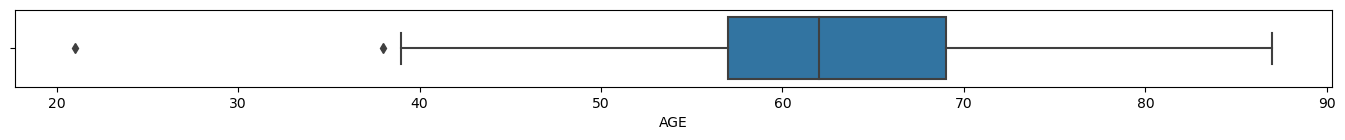

In [75]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in lung_cancer_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=lung_cancer_numeric, x=column)

In [76]:
##################################
# Creating a dataset copy and
# converting all values to numeric
# for correlation analysis
##################################
lung_cancer_correlation = lung_cancer.copy()
lung_cancer_correlation_object = lung_cancer_correlation.iloc[:,2:15].columns
lung_cancer_correlation[lung_cancer_correlation_object] = lung_cancer_correlation[lung_cancer_correlation_object].replace({'Absent': 0, 'Present': 1})
lung_cancer_correlation = lung_cancer_correlation.drop(['GENDER','LUNG_CANCER'], axis=1)
display(lung_cancer_correlation)

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,0,0,0,1,1,1,0,0,1,1,1,1,0
305,70,1,0,0,0,0,1,1,1,1,1,1,0,1
306,58,1,0,0,0,0,0,1,1,1,1,0,0,1
307,67,1,0,1,0,0,1,1,0,1,1,1,0,1


In [77]:
##################################
# Initializing the correlation matrix
##################################
lung_cancer_correlation_matrix = pd.DataFrame(np.zeros((len(lung_cancer_correlation.columns), len(lung_cancer_correlation.columns))),
                                              columns=lung_cancer_correlation.columns,
                                              index=lung_cancer_correlation.columns)

In [78]:
##################################
# Calculating different types
# of correlation coefficients
# per variable type
##################################
for i in range(len(lung_cancer_correlation.columns)):
    for j in range(i, len(lung_cancer_correlation.columns)):
        if i == j:
            lung_cancer_correlation_matrix.iloc[i, j] = 1.0
        else:
            if lung_cancer_correlation.dtypes[i] == 'int64' and lung_cancer_correlation.dtypes[j] == 'int64':
                # Pearson correlation for two continuous variables
                corr = lung_cancer_correlation.iloc[:, i].corr(lung_cancer_correlation.iloc[:, j])
            elif lung_cancer_correlation.dtypes[i] == 'int64' or lung_cancer_correlation.dtypes[j] == 'int64':
                # Point-biserial correlation for one continuous and one binary variable
                continuous_var = lung_cancer_correlation.iloc[:, i] if lung_cancer_correlation.dtypes[i] == 'int64' else lung_cancer_correlation.iloc[:, j]
                binary_var = lung_cancer_correlation.iloc[:, j] if lung_cancer_correlation.dtypes[j] == 'int64' else lung_cancer_correlation.iloc[:, i]
                corr, _ = pointbiserialr(continuous_var, binary_var)
            else:
                # Phi coefficient for two binary variables
                corr = lung_cancer_correlation.iloc[:, i].corr(lung_cancer_correlation.iloc[:, j])
            lung_cancer_correlation_matrix.iloc[i, j] = corr
            lung_cancer_correlation_matrix.iloc[j, i] = corr

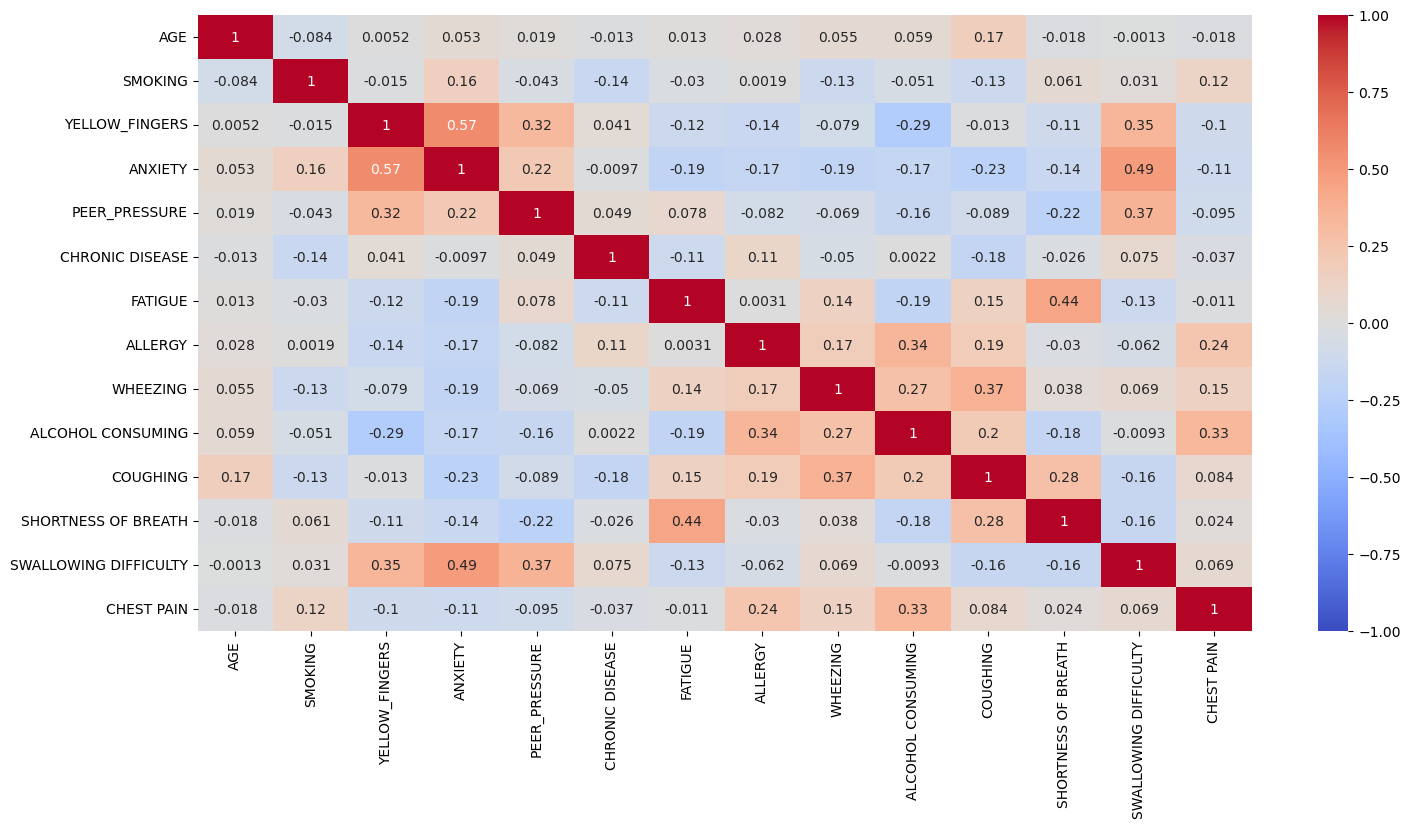

In [79]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric and categorical columns
##################################
plt.figure(figsize=(17, 8))
sns.heatmap(lung_cancer_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis <a class="anchor" id="1.5.1"></a>

1. The lung cancer prevalence estimated for the overall dataset is 87.38%.
2. Higher counts for the following categorical predictors are associated with better differentiation between <span style="color: #FF0000">LUNG_CANCER=Yes</span> and <span style="color: #FF0000">LUNG_CANCER=No</span>: 
    * <span style="color: #FF0000">YELLOW_FINGERS</span>
    * <span style="color: #FF0000">ANXIETY</span>
    * <span style="color: #FF0000">PEER_PRESSURE</span>
    * <span style="color: #FF0000">CHRONIC_DISEASE</span>
    * <span style="color: #FF0000">FATIGUE</span>
    * <span style="color: #FF0000">ALLERGY</span>
    * <span style="color: #FF0000">WHEEZING</span>
    * <span style="color: #FF0000">ALCOHOL CONSUMING </span>
    * <span style="color: #FF0000">COUGHING</span>
    * <span style="color: #FF0000">SWALLOWING DIFFICULTY</span>
    * <span style="color: #FF0000">CHEST PAIN</span> 
        

In [80]:
##################################
# Estimating the lung cancer prevalence
##################################
print('Lung Cancer Prevalence: ')
display(lung_cancer['LUNG_CANCER'].value_counts(normalize = True))

Lung Cancer Prevalence: 


YES    0.873786
NO     0.126214
Name: LUNG_CANCER, dtype: float64

In [81]:
##################################
# Segregating the target
# and predictor variables
##################################
lung_cancer_predictors = lung_cancer.iloc[:,:-1].columns
lung_cancer_predictors_numeric = lung_cancer.iloc[:,:-1].loc[:,lung_cancer.iloc[:,:-1].columns == 'AGE'].columns
lung_cancer_predictors_categorical = lung_cancer.iloc[:,:-1].loc[:,lung_cancer.iloc[:,:-1].columns != 'AGE'].columns

In [82]:
##################################
# Segregating the target variable
# and numeric predictors
##################################
boxplot_y_variable = 'LUNG_CANCER'
boxplot_x_variable = lung_cancer_predictors_numeric.values[0]

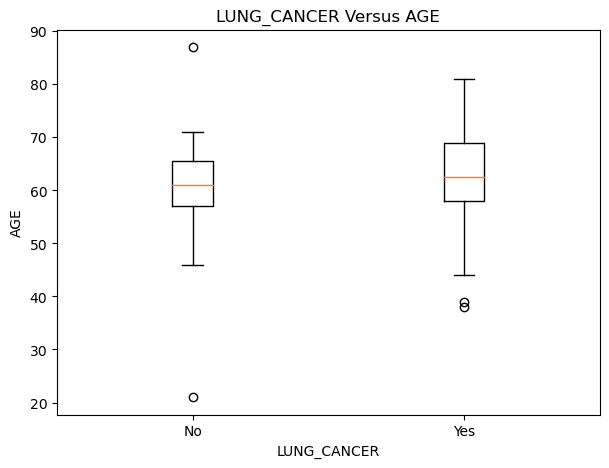

In [83]:
##################################
# Evaluating the numeric predictors
# against the target variable
##################################
plt.figure(figsize=(7, 5))
plt.boxplot([group[boxplot_x_variable] for name, group in lung_cancer.groupby(boxplot_y_variable)])
plt.title(f'{boxplot_y_variable} Versus {boxplot_x_variable}')
plt.xlabel(boxplot_y_variable)
plt.ylabel(boxplot_x_variable)
plt.xticks(range(1, len(lung_cancer[boxplot_y_variable].unique()) + 1), ['No', 'Yes'])
plt.show()

In [84]:
##################################
# Segregating the target variable
# and categorical predictors
##################################
proportion_y_variables = lung_cancer_predictors_categorical
proportion_x_variable = 'LUNG_CANCER'

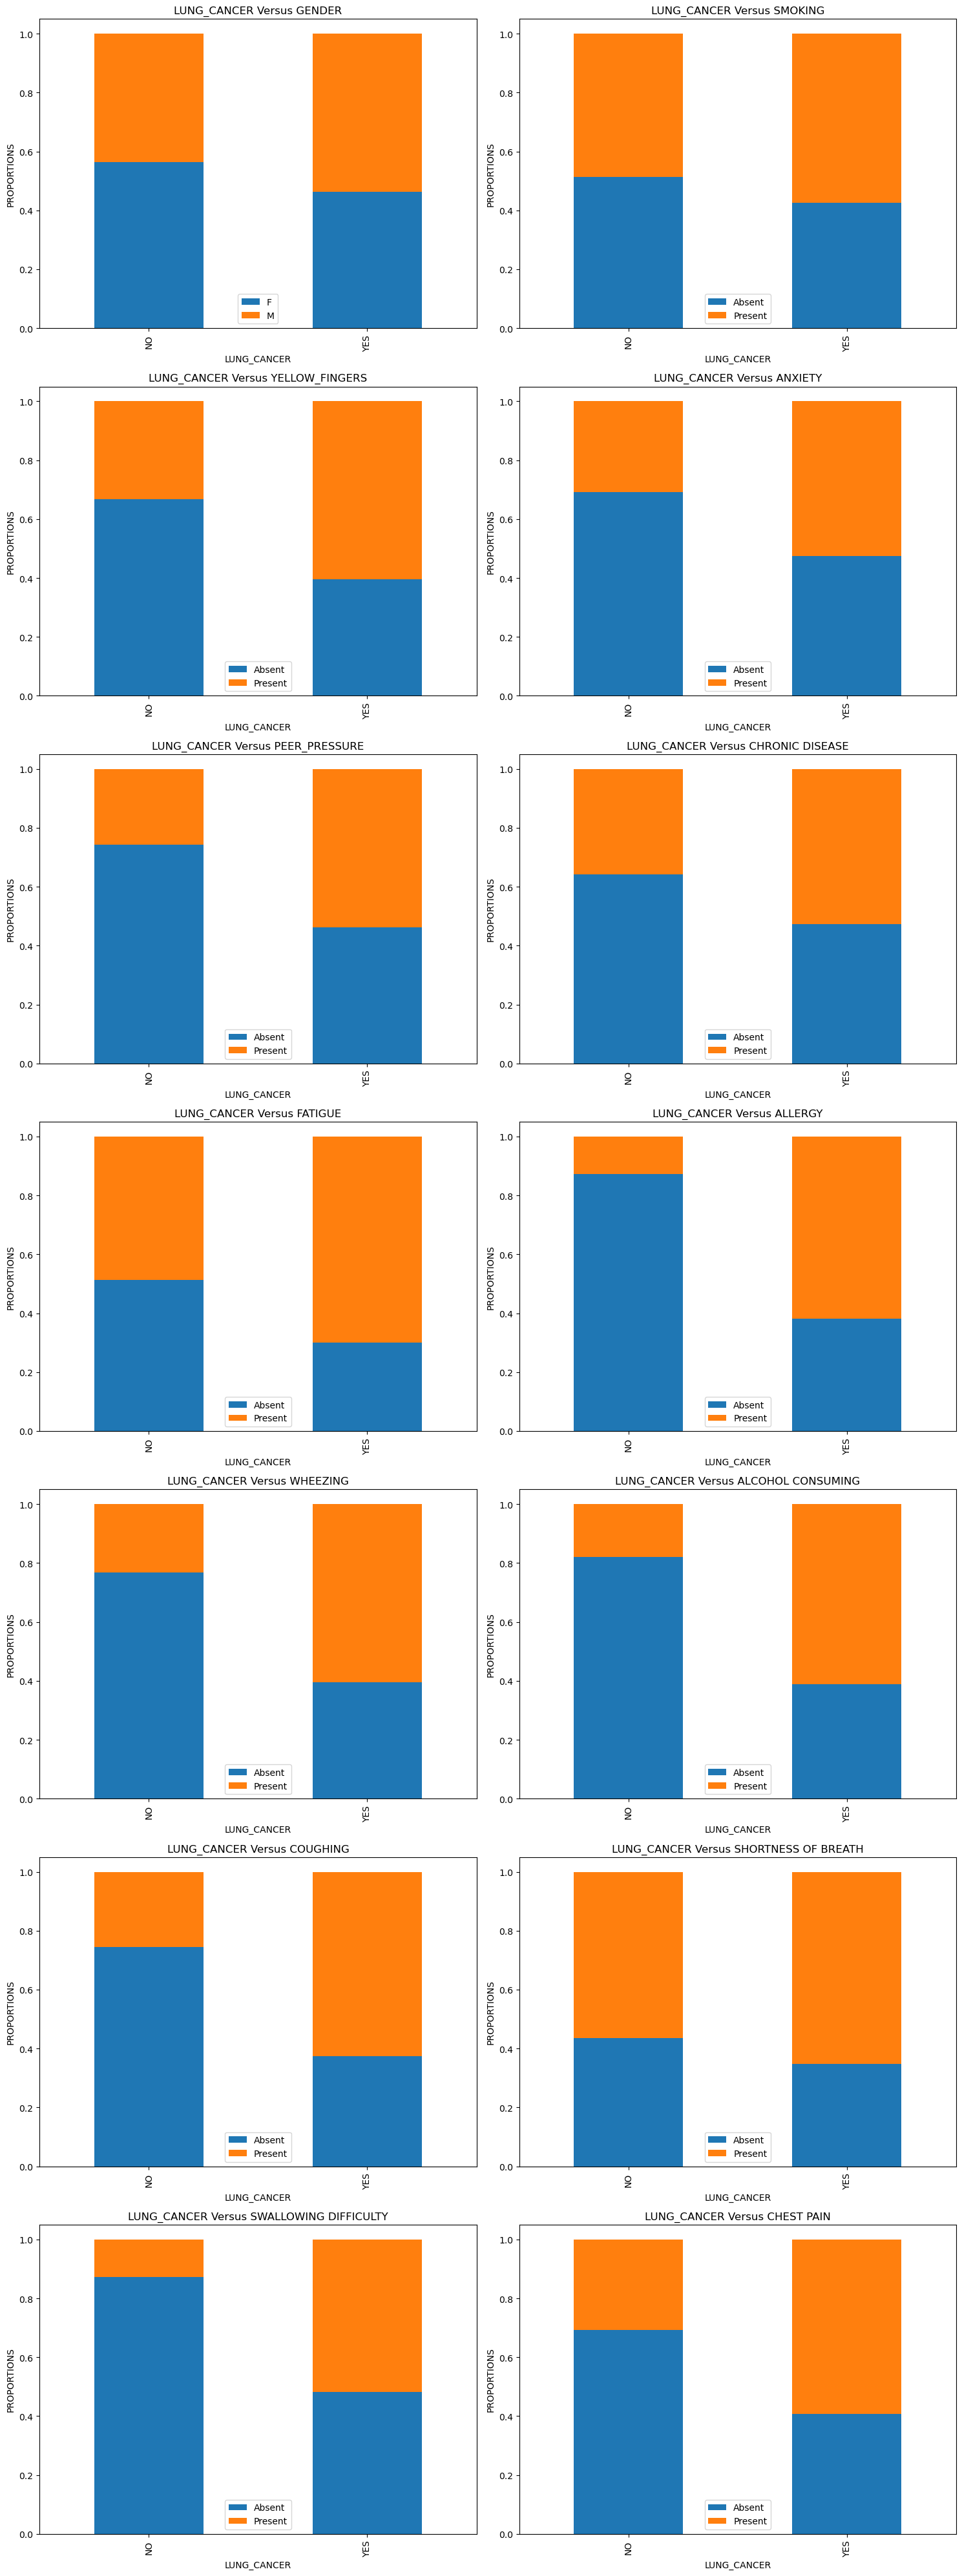

In [85]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 7
num_cols = 2

##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 40))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual stacked column plots
# for all categorical columns
##################################
for i, y_variable in enumerate(proportion_y_variables):
    ax = axes[i]
    category_counts = lung_cancer.groupby([proportion_x_variable, y_variable]).size().unstack(fill_value=0)
    category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)
    category_proportions.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{proportion_x_variable} Versus {y_variable}')
    ax.set_xlabel(proportion_x_variable)
    ax.set_ylabel('PROPORTIONS')
    ax.legend(loc="lower center")

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()

### 1.5.2 Hypothesis Testing <a class="anchor" id="1.5.2"></a>

1. The relationship between the numeric predictor to the <span style="color: #FF0000">LUNG_CANCER</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: Difference in the means between groups Yes and No is equal to zero  
    * **Alternative**: Difference in the means between groups Yes and No is not equal to zero   
2. There is no sufficient evidence to conclude of a statistically significant difference between the means of the numeric measurements obtained from the <span style="color: #FF0000">LUNG_CANCER</span> groups in 1 numeric predictor given its low t-test statistic value with reported high p-value above the significance level of 0.05.
    * <span style="color: #FF0000">AGE</span>: T.Test.Statistic=-1.574, T.Test.PValue=0.116
3. The relationship between the categorical predictors to the <span style="color: #FF0000">LUNG_CANCER</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: The categorical predictor is independent of the target variable 
    * **Alternative**: The categorical predictor is dependent on the target variable   
4. There is sufficient evidence to conclude of a statistically significant relationship between the individual categories and the <span style="color: #FF0000">LUNG_CANCER</span> groups in 9 categorical predictors given their high chisquare statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">ALLERGY</span>: ChiSquare.Test.Statistic=31.238, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">ALCOHOL CONSUMING</span>: ChiSquare.Test.Statistic=24.005, ChiSquare.Test.PValue=0.000   
    * <span style="color: #FF0000">SWALLOWING DIFFICULTY</span>: ChiSquare.Test.Statistic=19.307, ChiSquare.Test.PValue=0.000 
    * <span style="color: #FF0000">WHEEZING</span>: ChiSquare.Test.Statistic=17.723, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">COUGHING</span>: ChiSquare.Test.Statistic=17.606, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">CHEST PAIN</span>: ChiSquare.Test.Statistic=10.083, ChiSquare.Test.PValue=0.001   
    * <span style="color: #FF0000">PEER_PRESSURE</span>: ChiSquare.Test.Statistic=9.641, ChiSquare.Test.PValue=0.001 
    * <span style="color: #FF0000">YELLOW_FINGERS</span>: ChiSquare.Test.Statistic=9.088, ChiSquare.Test.PValue=0.002
    * <span style="color: #FF0000">FATIGUE</span>: ChiSquare.Test.Statistic=6.081, ChiSquare.Test.PValue=0.013 
    * <span style="color: #FF0000">ANXIETY</span>: ChiSquare.Test.Statistic=5.648, ChiSquare.Test.PValue=0.017 
5. There is no sufficient evidence to conclude of a statistically significant relationship between the individual categories and the <span style="color: #FF0000">LUNG_CANCER</span> groups in 4 categorical predictors given their low chisquare statistic values with reported high p-values greater than the significance level of 0.05.    
    * <span style="color: #FF0000">CHRONIC DISEASE</span>: ChiSquare.Test.Statistic=3.161, ChiSquare.Test.PValue=0.075
    * <span style="color: #FF0000">GENDER</span>: ChiSquare.Test.Statistic=1.021, ChiSquare.Test.PValue=0.312
    * <span style="color: #FF0000">SHORTNESS OF BREATH</span>: ChiSquare.Test.Statistic=0.790, ChiSquare.Test.PValue=0.373   
    * <span style="color: #FF0000">SMOKING</span>: ChiSquare.Test.Statistic=0.722, ChiSquare.Test.PValue=0.395

In [86]:
##################################
# Computing the t-test 
# statistic and p-values
# between the target variable
# and numeric predictor columns
##################################
lung_cancer_numeric_ttest_target = {}
lung_cancer_numeric = lung_cancer.loc[:,(lung_cancer.columns == 'AGE') | (lung_cancer.columns == 'LUNG_CANCER')]
lung_cancer_numeric_columns = lung_cancer_predictors_numeric
for numeric_column in lung_cancer_numeric_columns:
    group_0 = lung_cancer_numeric[lung_cancer_numeric.loc[:,'LUNG_CANCER']=='NO']
    group_1 = lung_cancer_numeric[lung_cancer_numeric.loc[:,'LUNG_CANCER']=='YES']
    lung_cancer_numeric_ttest_target['LUNG_CANCER_' + numeric_column] = stats.ttest_ind(
        group_0[numeric_column], 
        group_1[numeric_column], 
        equal_var=True)

In [87]:
##################################
# Formulating the pairwise ttest summary
# between the target variable
# and numeric predictor columns
##################################
lung_cancer_numeric_summary = lung_cancer_numeric.from_dict(lung_cancer_numeric_ttest_target, orient='index')
lung_cancer_numeric_summary.columns = ['T.Test.Statistic', 'T.Test.PValue']
display(lung_cancer_numeric_summary.sort_values(by=['T.Test.PValue'], ascending=True).head(len(lung_cancer_predictors_numeric)))

,T.Test.Statistic,T.Test.PValue
LUNG_CANCER_AGE,-1.573857,0.11655


In [88]:
##################################
# Computing the chisquare
# statistic and p-values
# between the target variable
# and categorical predictor columns
##################################
lung_cancer_categorical_chisquare_target = {}
lung_cancer_categorical = lung_cancer.loc[:,(lung_cancer.columns != 'AGE') | (lung_cancer.columns == 'LUNG_CANCER')]
lung_cancer_categorical_columns = lung_cancer_predictors_categorical
for categorical_column in lung_cancer_categorical_columns:
    contingency_table = pd.crosstab(lung_cancer_categorical[categorical_column], 
                                    lung_cancer_categorical['LUNG_CANCER'])
    lung_cancer_categorical_chisquare_target['LUNG_CANCER_' + categorical_column] = stats.chi2_contingency(
        contingency_table)[0:2]

In [89]:
##################################
# Formulating the pairwise chisquare summary
# between the target variable
# and categorical predictor columns
##################################
lung_cancer_categorical_summary = lung_cancer_categorical.from_dict(lung_cancer_categorical_chisquare_target, orient='index')
lung_cancer_categorical_summary.columns = ['ChiSquare.Test.Statistic', 'ChiSquare.Test.PValue']
display(lung_cancer_categorical_summary.sort_values(by=['ChiSquare.Test.PValue'], ascending=True).head(len(lung_cancer_predictors_categorical)))

,ChiSquare.Test.Statistic,ChiSquare.Test.PValue
LUNG_CANCER_ALLERGY,31.238952,2.281422e-08
LUNG_CANCER_ALCOHOL CONSUMING,24.005406,9.606559e-07
LUNG_CANCER_SWALLOWING DIFFICULTY,19.307277,1.112814e-05
LUNG_CANCER_WHEEZING,17.723096,2.555055e-05
LUNG_CANCER_COUGHING,17.606122,2.717123e-05
LUNG_CANCER_CHEST PAIN,10.083198,1.496275e-03
LUNG_CANCER_PEER_PRESSURE,9.641594,1.902201e-03
LUNG_CANCER_YELLOW_FINGERS,9.088186,2.572659e-03
LUNG_CANCER_FATIGUE,6.081100,1.366356e-02
LUNG_CANCER_ANXIETY,5.648390,1.747141e-02


## 1.6. Predictive Model Development <a class="anchor" id="1.6"></a>

### 1.6.1 Pre-Modelling Data Preparation <a class="anchor" id="1.6.1"></a>

1. All dichotomous categorical predictors and the target variable were one-hot encoded for the downstream modelling process. 
2. Predictors determined with insufficient association with the <span style="color: #FF0000">LUNG_CANCER</span> target variables were exlucded for the subsequent modelling steps.
    * <span style="color: #FF0000">AGE</span>: T.Test.Statistic=-1.574, T.Test.PValue=0.116
    * <span style="color: #FF0000">CHRONIC DISEASE</span>: ChiSquare.Test.Statistic=3.161, ChiSquare.Test.PValue=0.075
    * <span style="color: #FF0000">GENDER</span>: ChiSquare.Test.Statistic=1.021, ChiSquare.Test.PValue=0.312
    * <span style="color: #FF0000">SHORTNESS OF BREATH</span>: ChiSquare.Test.Statistic=0.790, ChiSquare.Test.PValue=0.373   
    * <span style="color: #FF0000">SMOKING</span>: ChiSquare.Test.Statistic=0.722, ChiSquare.Test.PValue=0.395

In [90]:
##################################
# Creating a dataset copy and
# transforming all values to numeric
# prior to data splitting and modelling
##################################
lung_cancer_transformed = lung_cancer.copy()
lung_cancer_transformed_object = lung_cancer_transformed.iloc[:,2:15].columns
lung_cancer_transformed['GENDER'] = lung_cancer_transformed['GENDER'].replace({'F': 0, 'M': 1})
lung_cancer_transformed['LUNG_CANCER'] = lung_cancer_transformed['LUNG_CANCER'].replace({'NO': 0, 'YES': 1})
lung_cancer_transformed[lung_cancer_transformed_object] = lung_cancer_transformed[lung_cancer_transformed_object].replace({'Absent': 0, 'Present': 1})
display(lung_cancer_transformed)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [91]:
##################################
# Saving the tranformed data
# to the DATASETS_PREPROCESSED_PATH
##################################
lung_cancer_transformed.to_csv(os.path.join("..", DATASETS_PREPROCESSED_PATH, "lung_cancer_transformed.csv"), index=False)

In [92]:
##################################
# Filtering out predictors that did not exhibit 
# sufficient discrimination of the target variable
# Saving the tranformed data
# to the DATASETS_PREPROCESSED_PATH
##################################
lung_cancer_filtered = lung_cancer_transformed.drop(['GENDER','CHRONIC DISEASE', 'SHORTNESS OF BREATH', 'SMOKING', 'AGE'], axis=1)
lung_cancer_filtered.to_csv(os.path.join("..", DATASETS_FINAL_PATH, "lung_cancer_final.csv"), index=False)
display(lung_cancer_filtered)

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,0,0,0,1,1,1
2,0,0,1,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
304,0,0,1,1,0,0,1,1,1,0,1
305,0,0,0,1,1,1,1,1,0,1,1
306,0,0,0,0,1,1,1,1,0,1,1
307,0,1,0,1,1,0,1,1,0,1,1


### 1.6.2 Data Splitting <a class="anchor" id="1.6.2"></a>

1. The preprocessed dataset was divided into three subsets using a fixed random seed:
    * **test data**: 25% of the original data with class stratification applied
    * **train data (initial)**: 75% of the original data with class stratification applied
        * **train data (final)**: 75% of the **train (initial)** data with class stratification applied
        * **validation data**: 25% of the **train (initial)** data with class stratification applied
2. Models will be developed from the **train data (final)**. Using the same dataset, a subset of models with optimal hyperparameters will be selected, based on cross-validation.
3. Among candidate models with optimal hyperparameters, the final model will be selected based on performance on the **validation data**. 
4. Performance of the selected final model (and other candidate models for post-model selection comparison) will be evaluated using the **test data**. 
5. The preprocessed data is comprised of:
    * **309 rows** (observations)
        * **270 LUNG_CANCER=Yes**: 87.38%
        * **39 LUNG_CANCER=No**: 12.82%
    * **11 columns** (variables)
        * **1/11 target** (categorical)
             * <span style="color: #FF0000">LUNG_CANCER</span>
        * **10/11 predictors** (categorical)
             * <span style="color: #FF0000">YELLOW_FINGERS</span>
             * <span style="color: #FF0000">ANXIETY</span>
             * <span style="color: #FF0000">PEER_PRESSURE</span>
             * <span style="color: #FF0000">FATIGUE</span>
             * <span style="color: #FF0000">ALLERGY</span>
             * <span style="color: #FF0000">WHEEZING</span>
             * <span style="color: #FF0000">ALCOHOL CONSUMING </span>
             * <span style="color: #FF0000">COUGHING</span>
             * <span style="color: #FF0000">SWALLOWING DIFFICULTY</span>
             * <span style="color: #FF0000">CHEST PAIN</span>
6. The **train data (final)** subset is comprised of:
    * **173 rows** (observations)
        * **151 LUNG_CANCER=Yes**: 87.28%
        * **22 LUNG_CANCER=No**: 12.72%
    * **11 columns** (variables)
7. The **validation data** subset is comprised of:
    * **58 rows** (observations)
        * **51 LUNG_CANCER=Yes**: 87.93%
        * **7 LUNG_CANCER=No**: 12.07%
    * **11 columns** (variables)
8. The **train data (final)** subset with **SMOTE-upsampled** minority class(**LUNG_CANCER=No**) is comprised of:
    * **302 rows** (observations)
        * **151 LUNG_CANCER=Yes**: 50.00%
        * **151 LUNG_CANCER=No**: 50.00%
    * **11 columns** (variables)
9. The **train data (final)** subset with **CNN-downsampled** minority class(**LUNG_CANCER=Yes**) is comprised of:
    * **173 rows** (observations)
        * **39 LUNG_CANCER=Yes**: 63.93%
        * **22 LUNG_CANCER=No**: 36.07%
    * **11 columns** (variables)

In [93]:
##################################
# Creating a dataset copy
# of the filtered data
##################################
lung_cancer_final = lung_cancer_filtered.copy()

In [94]:
##################################
# Performing a general exploration
# of the final dataset
##################################
print('Final Dataset Dimensions: ')
display(lung_cancer_final.shape)

Final Dataset Dimensions: 


(309, 11)

In [95]:
print('Target Variable Breakdown: ')
lung_cancer_breakdown = lung_cancer_final.groupby('LUNG_CANCER').size().reset_index(name='Count')
lung_cancer_breakdown['Percentage'] = (lung_cancer_breakdown['Count'] / len(lung_cancer_final)) * 100
display(lung_cancer_breakdown)

Target Variable Breakdown: 


,LUNG_CANCER,Count,Percentage
0,0,39,12.621359
1,1,270,87.378641


In [96]:
##################################
# Formulating the train and test data
# from the final dataset
# by applying stratification and
# using a 70-30 ratio
##################################
lung_cancer_train_initial, lung_cancer_test = train_test_split(lung_cancer_final, 
                                                               test_size=0.25, 
                                                               stratify=lung_cancer_final['LUNG_CANCER'], 
                                                               random_state=88888888)

In [97]:
##################################
# Performing a general exploration
# of the initial training dataset
##################################
X_train_initial = lung_cancer_train_initial.drop('LUNG_CANCER', axis = 1)
y_train_initial = lung_cancer_train_initial['LUNG_CANCER']
print('Initial Training Dataset Dimensions: ')
display(X_train_initial.shape)
display(y_train_initial.shape)
print('Initial Training Target Variable Breakdown: ')
display(y_train_initial.value_counts(normalize = True))

Initial Training Dataset Dimensions: 


(231, 10)

(231,)

Initial Training Target Variable Breakdown: 


1    0.874459
0    0.125541
Name: LUNG_CANCER, dtype: float64

In [98]:
##################################
# Performing a general exploration
# of the test dataset
##################################
X_test = lung_cancer_test.drop('LUNG_CANCER', axis = 1)
y_test = lung_cancer_test['LUNG_CANCER']
print('Test Dataset Dimensions: ')
display(X_test.shape)
display(y_test.shape)
print('Test Target Variable Breakdown: ')
display(y_test.value_counts(normalize = True))

Test Dataset Dimensions: 


(78, 10)

(78,)

Test Target Variable Breakdown: 


1    0.871795
0    0.128205
Name: LUNG_CANCER, dtype: float64

In [99]:
##################################
# Formulating the train and validation data
# from the train dataset
# by applying stratification and
# using a 70-30 ratio
##################################
lung_cancer_train, lung_cancer_validation = train_test_split(lung_cancer_train_initial, 
                                                             test_size=0.25, 
                                                             stratify=lung_cancer_train_initial['LUNG_CANCER'], 
                                                             random_state=88888888)

In [100]:
##################################
# Performing a general exploration
# of the final training dataset
##################################
X_train = lung_cancer_train.drop('LUNG_CANCER', axis = 1)
y_train = lung_cancer_train['LUNG_CANCER']
print('Final Training Dataset Dimensions: ')
display(X_train.shape)
display(y_train.shape)
print('Final Training Target Variable Breakdown: ')
display(y_train.value_counts())
print('Final Training Target Variable Proportion: ')
display(y_train.value_counts(normalize = True))

Final Training Dataset Dimensions: 


(173, 10)

(173,)

Final Training Target Variable Breakdown: 


1    151
0     22
Name: LUNG_CANCER, dtype: int64

Final Training Target Variable Proportion: 


1    0.872832
0    0.127168
Name: LUNG_CANCER, dtype: float64

In [101]:
##################################
# Performing a general exploration
# of the validation dataset
##################################
X_validation = lung_cancer_validation.drop('LUNG_CANCER', axis = 1)
y_validation = lung_cancer_validation['LUNG_CANCER']
print('Validation Dataset Dimensions: ')
display(X_validation.shape)
display(y_validation.shape)
print('Validation Target Variable Breakdown: ')
display(y_validation.value_counts())
print('Validation Target Variable Proportion: ')
display(y_validation.value_counts(normalize = True))

Validation Dataset Dimensions: 


(58, 10)

(58,)

Validation Target Variable Breakdown: 


1    51
0     7
Name: LUNG_CANCER, dtype: int64

Validation Target Variable Proportion: 


1    0.87931
0    0.12069
Name: LUNG_CANCER, dtype: float64

In [102]:
##################################
# Initiating an oversampling instance
# on the training data using
# Synthetic Minority Oversampling Technique
##################################
smote = SMOTE(random_state = 88888888)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
print('SMOTE-Upsampled Training Dataset Dimensions: ')
display(X_train_smote.shape)
display(y_train_smote.shape)
print('SMOTE-Upsampled Training Target Variable Breakdown: ')
display(y_train_smote.value_counts())
print('SMOTE-Upsampled Training Target Variable Proportion: ')
display(y_train_smote.value_counts(normalize = True))

SMOTE-Upsampled Training Dataset Dimensions: 


(302, 10)

(302,)

SMOTE-Upsampled Training Target Variable Breakdown: 


0    151
1    151
Name: LUNG_CANCER, dtype: int64

SMOTE-Upsampled Training Target Variable Proportion: 


0    0.5
1    0.5
Name: LUNG_CANCER, dtype: float64

In [103]:
##################################
# Initiating an undersampling instance
# on the training data using
# Condense Nearest Neighbors
##################################
cnn = CondensedNearestNeighbour(random_state = 88888888, n_neighbors=3)
X_train_cnn, y_train_cnn = cnn.fit_resample(X_train,y_train)
print('Downsampled Training Dataset Dimensions: ')
display(X_train_cnn.shape)
display(y_train_cnn.shape)
print('Downsampled Training Target Variable Breakdown: ')
display(y_train_cnn.value_counts())
print('Downsampled Training Target Variable Proportion: ')
display(y_train_cnn.value_counts(normalize = True))

Downsampled Training Dataset Dimensions: 


(61, 10)

(61,)

Downsampled Training Target Variable Breakdown: 


1    39
0    22
Name: LUNG_CANCER, dtype: int64

Downsampled Training Target Variable Proportion: 


1    0.639344
0    0.360656
Name: LUNG_CANCER, dtype: float64

In [104]:
##################################
# Saving the training data
# to the DATASETS_FINAL_TRAIN_PATH
# and DATASETS_FINAL_TRAIN_FEATURES_PATH
# and DATASETS_FINAL_TRAIN_TARGET_PATH
##################################
lung_cancer_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_PATH, "lung_cancer_train.csv"), index=False)
X_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_FEATURES_PATH, "X_train.csv"), index=False)
y_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_TARGET_PATH, "y_train.csv"), index=False)
X_train_smote.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_FEATURES_PATH, "X_train_smote.csv"), index=False)
y_train_smote.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_TARGET_PATH, "y_train_smote.csv"), index=False)
X_train_cnn.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_FEATURES_PATH, "X_train_cnn.csv"), index=False)
y_train_cnn.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_TARGET_PATH, "y_train_cnn.csv"), index=False)

In [105]:
##################################
# Saving the validation data
# to the DATASETS_FINAL_VALIDATION_PATH
# and DATASETS_FINAL_VALIDATION_FEATURE_PATH
# and DATASETS_FINAL_VALIDATION_TARGET_PATH
##################################
lung_cancer_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_PATH, "lung_cancer_validation.csv"), index=False)
X_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_FEATURES_PATH, "X_validation.csv"), index=False)
y_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_TARGET_PATH, "y_validation.csv"), index=False)

In [106]:
##################################
# Saving the test data
# to the DATASETS_FINAL_TEST_PATH
# and DATASETS_FINAL_TEST_FEATURES_PATH
# and DATASETS_FINAL_TEST_TARGET_PATH
##################################
lung_cancer_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_PATH, "lung_cancer_test.csv"), index=False)
X_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_FEATURES_PATH, "X_test.csv"), index=False)
y_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_TARGET_PATH, "y_test.csv"), index=False)

### 1.6.3 Modelling Pipeline Development <a class="anchor" id="1.6.3"></a>

#### 1.6.3.1 Individual Classifier <a class="anchor" id="1.6.3.1"></a>

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

[Class Weights](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) are used to assign different levels of importance to different classes when the distribution of instances across different classes in a classification problem is not equal. By assigning higher weights to the minority class, the model is encouraged to give more attention to correctly predicting instances from the minority class. Class weights are incorporated into the loss function during training. The loss for each instance is multiplied by its corresponding class weight. This means that misclassifying an instance from the minority class will have a greater impact on the overall loss than misclassifying an instance from the majority class. The use of class weights helps balance the influence of each class during training, mitigating the impact of class imbalance. It provides a way to focus the learning process on the classes that are underrepresented in the training data.

[Hyperparameter Tuning](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) is an iterative process that involves experimenting with different hyperparameter combinations, evaluating the model's performance, and refining the hyperparameter values to achieve the best possible performance on new, unseen data - aimed at building effective and well-generalizing machine learning models. A model's performance depends not only on the learned parameters (weights) during training but also on hyperparameters, which are external configuration settings that cannot be learned from the data.

1. A modelling pipeline using an individual classifier was implemented.
    * [Logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API with 5 hyperparameters:
        * <span style="color: #FF0000">penalty</span> = penalty norm made to vary between L1, L2 and none
        * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value  equal to balanced or none, as applicable
        * <span style="color: #FF0000">solver</span> = algorithm used in the optimization problem held constant at a value equal to saga
        * <span style="color: #FF0000">max_iter</span> = maximum number of iterations taken for the solvers to converge held constant at a value of 500
        * <span style="color: #FF0000">random_state</span> = random instance to shuffle the data for the solver algorithm held constant at a value of 88888888
2. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance determined using the F1 score. 

In [107]:
##################################
# Defining the modelling pipeline
# using the logistic regression structure
##################################
individual_pipeline = Pipeline([('individual_model', LogisticRegression(solver='saga', 
                                                             random_state=88888888, 
                                                             max_iter=5000))])

In [108]:
##################################
# Defining the hyperparameters for grid search
# including the regularization penalties
# and class weights for unbalanced class
##################################
individual_unbalanced_class_hyperparameter_grid = {'individual_model__penalty': ['l1', 'l2', None],
                                                   'individual_model__class_weight': ['balanced']}

In [109]:
##################################
# Setting up the GridSearchCV with 5-fold cross-validation
# and using F1 score as the model evaluation metric
##################################
individual_unbalanced_class_grid_search = GridSearchCV(estimator=individual_pipeline,
                                                       param_grid=individual_unbalanced_class_hyperparameter_grid,
                                                       scoring='f1',
                                                       cv=5, 
                                                       n_jobs=-1,
                                                       verbose=1)

In [110]:
##################################
# Defining the hyperparameters for grid search
# including the regularization penalties
# and class weights for unbalanced class
##################################
individual_balanced_class_hyperparameter_grid = {'individual_model__penalty': ['l1', 'l2', None],
                                                 'individual_model__class_weight': [None]}

In [111]:
##################################
# Setting up the GridSearchCV with 5-fold cross-validation
# and using F1 score as the model evaluation metric
##################################
individual_balanced_class_grid_search = GridSearchCV(estimator=individual_pipeline,
                                                     param_grid=individual_balanced_class_hyperparameter_grid,
                                                     scoring='f1',
                                                     cv=5, 
                                                     n_jobs=-1,
                                                     verbose=1)

#### 1.6.3.2 Stacked Classifier <a class="anchor" id="1.6.3.2"></a>

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

[Decision Trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) create a model that predicts the class label of a sample based on input features. A decision tree consists of nodes that represent decisions or choices, edges which connect nodes and represent the possible outcomes of a decision and leaf (or terminal) nodes which represent the final decision or the predicted class label. The decision-making process involves feature selection (at each internal node, the algorithm decides which feature to split on based on a certain criterion including gini impurity or entropy), splitting criteria (the splitting criteria aim to find the feature and its corresponding threshold that best separates the data into different classes. The goal is to increase homogeneity within each resulting subset), recursive splitting (the process of feature selection and splitting continues recursively, creating a tree structure. The dataset is partitioned at each internal node based on the chosen feature, and the process repeats for each subset) and stopping criteria (the recursion stops when a certain condition is met, known as a stopping criterion. Common stopping criteria include a maximum depth for the tree, a minimum number of samples required to split a node, or a minimum number of samples in a leaf node.)

[Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) is an ensemble learning method made up of a large set of small decision trees called estimators, with each producing its own prediction. The random forest model aggregates the predictions of the estimators to produce a more accurate prediction. The algorithm involves bootstrap aggregating (where smaller subsets of the training data are repeatedly subsampled with replacement), random subspacing (where a subset of features are sampled and used to train each individual estimator), estimator training (where unpruned decision trees are formulated for each estimator) and inference by aggregating the predictions of all estimators.

[Support Vector Machine](https://dl.acm.org/doi/10.1145/130385.130401) plots each observation in an N-dimensional space corresponding to the number of features in the data set and finds a hyperplane that maximally separates the different classes by a maximally large margin (which is defined as the distance between the hyperplane and the closest data points from each class). The algorithm applies kernel transformation by mapping non-linearly separable data using the similarities between the points in a high-dimensional feature space for improved discrimination.

[Hyperparameter Tuning](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) is an iterative process that involves experimenting with different hyperparameter combinations, evaluating the model's performance, and refining the hyperparameter values to achieve the best possible performance on new, unseen data - aimed at building effective and well-generalizing machine learning models. A model's performance depends not only on the learned parameters (weights) during training but also on hyperparameters, which are external configuration settings that cannot be learned from the data. 

[Model Stacking](https://www.manning.com/books/ensemble-methods-for-machine-learning) - also known as stacked generalization, is an ensemble approach which involves creating a variety of base learners and using them to create intermediate predictions, one for each learned model. A meta-model is incorporated that gains knowledge of the same target from intermediate predictions. Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset). Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models). Stacking is appropriate when the predictions made by the base learners or the errors in predictions made by the models have minimal correlation. Achieving an improvement in performance is dependent upon the choice of base learners and whether they are sufficiently skillful in their predictions.

1. A modelling pipeline using a stacking classifier was implemented.
    * **Meta learner**: [Logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API with 5 hyperparameters:
        * <span style="color: #FF0000">penalty</span> = penalty norm made to vary between L1, L2 and none
        * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value  equal to balanced or none, as applicable
        * <span style="color: #FF0000">solver</span> = algorithm used in the optimization problem held constant at a value equal to saga
        * <span style="color: #FF0000">max_iter</span> = maximum number of iterations taken for the solvers to converge held constant at 500
        * <span style="color: #FF0000">random_state</span> = random instance to shuffle the data for the solver algorithm held constant at 88888888
    * **Base learner**: [Decision tree model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API with 5 hyperparameters:
        * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3 and 5
        * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value  equal to balanced or none, as applicable
        * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split held constant at a value equal to entropy
        * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to split an internal node held constant at 3
        * <span style="color: #FF0000">random_state</span> = random instance for feature permutation process of the algorithm held constant at 88888888
    * **Base learner**: [Random forest model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API with 6 hyperparameters:
        * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3 and 5
        * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value equal to balanced or none, as applicable
        * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split held constant at a value equal to entropy
        * <span style="color: #FF0000">max_features</span> = number of features to consider when looking for the best split held constant at a value equal to sqrt
        * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to split an internal node held constant at 3
        * <span style="color: #FF0000">random_state</span> = random instance for controlling the bootstrapping of the samples and feature sampling of the algorithm held constant at 88888888
    * **Base learner**: [Support vector machine model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API with 5 hyperparameters:
        * <span style="color: #FF0000">C</span> = inverse of regularization strength made to vary between 1.0 and 0.5
        * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value  equal to balanced or none, as applicable
        * <span style="color: #FF0000">kernel</span> = kernel type to be used in the algorithm made held constant at a value equal to linear
        * <span style="color: #FF0000">probability</span> = setting to enable probability estimates held constant at a value equal to true
        * <span style="color: #FF0000">random_state</span> = random instance for controling data shuffle for probability estimation of the algorithm held constant at 88888888        
2. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance determined using the F1 score. 

In [112]:
##################################
# Defining the base learners
# for the stacked classifier
# composed of decision tree,
# random forest, and support vector machine
##################################
stacked_unbalanced_class_base_learners = [('dt', DecisionTreeClassifier(class_weight='balanced',
                                                                         criterion='entropy',
                                                                         min_samples_leaf=3,
                                                                         random_state=88888888)),
                                           ('rf', RandomForestClassifier(class_weight='balanced',
                                                                         criterion='entropy',
                                                                         max_features='sqrt',
                                                                         min_samples_leaf=3,
                                                                         random_state=88888888)),
                                           ('svm', SVC(class_weight='balanced',
                                                       probability=True,
                                                       kernel='linear',
                                                       random_state=88888888))]

In [113]:
##################################
# Defining the meta learner
# using the logistic regression structure
##################################
stacked_unbalanced_class_meta_learner = LogisticRegression(solver='saga', 
                                                           random_state=88888888,
                                                           max_iter=5000)

In [114]:
##################################
# Defining the stacking model
# using the logistic regression structure
##################################
stacked_unbalanced_class_model = StackingClassifier(estimators=stacked_unbalanced_class_base_learners,
                                                    final_estimator=stacked_unbalanced_class_meta_learner)

In [115]:
##################################
# Defining the modelling pipeline
# for the stacked classifier
# composed of decision tree,
# random forest, and support vector machine
# using the logistic regression structure
##################################
stacked_unbalanced_class_pipeline = Pipeline([('stacked_model', stacked_unbalanced_class_model)])

In [116]:
##################################
# Defining the hyperparameters for grid search
# including the regularization penalties
# and class weights for unbalanced class
##################################
stacked_unbalanced_class_hyperparameter_grid = {'stacked_model__dt__max_depth': [3, 5],
                                                'stacked_model__rf__max_depth': [3, 5],
                                                'stacked_model__svm__C': [0.50, 1.00],
                                                'stacked_model__final_estimator__penalty': ['l1', 'l2', None],
                                                'stacked_model__final_estimator__class_weight': ['balanced']}

In [117]:
##################################
# Setting up the GridSearchCV with 5-fold cross-validation
# and using F1 score as the model evaluation metric
##################################
stacked_unbalanced_class_grid_search = GridSearchCV(estimator=stacked_unbalanced_class_pipeline,
                                                    param_grid=stacked_unbalanced_class_hyperparameter_grid,
                                                    scoring='f1',
                                                    cv=5,
                                                    n_jobs=-1,
                                                    verbose=1)

In [118]:
##################################
# Defining the base learners
# for the stacked classifier
# composed of decision tree,
# random forest, and support vector machine
##################################
stacked_balanced_class_base_learners = [('dt', DecisionTreeClassifier(class_weight=None,
                                                                         criterion='entropy',
                                                                         min_samples_leaf=3,
                                                                         random_state=88888888)),
                                           ('rf', RandomForestClassifier(class_weight=None,
                                                                         criterion='entropy',
                                                                         max_features='sqrt',
                                                                         min_samples_leaf=3,
                                                                         random_state=88888888)),
                                           ('svm', SVC(class_weight=None,
                                                       probability=True,
                                                       kernel='linear',
                                                       random_state=88888888))]

In [119]:
##################################
# Defining the meta learner
# using the logistic regression structure
##################################
stacked_balanced_class_meta_learner = LogisticRegression(solver='saga', 
                                                           random_state=88888888,
                                                           max_iter=5000)

In [120]:
##################################
# Defining the stacking model
# using the logistic regression structure
##################################
stacked_balanced_class_model = StackingClassifier(estimators=stacked_balanced_class_base_learners,
                                                    final_estimator=stacked_balanced_class_meta_learner)

In [121]:
##################################
# Defining the modelling pipeline
# for the stacked classifier
# composed of decision tree,
# random forest, and support vector machine
# using the logistic regression structure
##################################
stacked_balanced_class_pipeline = Pipeline([('stacked_model', stacked_balanced_class_model)])

In [122]:
##################################
# Defining the hyperparameters for grid search
# including the regularization penalties
# and class weights for balanced class
##################################
stacked_balanced_class_hyperparameter_grid = {'stacked_model__dt__max_depth': [3, 5],
                                                'stacked_model__rf__max_depth': [3, 5],
                                                'stacked_model__svm__C': [0.50, 1.00],
                                                'stacked_model__final_estimator__penalty': ['l1', 'l2', None],
                                                'stacked_model__final_estimator__class_weight': [None]}

In [123]:
##################################
# Setting up the GridSearchCV with 5-fold cross-validation
# and using F1 score as the model evaluation metric
##################################
stacked_balanced_class_grid_search = GridSearchCV(estimator=stacked_balanced_class_pipeline,
                                                    param_grid=stacked_balanced_class_hyperparameter_grid,
                                                    scoring='f1',
                                                    cv=5,
                                                    n_jobs=-1,
                                                    verbose=1)

### 1.6.4 Model Fitting using Original Training Data | Hyperparameter Tuning | Validation <a class="anchor" id="1.6.4"></a>

#### 1.6.4.1 Individual Classifier <a class="anchor" id="1.6.4.1"></a>

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

[Class Weights](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) are used to assign different levels of importance to different classes when the distribution of instances across different classes in a classification problem is not equal. By assigning higher weights to the minority class, the model is encouraged to give more attention to correctly predicting instances from the minority class. Class weights are incorporated into the loss function during training. The loss for each instance is multiplied by its corresponding class weight. This means that misclassifying an instance from the minority class will have a greater impact on the overall loss than misclassifying an instance from the majority class. The use of class weights helps balance the influence of each class during training, mitigating the impact of class imbalance. It provides a way to focus the learning process on the classes that are underrepresented in the training data.

[Hyperparameter Tuning](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) is an iterative process that involves experimenting with different hyperparameter combinations, evaluating the model's performance, and refining the hyperparameter values to achieve the best possible performance on new, unseen data - aimed at building effective and well-generalizing machine learning models. A model's performance depends not only on the learned parameters (weights) during training but also on hyperparameters, which are external configuration settings that cannot be learned from the data. 

1. The optimal [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (**individual classifier**) determined from the 5-fold cross-validation of **train data (final)** contained the following hyperparameters:
    * <span style="color: #FF0000">penalty</span> = L2
    * <span style="color: #FF0000">class_weight</span> = balanced
    * <span style="color: #FF0000">solver</span> = saga
    * <span style="color: #FF0000">max_iter</span> = 500
    * <span style="color: #FF0000">random_state</span> = 88888888
2. The **F1 scores** estimated for the different data subsets were as follows:
    * **train data (final)** = 0.9306
    * **train data (cross-validated)** = 0.9116
    * **validation data** = 0.9495
3. Moderate overfitting noted based on the considerable difference in the apparent and cross-validated **F1 scores**.

In [124]:
##################################
# Fitting the model on the 
# original training data
##################################
individual_unbalanced_class_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('individual_model',
                                        LogisticRegression(max_iter=5000,
                                                           random_state=88888888,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'individual_model__class_weight': ['balanced'],
                         'individual_model__penalty': ['l1', 'l2', None]},
             scoring='f1', verbose=1)

In [125]:
##################################
# Identifying the best model
##################################
individual_unbalanced_class_best_model_original = individual_unbalanced_class_grid_search.best_estimator_

In [126]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
individual_unbalanced_class_best_model_original_f1_cv = individual_unbalanced_class_grid_search.best_score_
individual_unbalanced_class_best_model_original_f1_train = f1_score(y_train, individual_unbalanced_class_best_model_original.predict(X_train))
individual_unbalanced_class_best_model_original_f1_validation = f1_score(y_validation, individual_unbalanced_class_best_model_original.predict(X_validation))

In [127]:
##################################
# Identifying the optimal model
##################################
print('Best Individual Model using the Original Train Data: ')
print(f"Best Individual Model Parameters: {individual_unbalanced_class_grid_search.best_params_}")

Best Individual Model using the Original Train Data: 
Best Individual Model Parameters: {'individual_model__class_weight': 'balanced', 'individual_model__penalty': 'l2'}


In [128]:
##################################
# Summarizing the F1 score results
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {individual_unbalanced_class_best_model_original_f1_cv:.4f}")
print(f"F1 Score on Training Data: {individual_unbalanced_class_best_model_original_f1_train:.4f}")
print("\nClassification Report on Training Data:\n", classification_report(y_train, individual_unbalanced_class_best_model_original.predict(X_train)))

F1 Score on Cross-Validated Data: 0.9116
F1 Score on Training Data: 0.9306

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.53      0.86      0.66        22
           1       0.98      0.89      0.93       151

    accuracy                           0.88       173
   macro avg       0.75      0.88      0.79       173
weighted avg       0.92      0.88      0.90       173



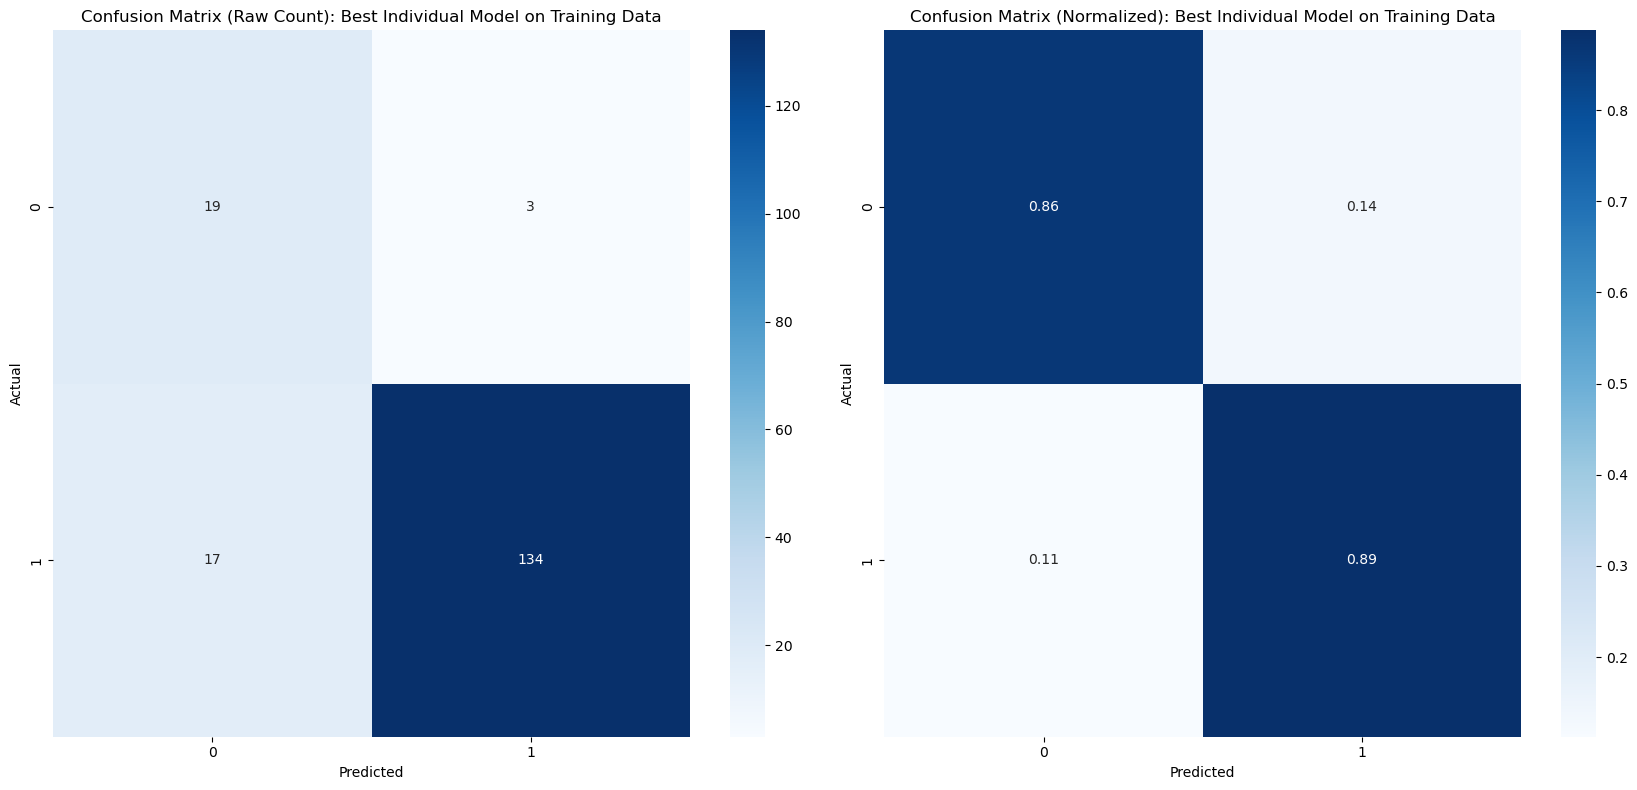

In [129]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the training data
##################################
cm_raw = confusion_matrix(y_train, individual_unbalanced_class_best_model_original.predict(X_train))
cm_normalized = confusion_matrix(y_train, individual_unbalanced_class_best_model_original.predict(X_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Raw Count): Best Individual Model on Training Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (Normalized): Best Individual Model on Training Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [130]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
##################################
print(f"F1 Score on Validation Data: {individual_unbalanced_class_best_model_original_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_validation, individual_unbalanced_class_best_model_original.predict(X_validation)))

F1 Score on Validation Data: 0.9495

Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.98      0.92      0.95        51

    accuracy                           0.91        58
   macro avg       0.79      0.89      0.83        58
weighted avg       0.93      0.91      0.92        58



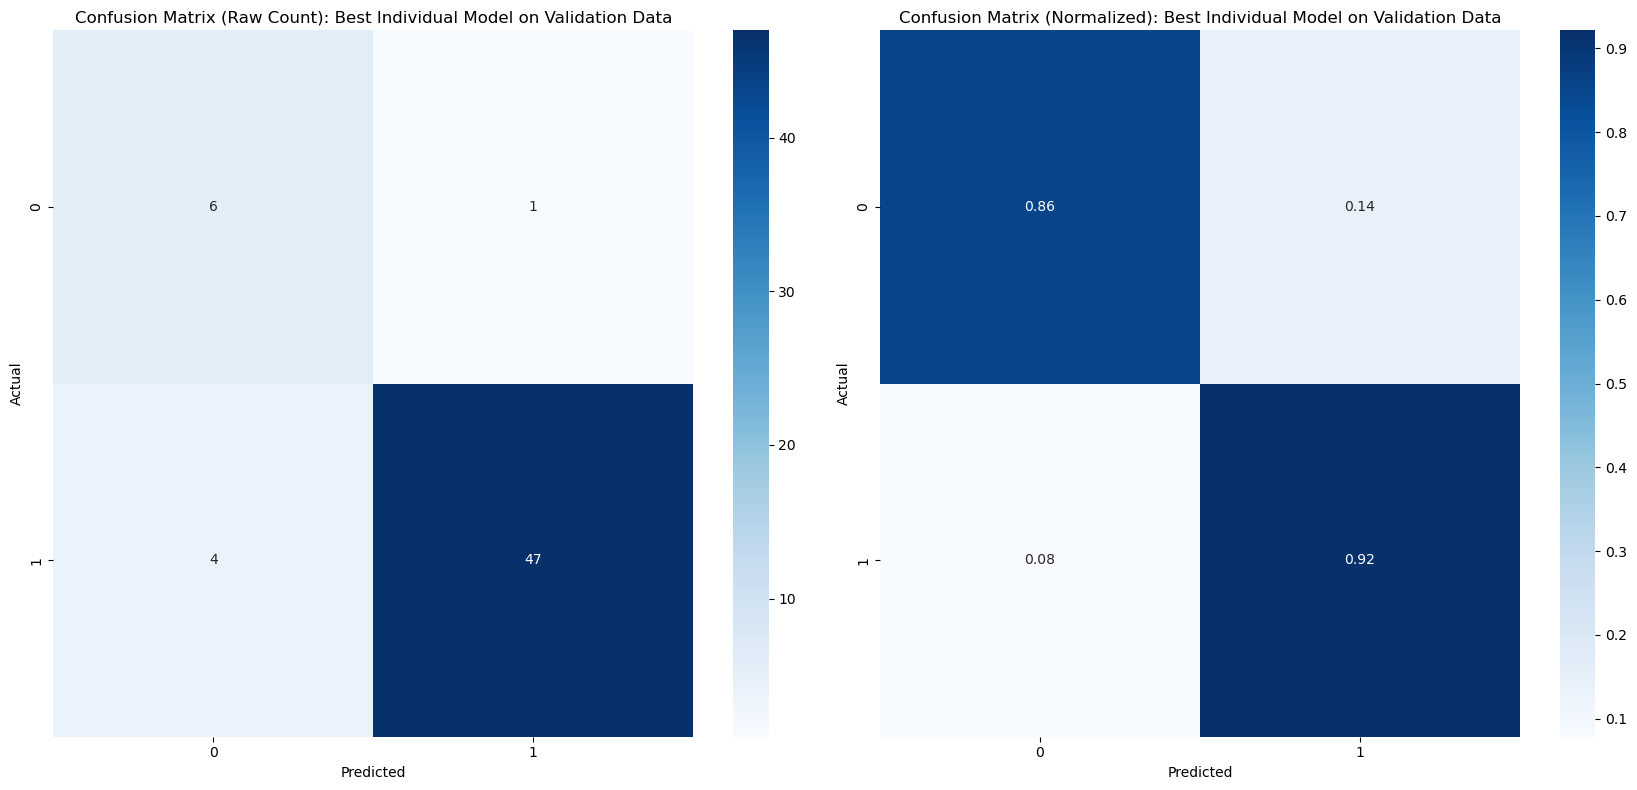

In [131]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_validation, individual_unbalanced_class_best_model_original.predict(X_validation))
cm_normalized = confusion_matrix(y_validation, individual_unbalanced_class_best_model_original.predict(X_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Raw Count): Best Individual Model on Validation Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (Normalized): Best Individual Model on Validation Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [132]:
##################################
# Obtaining the logit values (log-odds)
# from the decision function for training data
##################################
individual_unbalanced_class_best_model_original_logit_values = individual_unbalanced_class_best_model_original.decision_function(X_train)

In [133]:
##################################
# Obtaining the estimated probabilities 
# for the positive class (LUNG_CANCER=YES) for training data
##################################
individual_unbalanced_class_best_model_original_probabilities = individual_unbalanced_class_best_model_original.predict_proba(X_train)[:, 1]

In [134]:
##################################
# Sorting the values to generate
# a smoother curve
##################################
individual_unbalanced_class_best_model_original_sorted_indices = np.argsort(individual_unbalanced_class_best_model_original_logit_values)
individual_unbalanced_class_best_model_original_logit_values_sorted = individual_unbalanced_class_best_model_original_logit_values[individual_unbalanced_class_best_model_original_sorted_indices]
individual_unbalanced_class_best_model_original_probabilities_sorted = individual_unbalanced_class_best_model_original_probabilities[individual_unbalanced_class_best_model_original_sorted_indices]

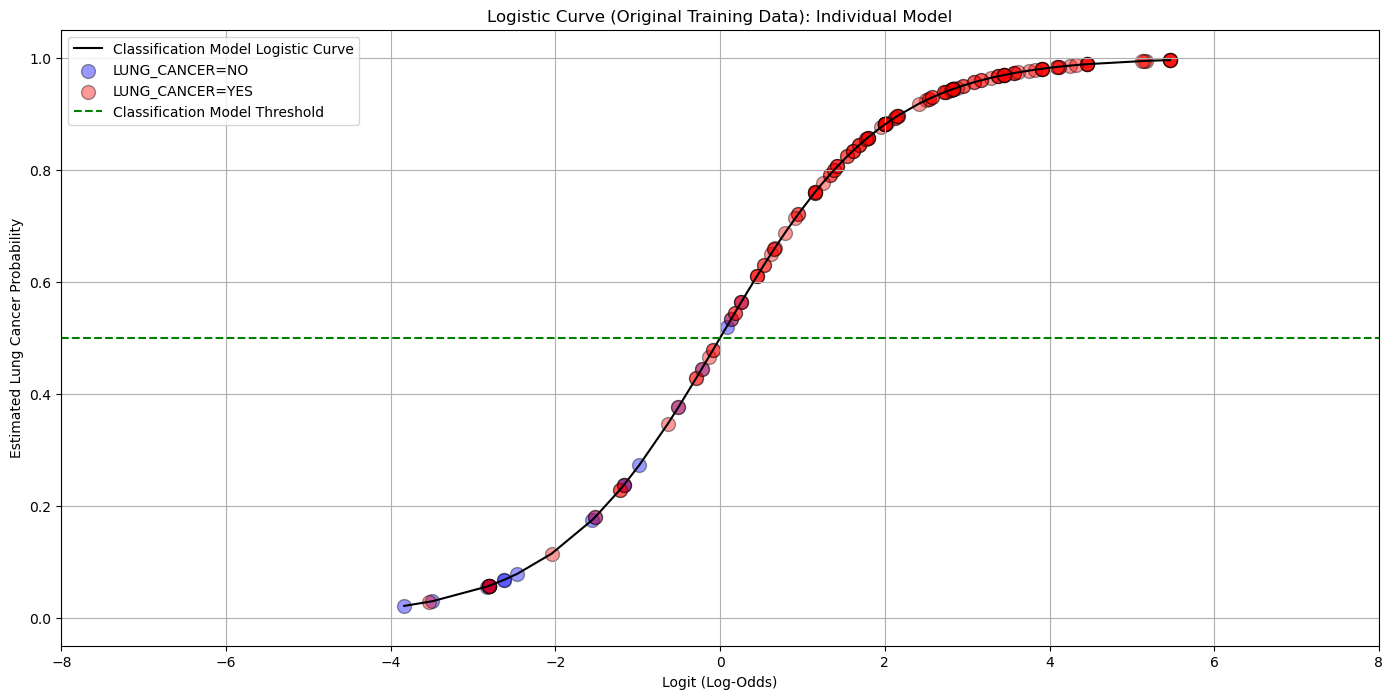

In [135]:
##################################
# Plotting the estimated logistic curve
# using the logit values
# and estimated probabilities
# obtained from the training data
##################################
plt.figure(figsize=(17, 8))
plt.plot(individual_unbalanced_class_best_model_original_logit_values_sorted, 
         individual_unbalanced_class_best_model_original_probabilities_sorted, label='Classification Model Logistic Curve', color='black')
plt.ylim(-0.05, 1.05)
plt.xlim(-8.00, 8.00)
target_0_indices = y_train == 0
target_1_indices = y_train == 1
plt.scatter(individual_unbalanced_class_best_model_original_logit_values[target_0_indices], 
            individual_unbalanced_class_best_model_original_probabilities[target_0_indices], 
            color='blue', alpha=0.40, s=100, marker= 'o', edgecolor='k', label='LUNG_CANCER=NO')
plt.scatter(individual_unbalanced_class_best_model_original_logit_values[target_1_indices], 
            individual_unbalanced_class_best_model_original_probabilities[target_1_indices], 
            color='red', alpha=0.40, s=100, marker='o', edgecolor='k', label='LUNG_CANCER=YES')
plt.axhline(0.5, color='green', linestyle='--', label='Classification Model Threshold')
plt.title('Logistic Curve (Original Training Data): Individual Model')
plt.xlabel('Logit (Log-Odds)')
plt.ylabel('Estimated Lung Cancer Probability')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

In [136]:
##################################
# Saving the best individual model
# developed from the original training data
################################## 
joblib.dump(individual_unbalanced_class_best_model_original, 
            os.path.join("..", MODELS_PATH, "individual_unbalanced_class_best_model_original.pkl"))

['..\\models\\individual_unbalanced_class_best_model_original.pkl']

#### 1.6.4.2 Stacked Classifier <a class="anchor" id="1.6.4.2"></a>

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

[Decision Trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) create a model that predicts the class label of a sample based on input features. A decision tree consists of nodes that represent decisions or choices, edges which connect nodes and represent the possible outcomes of a decision and leaf (or terminal) nodes which represent the final decision or the predicted class label. The decision-making process involves feature selection (at each internal node, the algorithm decides which feature to split on based on a certain criterion including gini impurity or entropy), splitting criteria (the splitting criteria aim to find the feature and its corresponding threshold that best separates the data into different classes. The goal is to increase homogeneity within each resulting subset), recursive splitting (the process of feature selection and splitting continues recursively, creating a tree structure. The dataset is partitioned at each internal node based on the chosen feature, and the process repeats for each subset) and stopping criteria (the recursion stops when a certain condition is met, known as a stopping criterion. Common stopping criteria include a maximum depth for the tree, a minimum number of samples required to split a node, or a minimum number of samples in a leaf node.)

[Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) is an ensemble learning method made up of a large set of small decision trees called estimators, with each producing its own prediction. The random forest model aggregates the predictions of the estimators to produce a more accurate prediction. The algorithm involves bootstrap aggregating (where smaller subsets of the training data are repeatedly subsampled with replacement), random subspacing (where a subset of features are sampled and used to train each individual estimator), estimator training (where unpruned decision trees are formulated for each estimator) and inference by aggregating the predictions of all estimators.

[Support Vector Machine](https://dl.acm.org/doi/10.1145/130385.130401) plots each observation in an N-dimensional space corresponding to the number of features in the data set and finds a hyperplane that maximally separates the different classes by a maximally large margin (which is defined as the distance between the hyperplane and the closest data points from each class). The algorithm applies kernel transformation by mapping non-linearly separable data using the similarities between the points in a high-dimensional feature space for improved discrimination.

[Class Weights](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) are used to assign different levels of importance to different classes when the distribution of instances across different classes in a classification problem is not equal. By assigning higher weights to the minority class, the model is encouraged to give more attention to correctly predicting instances from the minority class. Class weights are incorporated into the loss function during training. The loss for each instance is multiplied by its corresponding class weight. This means that misclassifying an instance from the minority class will have a greater impact on the overall loss than misclassifying an instance from the majority class. The use of class weights helps balance the influence of each class during training, mitigating the impact of class imbalance. It provides a way to focus the learning process on the classes that are underrepresented in the training data.

[Hyperparameter Tuning](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) is an iterative process that involves experimenting with different hyperparameter combinations, evaluating the model's performance, and refining the hyperparameter values to achieve the best possible performance on new, unseen data - aimed at building effective and well-generalizing machine learning models. A model's performance depends not only on the learned parameters (weights) during training but also on hyperparameters, which are external configuration settings that cannot be learned from the data. 

[Model Stacking](https://www.manning.com/books/ensemble-methods-for-machine-learning) - also known as stacked generalization, is an ensemble approach which involves creating a variety of base learners and using them to create intermediate predictions, one for each learned model. A meta-model is incorporated that gains knowledge of the same target from intermediate predictions. Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset). Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models). Stacking is appropriate when the predictions made by the base learners or the errors in predictions made by the models have minimal correlation. Achieving an improvement in performance is dependent upon the choice of base learners and whether they are sufficiently skillful in their predictions.

1. The optimal [decision tree model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) (**base learner**) determined from the 5-fold cross-validation of **train data (final)** contained the following hyperparameters:
    * <span style="color: #FF0000">max_depth</span> = 3
    * <span style="color: #FF0000">class_weight</span> = balanced
    * <span style="color: #FF0000">criterion</span> = entropy
    * <span style="color: #FF0000">min_samples_leaf</span> = 3
    * <span style="color: #FF0000">random_state</span> = 88888888
2. The optimal [random forest model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#) (**base learner**) determined from the 5-fold cross-validation of **train data (final)** contained the following hyperparameters:
    * <span style="color: #FF0000">max_depth</span> = 5
    * <span style="color: #FF0000">class_weight</span> = balanced
    * <span style="color: #FF0000">criterion</span> = entropy
    * <span style="color: #FF0000">max_features</span> = sqrt
    * <span style="color: #FF0000">min_samples_leaf</span> = 3
    * <span style="color: #FF0000">random_state</span> = 88888888
3. The optimal [support vector machine model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (**base learner**) determined from the 5-fold cross-validation of **train data (final)** contained the following hyperparameters:
    * <span style="color: #FF0000">C</span> = 0.50
    * <span style="color: #FF0000">class_weight</span> = balanced
    * <span style="color: #FF0000">kernel</span> = linear
    * <span style="color: #FF0000">probability</span> = true
    * <span style="color: #FF0000">random_state</span> = 88888888  
4. The optimal [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (**meta learner**) determined from the 5-fold cross-validation of **train data (final)** contained the following hyperparameters:
    * <span style="color: #FF0000">penalty</span> = L1
    * <span style="color: #FF0000">class_weight</span> = balanced
    * <span style="color: #FF0000">solver</span> = saga
    * <span style="color: #FF0000">max_iter</span> = 500
    * <span style="color: #FF0000">random_state</span> = 88888888
5. The **F1 scores** estimated for the different data subsets were as follows:
    * **train data (final)** = 0.9404
    * **train data (cross-validated)** = 0.9125
    * **validation data** = 0.9149
6. Moderate overfitting noted based on the considerable difference in the apparent and cross-validated **F1 scores**.

In [137]:
##################################
# Fitting the model on the 
# original training data
##################################
stacked_unbalanced_class_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('stacked_model',
                                        StackingClassifier(estimators=[('dt',
                                                                        DecisionTreeClassifier(class_weight='balanced',
                                                                                               criterion='entropy',
                                                                                               min_samples_leaf=3,
                                                                                               random_state=88888888)),
                                                                       ('rf',
                                                                        RandomForestClassifier(class_weight='balanced',
                                                                                               criterion='entropy',
                                                                                               min_samples_leaf=3,
                                                                                               random_state=88888888)),
                                                                       ('svm',
                                                                        SVC(class_weight='b...
                                                           final_estimator=LogisticRegression(max_iter=5000,
                                                                                              random_state=88888888,
                                                                                              solver='saga')))]),
             n_jobs=-1,
             param_grid={'stacked_model__dt__max_depth': [3, 5],
                         'stacked_model__final_estimator__class_weight': ['balanced'],
                         'stacked_model__final_estimator__penalty': ['l1', 'l2',
                                                                     None],
                         'stacked_model__rf__max_depth': [3, 5],
                         'stacked_model__svm__C': [0.5, 1.0]},
             scoring='f1', verbose=1)

In [138]:
##################################
# Identifying the best model
##################################
stacked_unbalanced_class_best_model_original = stacked_unbalanced_class_grid_search.best_estimator_

In [139]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
stacked_unbalanced_class_best_model_original_f1_cv = stacked_unbalanced_class_grid_search.best_score_
stacked_unbalanced_class_best_model_original_f1_train = f1_score(y_train, stacked_unbalanced_class_best_model_original.predict(X_train))
stacked_unbalanced_class_best_model_original_f1_validation = f1_score(y_validation, stacked_unbalanced_class_best_model_original.predict(X_validation))

In [140]:
##################################
# Identifying the optimal model
##################################
print('Best Stacked Model using the Original Train Data: ')
print(f"Best Stacked Model Parameters: {stacked_unbalanced_class_grid_search.best_params_}")

Best Stacked Model using the Original Train Data: 
Best Stacked Model Parameters: {'stacked_model__dt__max_depth': 3, 'stacked_model__final_estimator__class_weight': 'balanced', 'stacked_model__final_estimator__penalty': 'l1', 'stacked_model__rf__max_depth': 5, 'stacked_model__svm__C': 0.5}


In [141]:
##################################
# Summarizing the F1 score results
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {stacked_unbalanced_class_best_model_original_f1_cv:.4f}")
print(f"F1 Score on Training Data: {stacked_unbalanced_class_best_model_original_f1_train:.4f}")
print("\nClassification Report on Training Data:\n", classification_report(y_train, stacked_unbalanced_class_best_model_original.predict(X_train)))

F1 Score on Cross-Validated Data: 0.9125
F1 Score on Training Data: 0.9404

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72        22
           1       1.00      0.89      0.94       151

    accuracy                           0.90       173
   macro avg       0.78      0.94      0.83       173
weighted avg       0.94      0.90      0.91       173



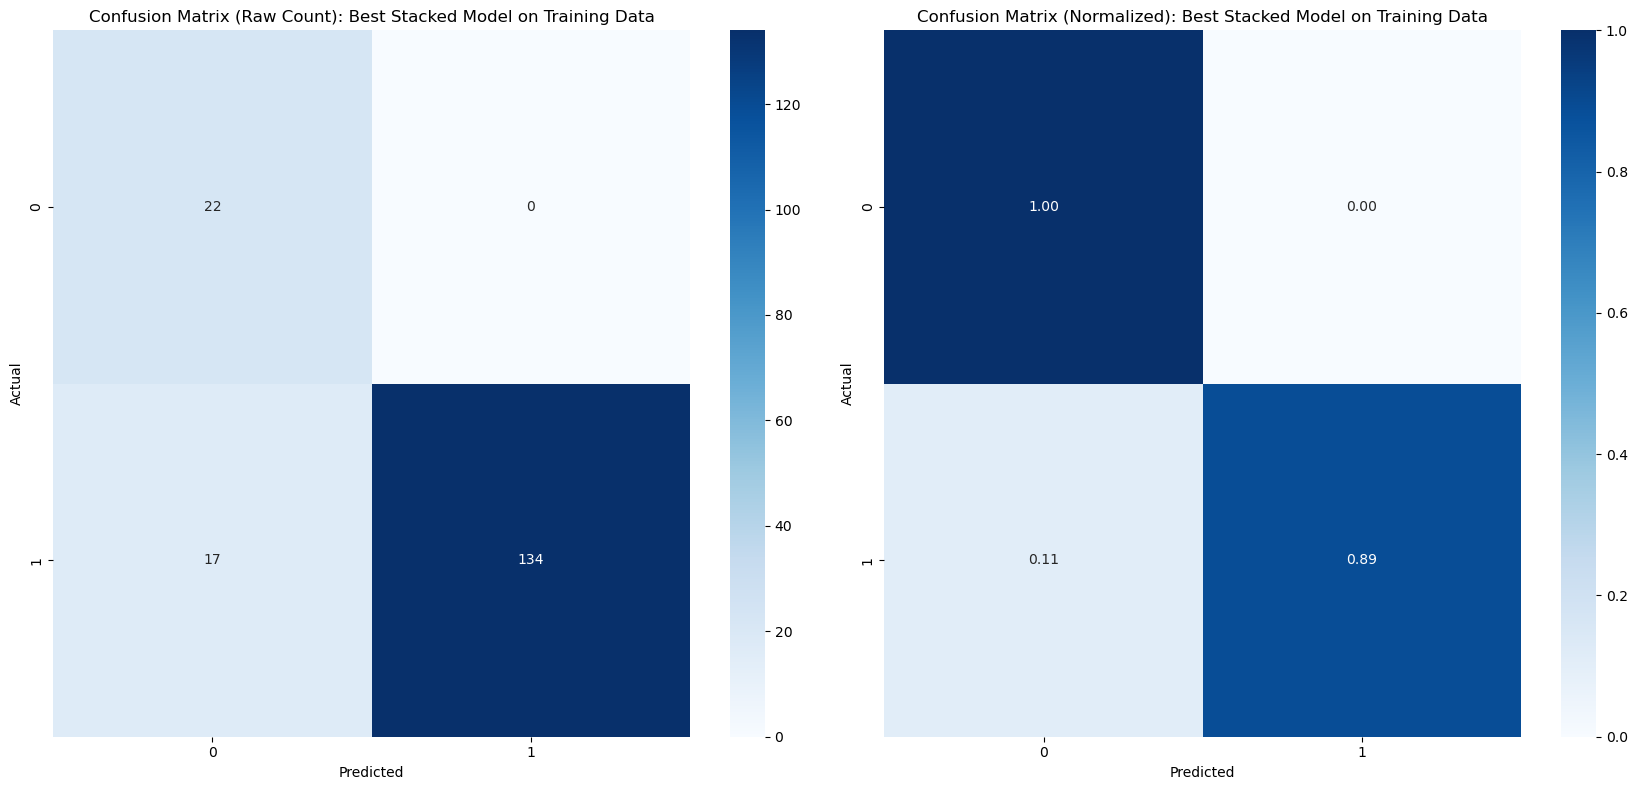

In [142]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the training data
##################################
cm_raw = confusion_matrix(y_train, stacked_unbalanced_class_best_model_original.predict(X_train))
cm_normalized = confusion_matrix(y_train, stacked_unbalanced_class_best_model_original.predict(X_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Raw Count): Best Stacked Model on Training Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (Normalized): Best Stacked Model on Training Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [143]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
##################################
print(f"F1 Score on Validation Data: {stacked_unbalanced_class_best_model_original_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_validation, stacked_unbalanced_class_best_model_original.predict(X_validation)))

F1 Score on Validation Data: 0.9149

Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64         7
           1       1.00      0.84      0.91        51

    accuracy                           0.86        58
   macro avg       0.73      0.92      0.78        58
weighted avg       0.94      0.86      0.88        58



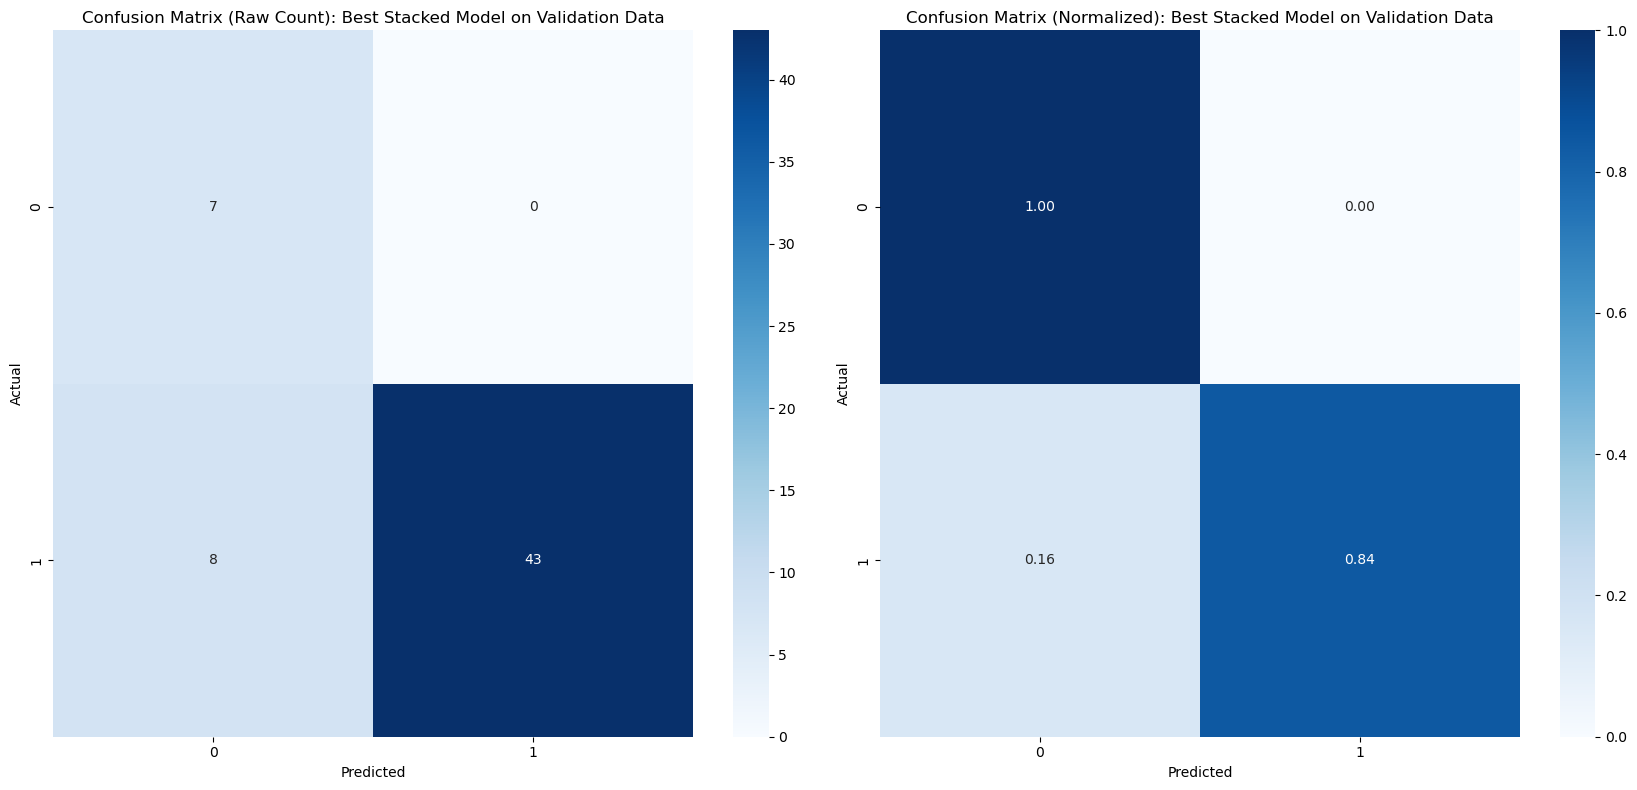

In [144]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_validation, stacked_unbalanced_class_best_model_original.predict(X_validation))
cm_normalized = confusion_matrix(y_validation, stacked_unbalanced_class_best_model_original.predict(X_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Raw Count): Best Stacked Model on Validation Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (Normalized): Best Stacked Model on Validation Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [145]:
##################################
# Obtaining the logit values (log-odds)
# from the decision function for training data
##################################
stacked_unbalanced_class_best_model_original_logit_values = stacked_unbalanced_class_best_model_original.decision_function(X_train)

In [146]:
##################################
# Obtaining the estimated probabilities 
# for the positive class (LUNG_CANCER=YES) for training data
##################################
stacked_unbalanced_class_best_model_original_probabilities = stacked_unbalanced_class_best_model_original.predict_proba(X_train)[:, 1]

In [147]:
##################################
# Sorting the values to generate
# a smoother curve
##################################
stacked_unbalanced_class_best_model_original_sorted_indices = np.argsort(stacked_unbalanced_class_best_model_original_logit_values)
stacked_unbalanced_class_best_model_original_logit_values_sorted = stacked_unbalanced_class_best_model_original_logit_values[stacked_unbalanced_class_best_model_original_sorted_indices]
stacked_unbalanced_class_best_model_original_probabilities_sorted = stacked_unbalanced_class_best_model_original_probabilities[stacked_unbalanced_class_best_model_original_sorted_indices]

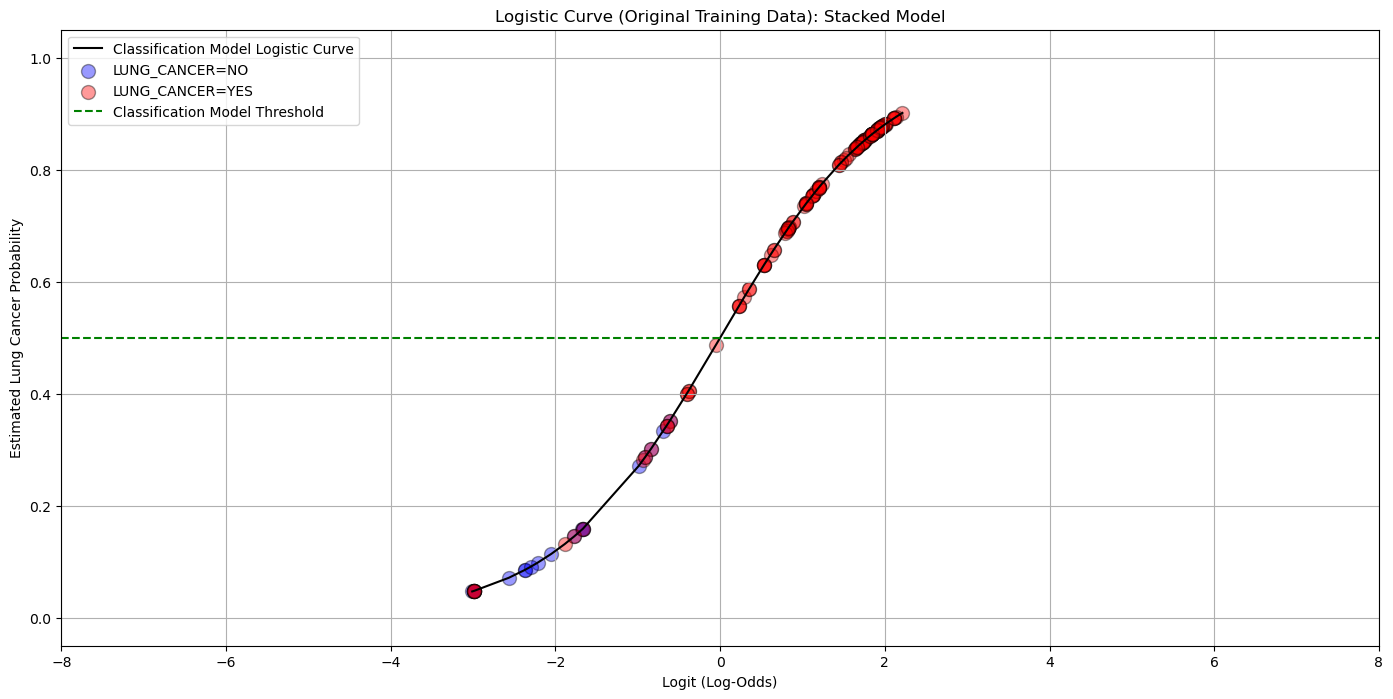

In [148]:
##################################
# Plotting the estimated logistic curve
# using the logit values
# and estimated probabilities
# obtained from the training data
##################################
plt.figure(figsize=(17, 8))
plt.plot(stacked_unbalanced_class_best_model_original_logit_values_sorted, 
         stacked_unbalanced_class_best_model_original_probabilities_sorted, label='Classification Model Logistic Curve', color='black')
plt.ylim(-0.05, 1.05)
plt.xlim(-8.00, 8.00)
target_0_indices = y_train == 0
target_1_indices = y_train == 1
plt.scatter(stacked_unbalanced_class_best_model_original_logit_values[target_0_indices], 
            stacked_unbalanced_class_best_model_original_probabilities[target_0_indices], 
            color='blue', alpha=0.40, s=100, marker= 'o', edgecolor='k', label='LUNG_CANCER=NO')
plt.scatter(stacked_unbalanced_class_best_model_original_logit_values[target_1_indices], 
            stacked_unbalanced_class_best_model_original_probabilities[target_1_indices], 
            color='red', alpha=0.40, s=100, marker='o', edgecolor='k', label='LUNG_CANCER=YES')
plt.axhline(0.5, color='green', linestyle='--', label='Classification Model Threshold')
plt.title('Logistic Curve (Original Training Data): Stacked Model')
plt.xlabel('Logit (Log-Odds)')
plt.ylabel('Estimated Lung Cancer Probability')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

In [149]:
##################################
# Saving the best stacked model
# developed from the original training data
################################## 
joblib.dump(stacked_unbalanced_class_best_model_original, 
            os.path.join("..", MODELS_PATH, "stacked_unbalanced_class_best_model_original.pkl"))

['..\\models\\stacked_unbalanced_class_best_model_original.pkl']

### 1.6.5 Model Fitting using Upsampled Training Data | Hyperparameter Tuning | Validation <a class="anchor" id="1.6.5"></a>

#### 1.6.5.1 Individual Classifier <a class="anchor" id="1.6.5.1"></a>

[Synthetic Minority Oversampling Technique](https://dl.acm.org/doi/10.5555/1622407.1622416) is specifically designed to increase the representation of the minority class by generating new minority instances between existing instances. The new instances created are not just the copy of existing minority cases, instead for each minority class instance, the algorithm generates synthetic examples by creating linear combinations of the feature vectors between that instance and its k nearest neighbors. The synthetic samples are placed along the line segments connecting the original instance to its neighbors.

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

[Hyperparameter Tuning](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) is an iterative process that involves experimenting with different hyperparameter combinations, evaluating the model's performance, and refining the hyperparameter values to achieve the best possible performance on new, unseen data - aimed at building effective and well-generalizing machine learning models. A model's performance depends not only on the learned parameters (weights) during training but also on hyperparameters, which are external configuration settings that cannot be learned from the data.

1. The optimal [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (**individual classifier**) determined from the 5-fold cross-validation of **train data (SMOTE-upsampled)** contained the following hyperparameters:
    * <span style="color: #FF0000">penalty</span> = L2
    * <span style="color: #FF0000">class_weight</span> = none
    * <span style="color: #FF0000">solver</span> = saga
    * <span style="color: #FF0000">max_iter</span> = 500
    * <span style="color: #FF0000">random_state</span> = 88888888
2. The **F1 scores** estimated for the different data subsets were as follows:
    * **train data (SMOTE-upsampled)** = 0.9495
    * **train data (cross-validated)** = 0.9474
    * **validation data** = 0.9615
3. Minimal overfitting noted based on the small difference in the apparent and cross-validated **F1 scores**.

In [150]:
##################################
# Fitting the model on the 
# upsampled training data
##################################
individual_balanced_class_grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('individual_model',
                                        LogisticRegression(max_iter=5000,
                                                           random_state=88888888,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'individual_model__class_weight': [None],
                         'individual_model__penalty': ['l1', 'l2', None]},
             scoring='f1', verbose=1)

In [151]:
##################################
# Identifying the best model
##################################
individual_balanced_class_best_model_upsampled = individual_balanced_class_grid_search.best_estimator_

In [152]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
individual_balanced_class_best_model_upsampled_f1_cv = individual_balanced_class_grid_search.best_score_
individual_balanced_class_best_model_upsampled_f1_train_smote = f1_score(y_train_smote, individual_balanced_class_best_model_upsampled.predict(X_train_smote))
individual_balanced_class_best_model_upsampled_f1_validation = f1_score(y_validation, individual_balanced_class_best_model_upsampled.predict(X_validation))

In [153]:
##################################
# Identifying the optimal model
##################################
print('Best Individual Model using the SMOTE-Upsampled Train Data: ')
print(f"Best Individual Model Parameters: {individual_balanced_class_grid_search.best_params_}")

Best Individual Model using the SMOTE-Upsampled Train Data: 
Best Individual Model Parameters: {'individual_model__class_weight': None, 'individual_model__penalty': 'l2'}


In [154]:
##################################
# Summarizing the F1 score results
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {individual_balanced_class_best_model_upsampled_f1_cv:.4f}")
print(f"F1 Score on Training Data: {individual_balanced_class_best_model_upsampled_f1_train_smote:.4f}")
print("\nClassification Report on Training Data:\n", classification_report(y_train_smote, individual_balanced_class_best_model_upsampled.predict(X_train_smote)))

F1 Score on Cross-Validated Data: 0.9474
F1 Score on Training Data: 0.9495

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       151
           1       0.97      0.93      0.95       151

    accuracy                           0.95       302
   macro avg       0.95      0.95      0.95       302
weighted avg       0.95      0.95      0.95       302



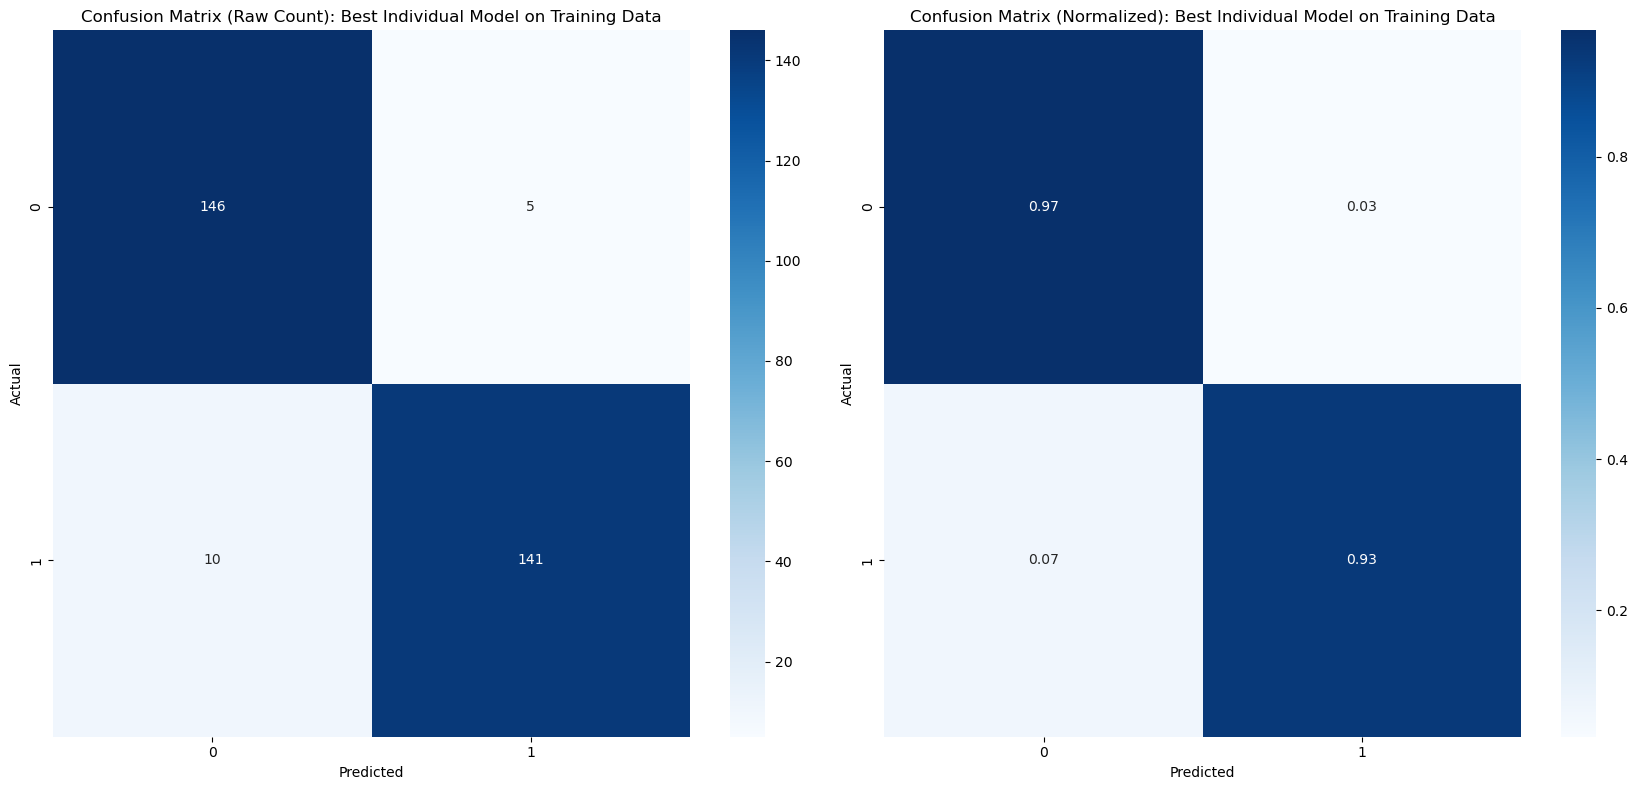

In [155]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the training data
##################################
cm_raw = confusion_matrix(y_train_smote, individual_balanced_class_best_model_upsampled.predict(X_train_smote))
cm_normalized = confusion_matrix(y_train_smote, individual_balanced_class_best_model_upsampled.predict(X_train_smote), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Raw Count): Best Individual Model on Training Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (Normalized): Best Individual Model on Training Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [156]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
##################################
print(f"F1 Score on Validation Data: {individual_balanced_class_best_model_upsampled_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_validation, individual_balanced_class_best_model_upsampled.predict(X_validation)))

F1 Score on Validation Data: 0.9615

Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.94      0.98      0.96        51

    accuracy                           0.93        58
   macro avg       0.87      0.78      0.81        58
weighted avg       0.93      0.93      0.93        58



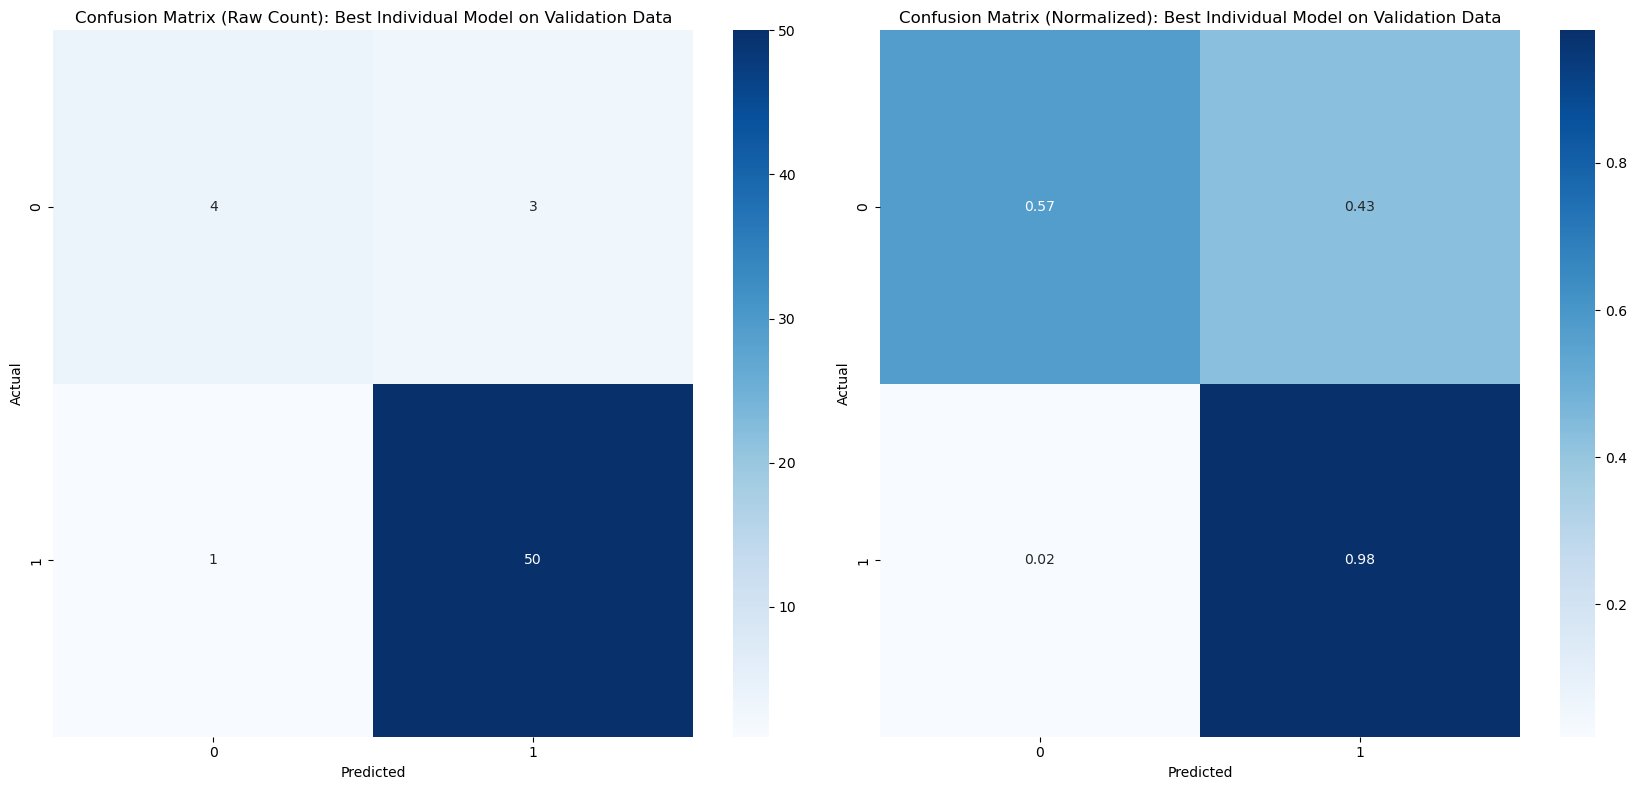

In [157]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_validation, individual_balanced_class_best_model_upsampled.predict(X_validation))
cm_normalized = confusion_matrix(y_validation, individual_balanced_class_best_model_upsampled.predict(X_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Raw Count): Best Individual Model on Validation Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (Normalized): Best Individual Model on Validation Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [158]:
##################################
# Obtaining the logit values (log-odds)
# from the decision function for training data
##################################
individual_balanced_class_best_model_upsampled_logit_values = individual_balanced_class_best_model_upsampled.decision_function(X_train_smote)

In [159]:
##################################
# Obtaining the estimated probabilities 
# for the positive class (LUNG_CANCER=YES) for training data
##################################
individual_balanced_class_best_model_upsampled_probabilities = individual_balanced_class_best_model_upsampled.predict_proba(X_train_smote)[:, 1]

In [160]:
##################################
# Sorting the values to generate
# a smoother curve
##################################
individual_balanced_class_best_model_upsampled_sorted_indices = np.argsort(individual_balanced_class_best_model_upsampled_logit_values)
individual_balanced_class_best_model_upsampled_logit_values_sorted = individual_balanced_class_best_model_upsampled_logit_values[individual_balanced_class_best_model_upsampled_sorted_indices]
individual_balanced_class_best_model_upsampled_probabilities_sorted = individual_balanced_class_best_model_upsampled_probabilities[individual_balanced_class_best_model_upsampled_sorted_indices]

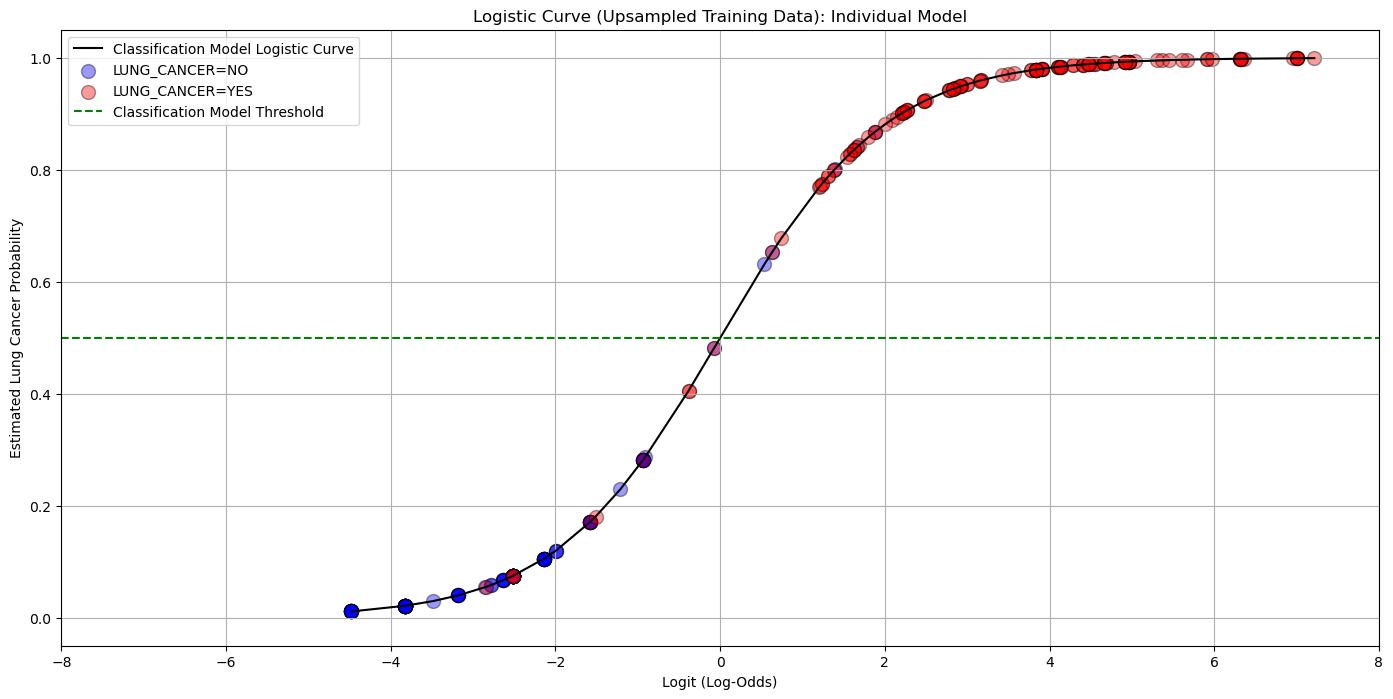

In [161]:
##################################
# Plotting the estimated logistic curve
# using the logit values
# and estimated probabilities
# obtained from the training data
##################################
plt.figure(figsize=(17, 8))
plt.plot(individual_balanced_class_best_model_upsampled_logit_values_sorted, 
         individual_balanced_class_best_model_upsampled_probabilities_sorted, label='Classification Model Logistic Curve', color='black')
plt.ylim(-0.05, 1.05)
plt.xlim(-8.00, 8.00)
target_0_indices = y_train_smote == 0
target_1_indices = y_train_smote == 1
plt.scatter(individual_balanced_class_best_model_upsampled_logit_values[target_0_indices], 
            individual_balanced_class_best_model_upsampled_probabilities[target_0_indices], 
            color='blue', alpha=0.40, s=100, marker= 'o', edgecolor='k', label='LUNG_CANCER=NO')
plt.scatter(individual_balanced_class_best_model_upsampled_logit_values[target_1_indices], 
            individual_balanced_class_best_model_upsampled_probabilities[target_1_indices], 
            color='red', alpha=0.40, s=100, marker='o', edgecolor='k', label='LUNG_CANCER=YES')
plt.axhline(0.5, color='green', linestyle='--', label='Classification Model Threshold')
plt.title('Logistic Curve (Upsampled Training Data): Individual Model')
plt.xlabel('Logit (Log-Odds)')
plt.ylabel('Estimated Lung Cancer Probability')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

In [162]:
##################################
# Saving the best individual model
# developed from the upsampled training data
################################## 
joblib.dump(individual_balanced_class_best_model_upsampled, 
            os.path.join("..", MODELS_PATH, "individual_balanced_class_best_model_upsampled.pkl"))

['..\\models\\individual_balanced_class_best_model_upsampled.pkl']

#### 1.6.5.2 Stacked Classifier <a class="anchor" id="1.6.5.2"></a>

[Synthetic Minority Oversampling Technique](https://dl.acm.org/doi/10.5555/1622407.1622416) is specifically designed to increase the representation of the minority class by generating new minority instances between existing instances. The new instances created are not just the copy of existing minority cases, instead for each minority class instance, the algorithm generates synthetic examples by creating linear combinations of the feature vectors between that instance and its k nearest neighbors. The synthetic samples are placed along the line segments connecting the original instance to its neighbors.

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

[Decision Trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) create a model that predicts the class label of a sample based on input features. A decision tree consists of nodes that represent decisions or choices, edges which connect nodes and represent the possible outcomes of a decision and leaf (or terminal) nodes which represent the final decision or the predicted class label. The decision-making process involves feature selection (at each internal node, the algorithm decides which feature to split on based on a certain criterion including gini impurity or entropy), splitting criteria (the splitting criteria aim to find the feature and its corresponding threshold that best separates the data into different classes. The goal is to increase homogeneity within each resulting subset), recursive splitting (the process of feature selection and splitting continues recursively, creating a tree structure. The dataset is partitioned at each internal node based on the chosen feature, and the process repeats for each subset) and stopping criteria (the recursion stops when a certain condition is met, known as a stopping criterion. Common stopping criteria include a maximum depth for the tree, a minimum number of samples required to split a node, or a minimum number of samples in a leaf node.)

[Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) is an ensemble learning method made up of a large set of small decision trees called estimators, with each producing its own prediction. The random forest model aggregates the predictions of the estimators to produce a more accurate prediction. The algorithm involves bootstrap aggregating (where smaller subsets of the training data are repeatedly subsampled with replacement), random subspacing (where a subset of features are sampled and used to train each individual estimator), estimator training (where unpruned decision trees are formulated for each estimator) and inference by aggregating the predictions of all estimators.

[Support Vector Machine](https://dl.acm.org/doi/10.1145/130385.130401) plots each observation in an N-dimensional space corresponding to the number of features in the data set and finds a hyperplane that maximally separates the different classes by a maximally large margin (which is defined as the distance between the hyperplane and the closest data points from each class). The algorithm applies kernel transformation by mapping non-linearly separable data using the similarities between the points in a high-dimensional feature space for improved discrimination.

[Hyperparameter Tuning](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) is an iterative process that involves experimenting with different hyperparameter combinations, evaluating the model's performance, and refining the hyperparameter values to achieve the best possible performance on new, unseen data - aimed at building effective and well-generalizing machine learning models. A model's performance depends not only on the learned parameters (weights) during training but also on hyperparameters, which are external configuration settings that cannot be learned from the data. 

[Model Stacking](https://www.manning.com/books/ensemble-methods-for-machine-learning) - also known as stacked generalization, is an ensemble approach which involves creating a variety of base learners and using them to create intermediate predictions, one for each learned model. A meta-model is incorporated that gains knowledge of the same target from intermediate predictions. Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset). Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models). Stacking is appropriate when the predictions made by the base learners or the errors in predictions made by the models have minimal correlation. Achieving an improvement in performance is dependent upon the choice of base learners and whether they are sufficiently skillful in their predictions.

1. The optimal [decision tree model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) (**base learner**) determined from the 5-fold cross-validation of **train data (SMOTE-upsampled)** contained the following hyperparameters:
    * <span style="color: #FF0000">max_depth</span> = 5
    * <span style="color: #FF0000">class_weight</span> = none
    * <span style="color: #FF0000">criterion</span> = entropy
    * <span style="color: #FF0000">min_samples_leaf</span> = 3
    * <span style="color: #FF0000">random_state</span> = 88888888
2. The optimal [random forest model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#) (**base learner**) determined from the 5-fold cross-validation of **train data (SMOTE-upsampled)** contained the following hyperparameters:
    * <span style="color: #FF0000">max_depth</span> = 5
    * <span style="color: #FF0000">class_weight</span> = none
    * <span style="color: #FF0000">criterion</span> = entropy
    * <span style="color: #FF0000">max_features</span> = sqrt
    * <span style="color: #FF0000">min_samples_leaf</span> = 3
    * <span style="color: #FF0000">random_state</span> = 88888888
3. The optimal [support vector machine model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (**base learner**) determined from the 5-fold cross-validation of **train data (SMOTE-upsampled)** contained the following hyperparameters:
    * <span style="color: #FF0000">C</span> = 0.50
    * <span style="color: #FF0000">class_weight</span> = none
    * <span style="color: #FF0000">kernel</span> = linear
    * <span style="color: #FF0000">probability</span> = true
    * <span style="color: #FF0000">random_state</span> = 88888888  
4. The optimal [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (**meta learner**) determined from the 5-fold cross-validation of **train data (SMOTE-upsampled)** contained the following hyperparameters:
    * <span style="color: #FF0000">penalty</span> = None
    * <span style="color: #FF0000">class_weight</span> = none
    * <span style="color: #FF0000">solver</span> = saga
    * <span style="color: #FF0000">max_iter</span> = 500
    * <span style="color: #FF0000">random_state</span> = 88888888
5. The **F1 scores** estimated for the different data subsets were as follows:
    * **train data (SMOTE-upsampled)** = 0.9571
    * **train data (cross-validated)** = 0.9584
    * **validation data** = 0.9709
6. Minimal overfitting noted based on the small difference in the apparent and cross-validated **F1 scores**.

In [163]:
##################################
# Fitting the model on the 
# upsampled training data
##################################
stacked_balanced_class_grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('stacked_model',
                                        StackingClassifier(estimators=[('dt',
                                                                        DecisionTreeClassifier(criterion='entropy',
                                                                                               min_samples_leaf=3,
                                                                                               random_state=88888888)),
                                                                       ('rf',
                                                                        RandomForestClassifier(criterion='entropy',
                                                                                               min_samples_leaf=3,
                                                                                               random_state=88888888)),
                                                                       ('svm',
                                                                        SVC(kernel='linear',
                                                                            probability=True,
                                                                            random_state=88888888))],
                                                           final_estimator=LogisticRegression(max_iter=5000,
                                                                                              random_state=88888888,
                                                                                              solver='saga')))]),
             n_jobs=-1,
             param_grid={'stacked_model__dt__max_depth': [3, 5],
                         'stacked_model__final_estimator__class_weight': [None],
                         'stacked_model__final_estimator__penalty': ['l1', 'l2',
                                                                     None],
                         'stacked_model__rf__max_depth': [3, 5],
                         'stacked_model__svm__C': [0.5, 1.0]},
             scoring='f1', verbose=1)

In [164]:
##################################
# Identifying the best model
##################################
stacked_balanced_class_best_model_upsampled = stacked_balanced_class_grid_search.best_estimator_

In [165]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
stacked_balanced_class_best_model_upsampled_f1_cv = stacked_balanced_class_grid_search.best_score_
stacked_balanced_class_best_model_upsampled_f1_train_smote = f1_score(y_train_smote, stacked_balanced_class_best_model_upsampled.predict(X_train_smote))
stacked_balanced_class_best_model_upsampled_f1_validation = f1_score(y_validation, stacked_balanced_class_best_model_upsampled.predict(X_validation))

In [166]:
##################################
# Identifying the optimal model
##################################
print('Best Stacked Model using the SMOTE-Upsampled Train Data: ')
print(f"Best Stacked Model Parameters: {stacked_balanced_class_grid_search.best_params_}")

Best Stacked Model using the SMOTE-Upsampled Train Data: 
Best Stacked Model Parameters: {'stacked_model__dt__max_depth': 5, 'stacked_model__final_estimator__class_weight': None, 'stacked_model__final_estimator__penalty': None, 'stacked_model__rf__max_depth': 5, 'stacked_model__svm__C': 0.5}


In [167]:
##################################
# Summarizing the F1 score results
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {stacked_balanced_class_best_model_upsampled_f1_cv:.4f}")
print(f"F1 Score on Training Data: {stacked_balanced_class_best_model_upsampled_f1_train_smote:.4f}")
print("\nClassification Report on Training Data:\n", classification_report(y_train_smote, stacked_balanced_class_best_model_upsampled.predict(X_train_smote)))

F1 Score on Cross-Validated Data: 0.9584
F1 Score on Training Data: 0.9571

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       151
           1       0.95      0.96      0.96       151

    accuracy                           0.96       302
   macro avg       0.96      0.96      0.96       302
weighted avg       0.96      0.96      0.96       302



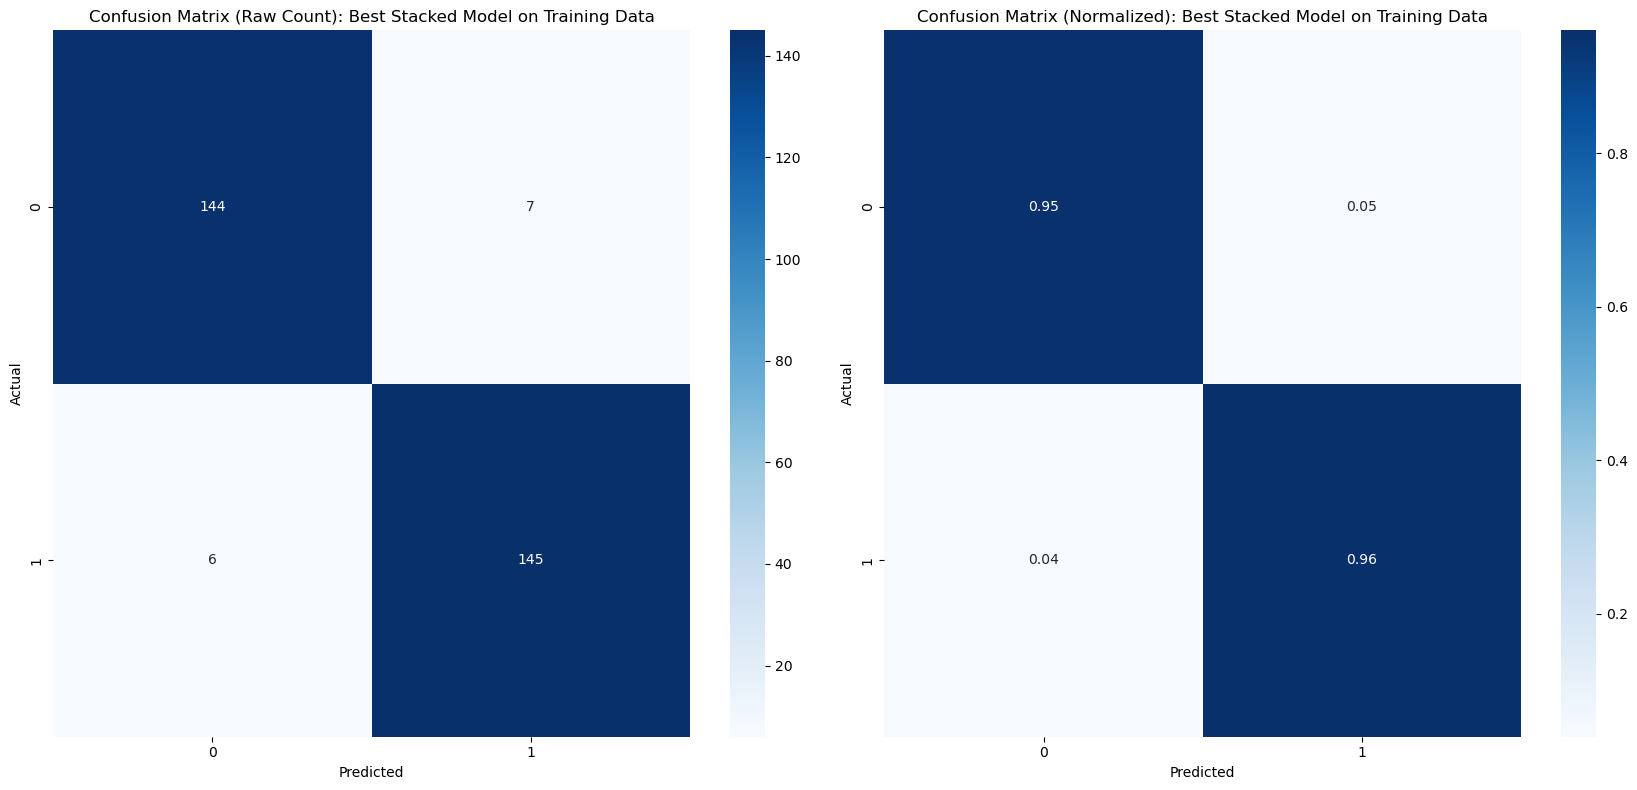

In [168]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the training data
##################################
cm_raw = confusion_matrix(y_train_smote, stacked_balanced_class_best_model_upsampled.predict(X_train_smote))
cm_normalized = confusion_matrix(y_train_smote, stacked_balanced_class_best_model_upsampled.predict(X_train_smote), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Raw Count): Best Stacked Model on Training Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (Normalized): Best Stacked Model on Training Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [169]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
##################################
print(f"F1 Score on Validation Data: {stacked_balanced_class_best_model_upsampled_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_validation, stacked_balanced_class_best_model_upsampled.predict(X_validation)))

F1 Score on Validation Data: 0.9709

Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.96      0.98      0.97        51

    accuracy                           0.95        58
   macro avg       0.90      0.85      0.87        58
weighted avg       0.95      0.95      0.95        58



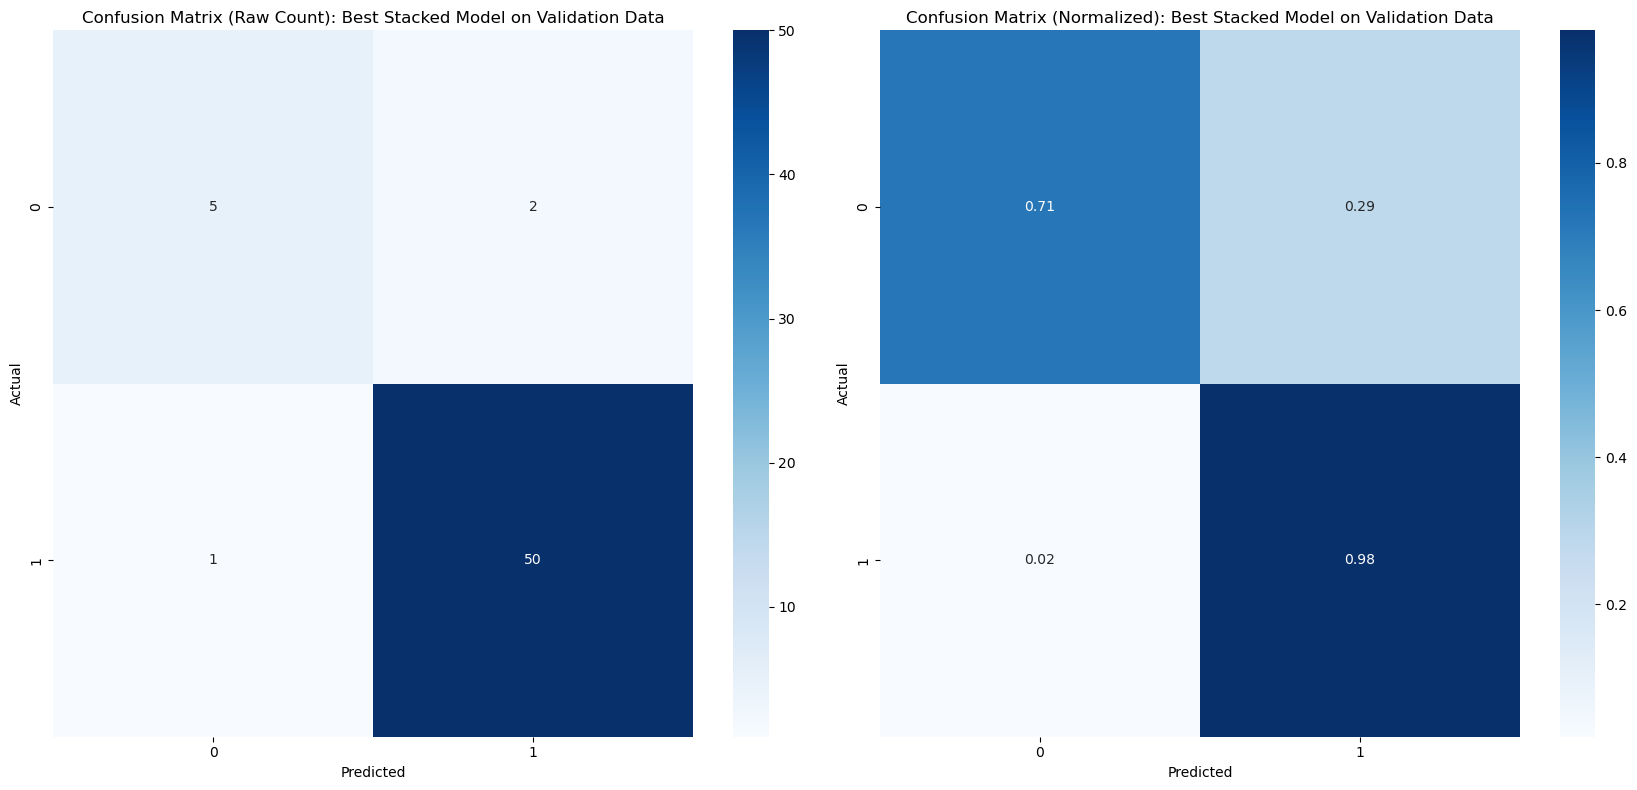

In [170]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_validation, stacked_balanced_class_best_model_upsampled.predict(X_validation))
cm_normalized = confusion_matrix(y_validation, stacked_balanced_class_best_model_upsampled.predict(X_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Raw Count): Best Stacked Model on Validation Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (Normalized): Best Stacked Model on Validation Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [171]:
##################################
# Obtaining the logit values (log-odds)
# from the decision function for training data
##################################
stacked_balanced_class_best_model_upsampled_logit_values = stacked_balanced_class_best_model_upsampled.decision_function(X_train_smote)

In [172]:
##################################
# Obtaining the estimated probabilities 
# for the positive class (LUNG_CANCER=YES) for training data
##################################
stacked_balanced_class_best_model_upsampled_probabilities = stacked_balanced_class_best_model_upsampled.predict_proba(X_train_smote)[:, 1]

In [173]:
##################################
# Sorting the values to generate
# a smoother curve
##################################
stacked_balanced_class_best_model_upsampled_sorted_indices = np.argsort(stacked_balanced_class_best_model_upsampled_logit_values)
stacked_balanced_class_best_model_upsampled_logit_values_sorted = stacked_balanced_class_best_model_upsampled_logit_values[stacked_balanced_class_best_model_upsampled_sorted_indices]
stacked_balanced_class_best_model_upsampled_probabilities_sorted = stacked_balanced_class_best_model_upsampled_probabilities[stacked_balanced_class_best_model_upsampled_sorted_indices]

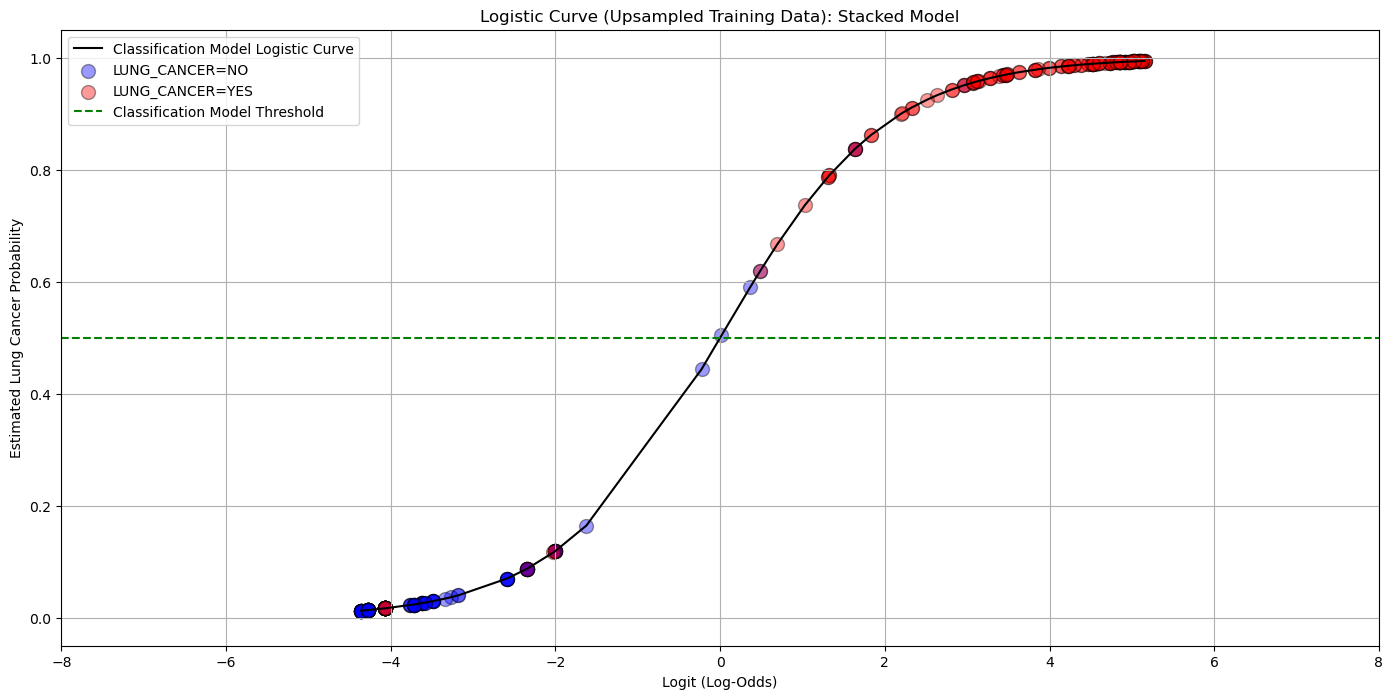

In [174]:
##################################
# Plotting the estimated logistic curve
# using the logit values
# and estimated probabilities
# obtained from the training data
##################################
plt.figure(figsize=(17, 8))
plt.plot(stacked_balanced_class_best_model_upsampled_logit_values_sorted, 
         stacked_balanced_class_best_model_upsampled_probabilities_sorted, label='Classification Model Logistic Curve', color='black')
plt.ylim(-0.05, 1.05)
plt.xlim(-8.00, 8.00)
target_0_indices = y_train_smote == 0
target_1_indices = y_train_smote == 1
plt.scatter(stacked_balanced_class_best_model_upsampled_logit_values[target_0_indices], 
            stacked_balanced_class_best_model_upsampled_probabilities[target_0_indices], 
            color='blue', alpha=0.40, s=100, marker= 'o', edgecolor='k', label='LUNG_CANCER=NO')
plt.scatter(stacked_balanced_class_best_model_upsampled_logit_values[target_1_indices], 
            stacked_balanced_class_best_model_upsampled_probabilities[target_1_indices], 
            color='red', alpha=0.40, s=100, marker='o', edgecolor='k', label='LUNG_CANCER=YES')
plt.axhline(0.5, color='green', linestyle='--', label='Classification Model Threshold')
plt.title('Logistic Curve (Upsampled Training Data): Stacked Model')
plt.xlabel('Logit (Log-Odds)')
plt.ylabel('Estimated Lung Cancer Probability')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

In [175]:
##################################
# Saving the best stacked model
# developed from the upsampled training data
################################## 
joblib.dump(stacked_balanced_class_best_model_upsampled, 
            os.path.join("..", MODELS_PATH, "stacked_balanced_class_best_model_upsampled.pkl"))

['..\\models\\stacked_balanced_class_best_model_upsampled.pkl']

### 1.6.6 Model Fitting using Downsampled Training Data | Hyperparameter Tuning | Validation <a class="anchor" id="1.6.5"></a>

#### 1.6.6.1 Individual Classifier <a class="anchor" id="1.6.6.1"></a>

[Condensed Nearest Neighbors](https://ieeexplore.ieee.org/document/1054155) is a prototype selection algorithm that aims to select a subset of instances from the original dataset, discarding redundant and less informative instances. The algorithm works by iteratively adding instances to the subset, starting with an empty set. At each iteration, an instance is added if it is not correctly classified by the current subset. The decision to add or discard an instance is based on its performance on a k-nearest neighbors classifier. If an instance is misclassified by the current subset's k-nearest neighbors, it is added to the subset. The process is repeated until no new instances are added to the subset. The resulting subset is a condensed representation of the dataset that retains the essential information needed for classification.

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

[Class Weights](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) are used to assign different levels of importance to different classes when the distribution of instances across different classes in a classification problem is not equal. By assigning higher weights to the minority class, the model is encouraged to give more attention to correctly predicting instances from the minority class. Class weights are incorporated into the loss function during training. The loss for each instance is multiplied by its corresponding class weight. This means that misclassifying an instance from the minority class will have a greater impact on the overall loss than misclassifying an instance from the majority class. The use of class weights helps balance the influence of each class during training, mitigating the impact of class imbalance. It provides a way to focus the learning process on the classes that are underrepresented in the training data.

[Hyperparameter Tuning](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) is an iterative process that involves experimenting with different hyperparameter combinations, evaluating the model's performance, and refining the hyperparameter values to achieve the best possible performance on new, unseen data - aimed at building effective and well-generalizing machine learning models. A model's performance depends not only on the learned parameters (weights) during training but also on hyperparameters, which are external configuration settings that cannot be learned from the data.

1. The optimal [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (**individual classifier**) from the 5-fold cross-validation of **train data (CNN-downsampled)** contained the following hyperparameters:
    * <span style="color: #FF0000">penalty</span> = L2
    * <span style="color: #FF0000">class_weight</span> = balanced
    * <span style="color: #FF0000">solver</span> = saga
    * <span style="color: #FF0000">max_iter</span> = 500
    * <span style="color: #FF0000">random_state</span> = 88888888
2. The **F1 scores** estimated for the different data subsets were as follows:
    * **train data (CNN-downsampled)** = 0.8533
    * **train data (cross-validated)** = 0.7537
    * **validation data** = 0.9709
3. High overfitting noted based on the large difference in the apparent and cross-validated **F1 scores**.

In [176]:
##################################
# Fitting the model on the 
# downsampled training data
##################################
individual_unbalanced_class_grid_search.fit(X_train_cnn, y_train_cnn)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('individual_model',
                                        LogisticRegression(max_iter=5000,
                                                           random_state=88888888,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'individual_model__class_weight': ['balanced'],
                         'individual_model__penalty': ['l1', 'l2', None]},
             scoring='f1', verbose=1)

In [177]:
##################################
# Identifying the best model
##################################
individual_unbalanced_class_best_model_downsampled = individual_unbalanced_class_grid_search.best_estimator_

In [178]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
individual_unbalanced_class_best_model_downsampled_f1_cv = individual_unbalanced_class_grid_search.best_score_
individual_unbalanced_class_best_model_downsampled_f1_train_cnn = f1_score(y_train_cnn, individual_unbalanced_class_best_model_downsampled.predict(X_train_cnn))
individual_unbalanced_class_best_model_downsampled_f1_validation = f1_score(y_validation, individual_unbalanced_class_best_model_downsampled.predict(X_validation))

In [179]:
##################################
# Identifying the optimal model
##################################
print('Best Individual Model using the CNN-Downsampled Train Data: ')
print(f"Best Individual Model Parameters: {individual_unbalanced_class_grid_search.best_params_}")

Best Individual Model using the CNN-Downsampled Train Data: 
Best Individual Model Parameters: {'individual_model__class_weight': 'balanced', 'individual_model__penalty': 'l2'}


In [180]:
##################################
# Summarizing the F1 score results
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {individual_unbalanced_class_best_model_downsampled_f1_cv:.4f}")
print(f"F1 Score on Training Data: {individual_unbalanced_class_best_model_downsampled_f1_train_cnn:.4f}")
print("\nClassification Report on Training Data:\n", classification_report(y_train_cnn, individual_unbalanced_class_best_model_downsampled.predict(X_train_cnn)))

F1 Score on Cross-Validated Data: 0.7537
F1 Score on Training Data: 0.8533

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        22
           1       0.89      0.82      0.85        39

    accuracy                           0.82        61
   macro avg       0.80      0.82      0.81        61
weighted avg       0.83      0.82      0.82        61



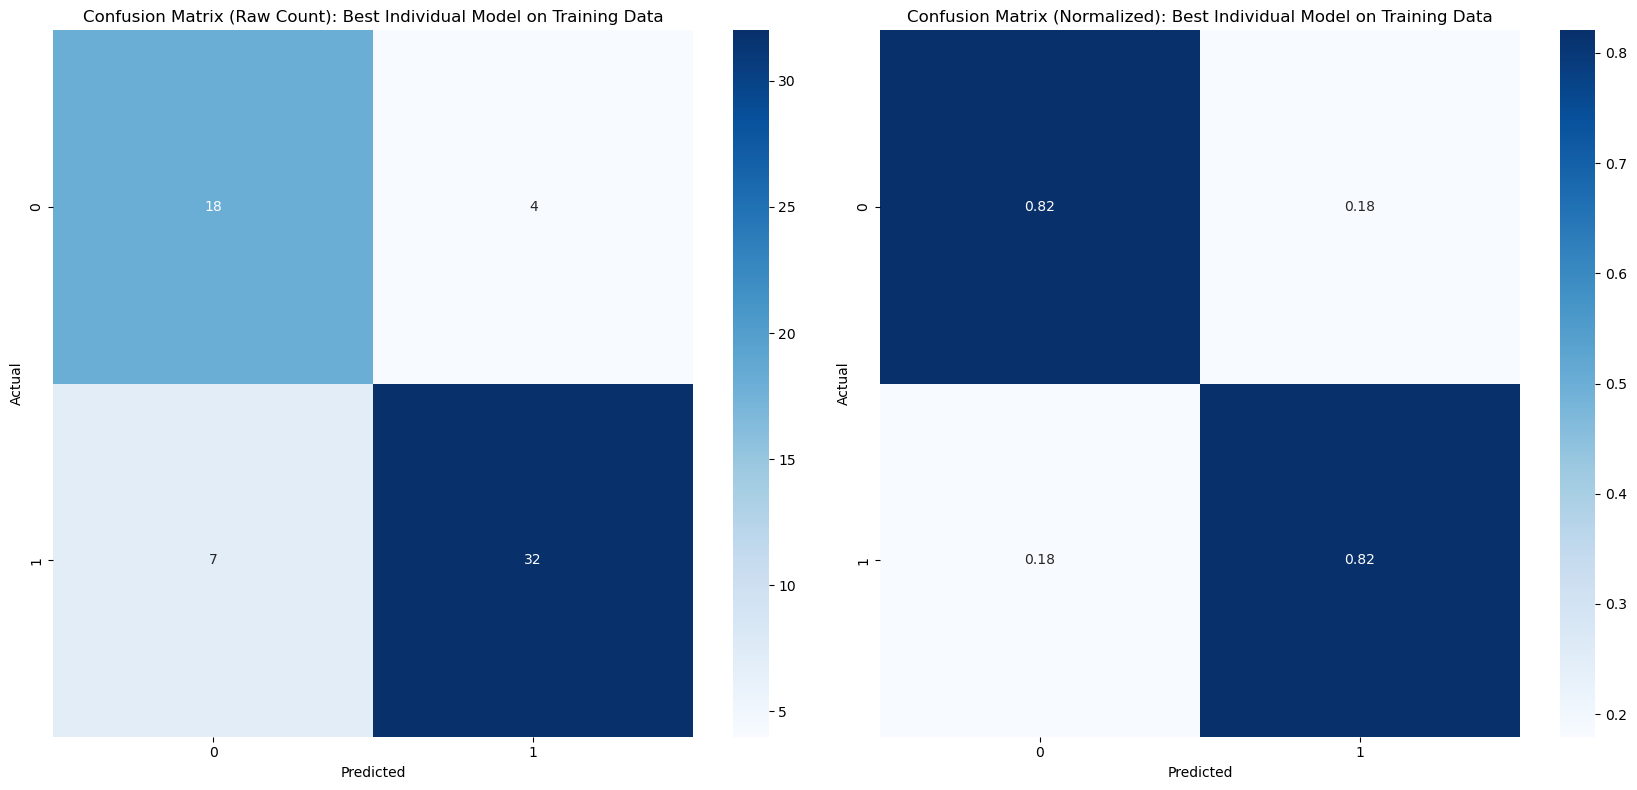

In [181]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the training data
##################################
cm_raw = confusion_matrix(y_train_cnn, individual_unbalanced_class_best_model_downsampled.predict(X_train_cnn))
cm_normalized = confusion_matrix(y_train_cnn, individual_unbalanced_class_best_model_downsampled.predict(X_train_cnn), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Raw Count): Best Individual Model on Training Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (Normalized): Best Individual Model on Training Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [182]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
##################################
print(f"F1 Score on Validation Data: {individual_unbalanced_class_best_model_downsampled_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_validation, individual_unbalanced_class_best_model_downsampled.predict(X_validation)))

F1 Score on Validation Data: 0.9709

Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.96      0.98      0.97        51

    accuracy                           0.95        58
   macro avg       0.90      0.85      0.87        58
weighted avg       0.95      0.95      0.95        58



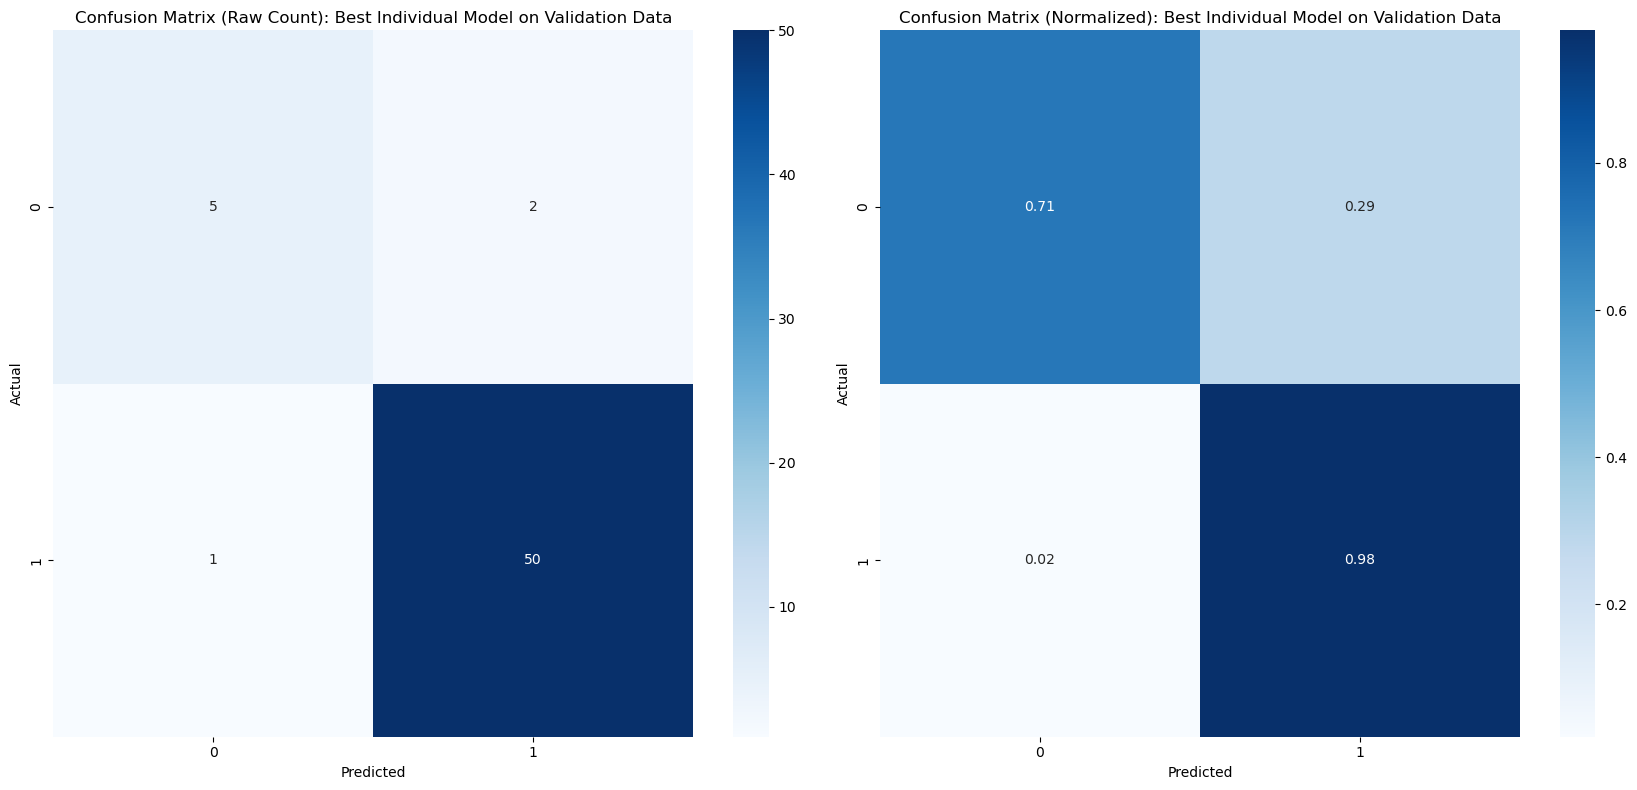

In [183]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_validation, individual_unbalanced_class_best_model_downsampled.predict(X_validation))
cm_normalized = confusion_matrix(y_validation, individual_unbalanced_class_best_model_downsampled.predict(X_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Raw Count): Best Individual Model on Validation Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (Normalized): Best Individual Model on Validation Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [184]:
##################################
# Obtaining the logit values (log-odds)
# from the decision function for training data
##################################
individual_unbalanced_class_best_model_downsampled_logit_values = individual_unbalanced_class_best_model_downsampled.decision_function(X_train_cnn)

In [185]:
##################################
# Obtaining the estimated probabilities 
# for the positive class (LUNG_CANCER=YES) for training data
##################################
individual_unbalanced_class_best_model_downsampled_probabilities = individual_unbalanced_class_best_model_downsampled.predict_proba(X_train_cnn)[:, 1]

In [186]:
##################################
# Sorting the values to generate
# a smoother curve
##################################
individual_unbalanced_class_best_model_downsampled_sorted_indices = np.argsort(individual_unbalanced_class_best_model_downsampled_logit_values)
individual_unbalanced_class_best_model_downsampled_logit_values_sorted = individual_unbalanced_class_best_model_downsampled_logit_values[individual_unbalanced_class_best_model_downsampled_sorted_indices]
individual_unbalanced_class_best_model_downsampled_probabilities_sorted = individual_unbalanced_class_best_model_downsampled_probabilities[individual_unbalanced_class_best_model_downsampled_sorted_indices]

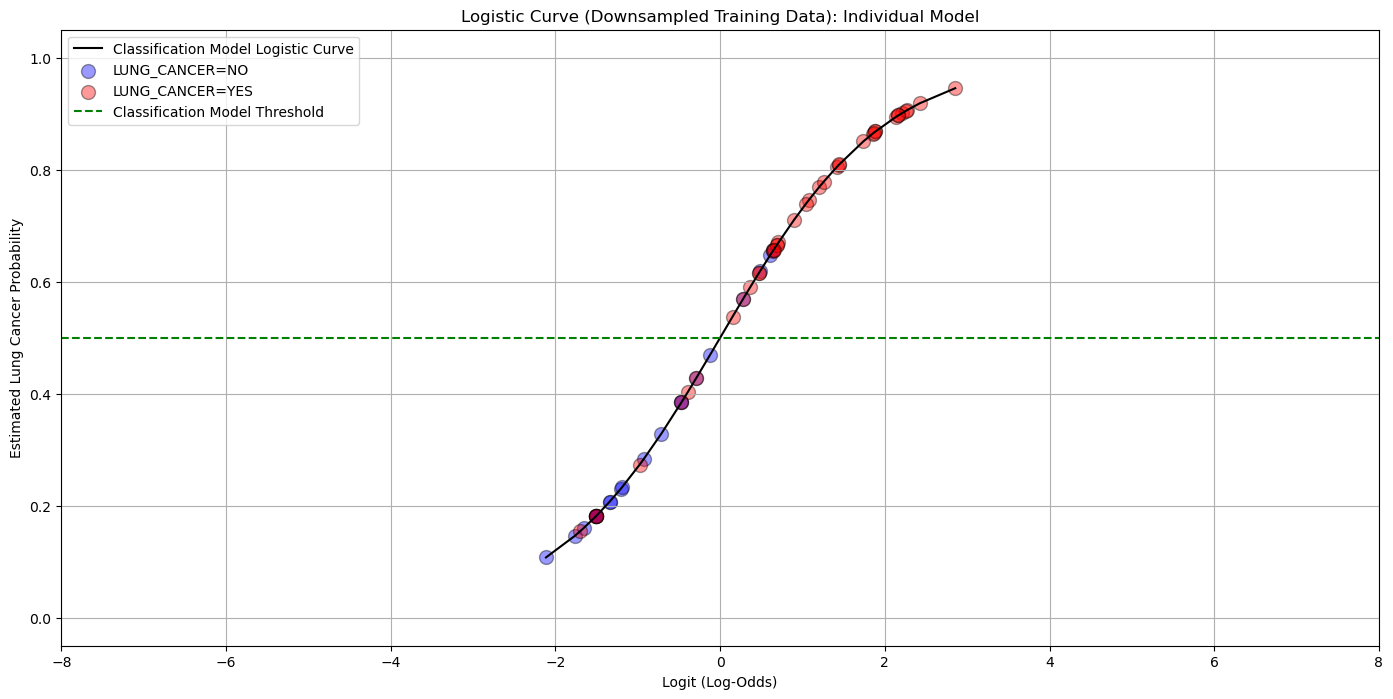

In [187]:
##################################
# Plotting the estimated logistic curve
# using the logit values
# and estimated probabilities
# obtained from the training data
##################################
plt.figure(figsize=(17, 8))
plt.plot(individual_unbalanced_class_best_model_downsampled_logit_values_sorted, 
         individual_unbalanced_class_best_model_downsampled_probabilities_sorted, label='Classification Model Logistic Curve', color='black')
plt.ylim(-0.05, 1.05)
plt.xlim(-8.00, 8.00)
target_0_indices = y_train_cnn == 0
target_1_indices = y_train_cnn == 1
plt.scatter(individual_unbalanced_class_best_model_downsampled_logit_values[target_0_indices], 
            individual_unbalanced_class_best_model_downsampled_probabilities[target_0_indices], 
            color='blue', alpha=0.40, s=100, marker= 'o', edgecolor='k', label='LUNG_CANCER=NO')
plt.scatter(individual_unbalanced_class_best_model_downsampled_logit_values[target_1_indices], 
            individual_unbalanced_class_best_model_downsampled_probabilities[target_1_indices], 
            color='red', alpha=0.40, s=100, marker='o', edgecolor='k', label='LUNG_CANCER=YES')
plt.axhline(0.5, color='green', linestyle='--', label='Classification Model Threshold')
plt.title('Logistic Curve (Downsampled Training Data): Individual Model')
plt.xlabel('Logit (Log-Odds)')
plt.ylabel('Estimated Lung Cancer Probability')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

In [188]:
##################################
# Saving the best individual model
# developed from the downsampled training data
################################## 
joblib.dump(individual_unbalanced_class_best_model_downsampled, 
            os.path.join("..", MODELS_PATH, "individual_unbalanced_class_best_model_downsampled.pkl"))

['..\\models\\individual_unbalanced_class_best_model_downsampled.pkl']

#### 1.6.6.2 Stacked Classifier <a class="anchor" id="1.6.6.2"></a>

[Condensed Nearest Neighbors](https://ieeexplore.ieee.org/document/1054155) is a prototype selection algorithm that aims to select a subset of instances from the original dataset, discarding redundant and less informative instances. The algorithm works by iteratively adding instances to the subset, starting with an empty set. At each iteration, an instance is added if it is not correctly classified by the current subset. The decision to add or discard an instance is based on its performance on a k-nearest neighbors classifier. If an instance is misclassified by the current subset's k-nearest neighbors, it is added to the subset. The process is repeated until no new instances are added to the subset. The resulting subset is a condensed representation of the dataset that retains the essential information needed for classification.

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

[Decision Trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) create a model that predicts the class label of a sample based on input features. A decision tree consists of nodes that represent decisions or choices, edges which connect nodes and represent the possible outcomes of a decision and leaf (or terminal) nodes which represent the final decision or the predicted class label. The decision-making process involves feature selection (at each internal node, the algorithm decides which feature to split on based on a certain criterion including gini impurity or entropy), splitting criteria (the splitting criteria aim to find the feature and its corresponding threshold that best separates the data into different classes. The goal is to increase homogeneity within each resulting subset), recursive splitting (the process of feature selection and splitting continues recursively, creating a tree structure. The dataset is partitioned at each internal node based on the chosen feature, and the process repeats for each subset) and stopping criteria (the recursion stops when a certain condition is met, known as a stopping criterion. Common stopping criteria include a maximum depth for the tree, a minimum number of samples required to split a node, or a minimum number of samples in a leaf node.)

[Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) is an ensemble learning method made up of a large set of small decision trees called estimators, with each producing its own prediction. The random forest model aggregates the predictions of the estimators to produce a more accurate prediction. The algorithm involves bootstrap aggregating (where smaller subsets of the training data are repeatedly subsampled with replacement), random subspacing (where a subset of features are sampled and used to train each individual estimator), estimator training (where unpruned decision trees are formulated for each estimator) and inference by aggregating the predictions of all estimators.

[Support Vector Machine](https://dl.acm.org/doi/10.1145/130385.130401) plots each observation in an N-dimensional space corresponding to the number of features in the data set and finds a hyperplane that maximally separates the different classes by a maximally large margin (which is defined as the distance between the hyperplane and the closest data points from each class). The algorithm applies kernel transformation by mapping non-linearly separable data using the similarities between the points in a high-dimensional feature space for improved discrimination.

[Class Weights](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) are used to assign different levels of importance to different classes when the distribution of instances across different classes in a classification problem is not equal. By assigning higher weights to the minority class, the model is encouraged to give more attention to correctly predicting instances from the minority class. Class weights are incorporated into the loss function during training. The loss for each instance is multiplied by its corresponding class weight. This means that misclassifying an instance from the minority class will have a greater impact on the overall loss than misclassifying an instance from the majority class. The use of class weights helps balance the influence of each class during training, mitigating the impact of class imbalance. It provides a way to focus the learning process on the classes that are underrepresented in the training data.

[Hyperparameter Tuning](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) is an iterative process that involves experimenting with different hyperparameter combinations, evaluating the model's performance, and refining the hyperparameter values to achieve the best possible performance on new, unseen data - aimed at building effective and well-generalizing machine learning models. A model's performance depends not only on the learned parameters (weights) during training but also on hyperparameters, which are external configuration settings that cannot be learned from the data. 

[Model Stacking](https://www.manning.com/books/ensemble-methods-for-machine-learning) - also known as stacked generalization, is an ensemble approach which involves creating a variety of base learners and using them to create intermediate predictions, one for each learned model. A meta-model is incorporated that gains knowledge of the same target from intermediate predictions. Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset). Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models). Stacking is appropriate when the predictions made by the base learners or the errors in predictions made by the models have minimal correlation. Achieving an improvement in performance is dependent upon the choice of base learners and whether they are sufficiently skillful in their predictions.

1. The optimal [decision tree model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) (**base learner**) determined from the 5-fold cross-validation of **train data (CNN-downsampled)** contained the following hyperparameters:
    * <span style="color: #FF0000">max_depth</span> = 3
    * <span style="color: #FF0000">class_weight</span> = balanced
    * <span style="color: #FF0000">criterion</span> = entropy
    * <span style="color: #FF0000">min_samples_leaf</span> = 3
    * <span style="color: #FF0000">random_state</span> = 88888888
2. The optimal [random forest model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#) (**base learner**) determined from the 5-fold cross-validation of **train data (CNN-downsampled)** contained the following hyperparameters:
    * <span style="color: #FF0000">max_depth</span> = 2
    * <span style="color: #FF0000">class_weight</span> = balanced
    * <span style="color: #FF0000">criterion</span> = entropy
    * <span style="color: #FF0000">max_features</span> = sqrt
    * <span style="color: #FF0000">min_samples_leaf</span> = 3
    * <span style="color: #FF0000">random_state</span> = 88888888
3. The optimal [support vector machine model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (**base learner**) determined from the 5-fold cross-validation of **train data (CNN-downsampled)** contained the following hyperparameters:
    * <span style="color: #FF0000">C</span> = 1.00
    * <span style="color: #FF0000">class_weight</span> = balanced
    * <span style="color: #FF0000">kernel</span> = linear
    * <span style="color: #FF0000">probability</span> = true
    * <span style="color: #FF0000">random_state</span> = 88888888  
4. The optimal [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (**meta learner**) determined from the 5-fold cross-validation of **train data (CNN-downsampled)** contained the following hyperparameters:
    * <span style="color: #FF0000">penalty</span> = None
    * <span style="color: #FF0000">class_weight</span> = balanced
    * <span style="color: #FF0000">solver</span> = saga
    * <span style="color: #FF0000">max_iter</span> = 500
    * <span style="color: #FF0000">random_state</span> = 88888888
5. The **F1 scores** estimated for the different data subsets were as follows:
    * **train data (CNN-downsampled)** = 0.8219
    * **train data (cross-validated)** = 0.7531
    * **validation data** = 0.9524
6. High overfitting noted based on the large difference in the apparent and cross-validated **F1 scores**.

In [189]:
##################################
# Fitting the model on the 
# downsampled training data
##################################
stacked_unbalanced_class_grid_search.fit(X_train_cnn, y_train_cnn)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('stacked_model',
                                        StackingClassifier(estimators=[('dt',
                                                                        DecisionTreeClassifier(class_weight='balanced',
                                                                                               criterion='entropy',
                                                                                               min_samples_leaf=3,
                                                                                               random_state=88888888)),
                                                                       ('rf',
                                                                        RandomForestClassifier(class_weight='balanced',
                                                                                               criterion='entropy',
                                                                                               min_samples_leaf=3,
                                                                                               random_state=88888888)),
                                                                       ('svm',
                                                                        SVC(class_weight='b...
                                                           final_estimator=LogisticRegression(max_iter=5000,
                                                                                              random_state=88888888,
                                                                                              solver='saga')))]),
             n_jobs=-1,
             param_grid={'stacked_model__dt__max_depth': [3, 5],
                         'stacked_model__final_estimator__class_weight': ['balanced'],
                         'stacked_model__final_estimator__penalty': ['l1', 'l2',
                                                                     None],
                         'stacked_model__rf__max_depth': [3, 5],
                         'stacked_model__svm__C': [0.5, 1.0]},
             scoring='f1', verbose=1)

In [190]:
##################################
# Identifying the best model
##################################
stacked_unbalanced_class_best_model_downsampled = stacked_unbalanced_class_grid_search.best_estimator_

In [191]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
stacked_unbalanced_class_best_model_downsampled_f1_cv = stacked_unbalanced_class_grid_search.best_score_
stacked_unbalanced_class_best_model_downsampled_f1_train_cnn = f1_score(y_train_cnn, stacked_unbalanced_class_best_model_downsampled.predict(X_train_cnn))
stacked_unbalanced_class_best_model_downsampled_f1_validation = f1_score(y_validation, stacked_unbalanced_class_best_model_downsampled.predict(X_validation))

In [192]:
##################################
# Identifying the optimal model
##################################
print('Best Stacked Model using the CNN-Downsampled Train Data: ')
print(f"Best Stacked Model Parameters: {stacked_unbalanced_class_grid_search.best_params_}")

Best Stacked Model using the CNN-Downsampled Train Data: 
Best Stacked Model Parameters: {'stacked_model__dt__max_depth': 3, 'stacked_model__final_estimator__class_weight': 'balanced', 'stacked_model__final_estimator__penalty': None, 'stacked_model__rf__max_depth': 3, 'stacked_model__svm__C': 1.0}


In [193]:
##################################
# Summarizing the F1 score results
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {stacked_unbalanced_class_best_model_downsampled_f1_cv:.4f}")
print(f"F1 Score on Training Data: {stacked_unbalanced_class_best_model_downsampled_f1_train_cnn:.4f}")
print("\nClassification Report on Training Data:\n", classification_report(y_train_cnn, stacked_unbalanced_class_best_model_downsampled.predict(X_train_cnn)))

F1 Score on Cross-Validated Data: 0.7531
F1 Score on Training Data: 0.8219

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.67      0.82      0.73        22
           1       0.88      0.77      0.82        39

    accuracy                           0.79        61
   macro avg       0.77      0.79      0.78        61
weighted avg       0.80      0.79      0.79        61



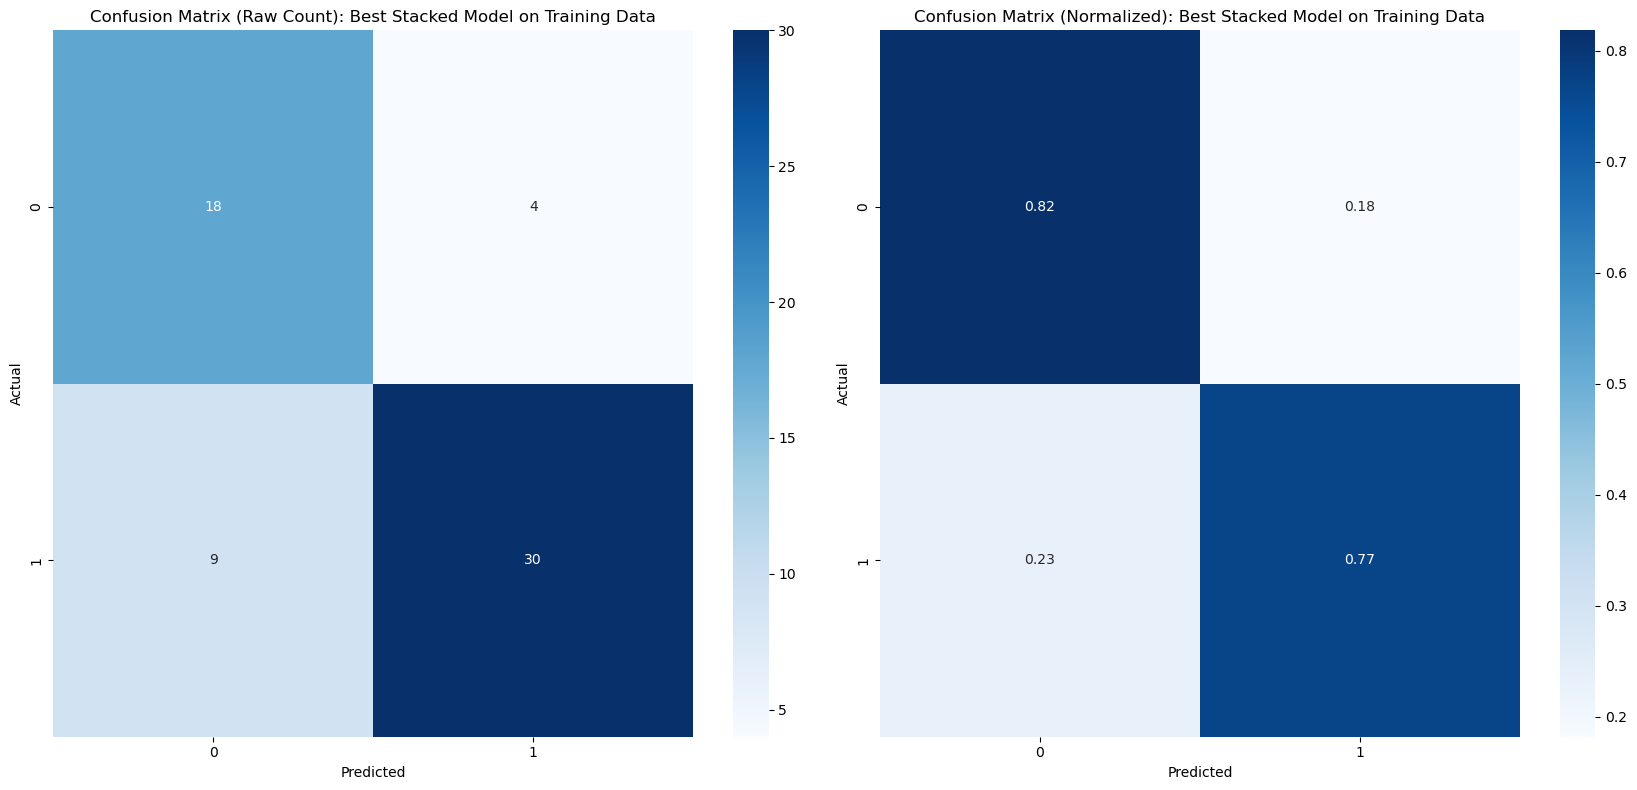

In [194]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the training data
##################################
cm_raw = confusion_matrix(y_train_cnn, stacked_unbalanced_class_best_model_downsampled.predict(X_train_cnn))
cm_normalized = confusion_matrix(y_train_cnn, stacked_unbalanced_class_best_model_downsampled.predict(X_train_cnn), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Raw Count): Best Stacked Model on Training Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (Normalized): Best Stacked Model on Training Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [195]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
##################################
print(f"F1 Score on Validation Data: {stacked_unbalanced_class_best_model_downsampled_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_validation, stacked_unbalanced_class_best_model_downsampled.predict(X_validation)))

F1 Score on Validation Data: 0.9524

Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.93      0.98      0.95        51

    accuracy                           0.91        58
   macro avg       0.84      0.70      0.75        58
weighted avg       0.90      0.91      0.90        58



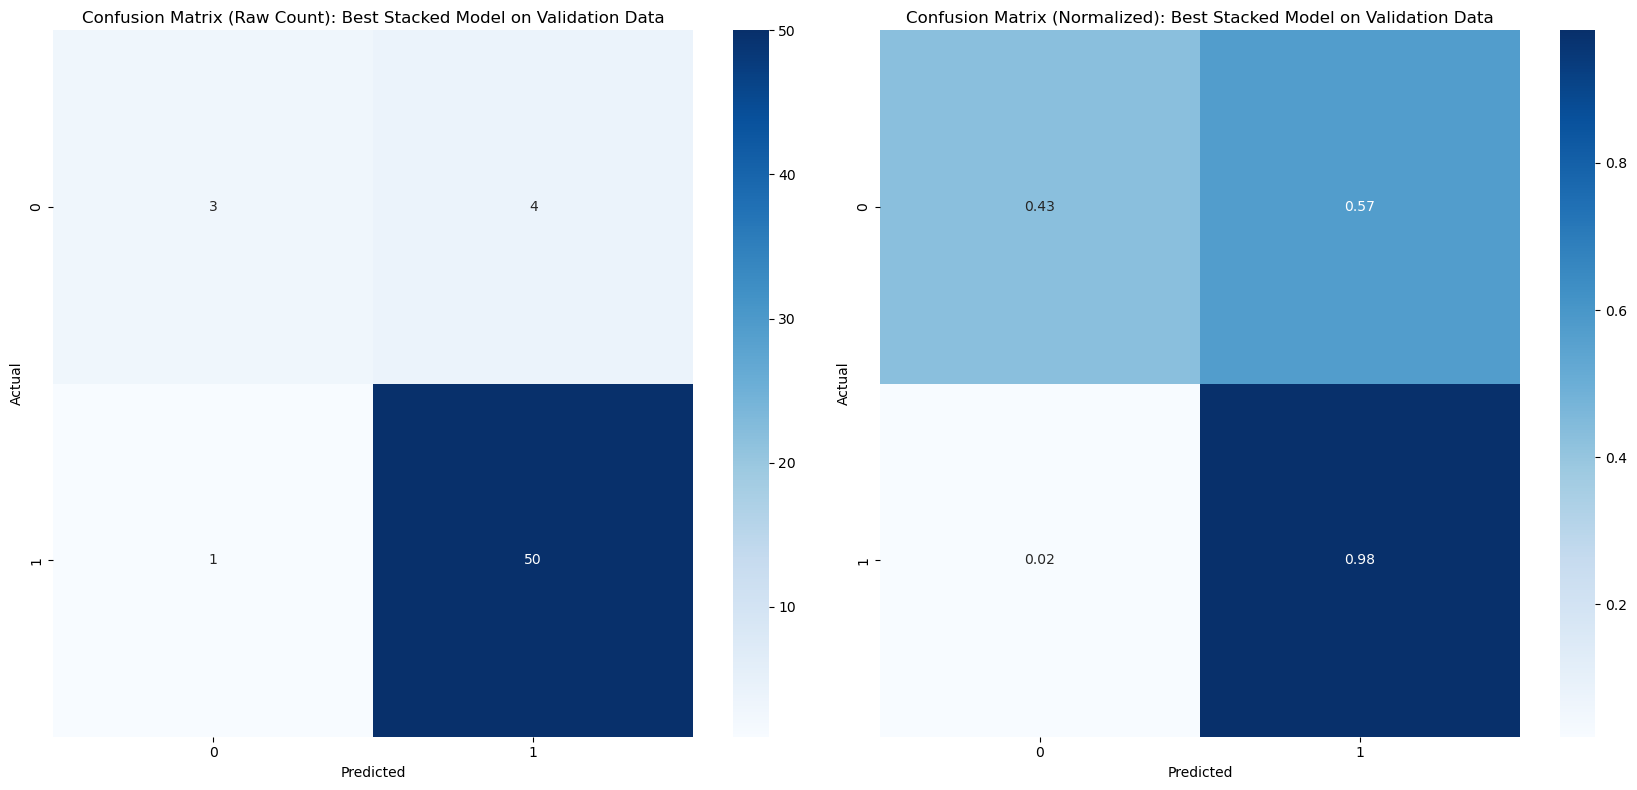

In [196]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_validation, stacked_unbalanced_class_best_model_downsampled.predict(X_validation))
cm_normalized = confusion_matrix(y_validation, stacked_unbalanced_class_best_model_downsampled.predict(X_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Raw Count): Best Stacked Model on Validation Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (Normalized): Best Stacked Model on Validation Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [197]:
##################################
# Obtaining the logit values (log-odds)
# from the decision function for training data
##################################
stacked_unbalanced_class_best_model_downsampled_logit_values = stacked_unbalanced_class_best_model_downsampled.decision_function(X_train_cnn)

In [198]:
##################################
# Obtaining the estimated probabilities 
# for the positive class (LUNG_CANCER=YES) for training data
##################################
stacked_unbalanced_class_best_model_downsampled_probabilities = stacked_unbalanced_class_best_model_downsampled.predict_proba(X_train_cnn)[:, 1]

In [199]:
##################################
# Sorting the values to generate
# a smoother curve
##################################
stacked_unbalanced_class_best_model_downsampled_sorted_indices = np.argsort(stacked_unbalanced_class_best_model_downsampled_logit_values)
stacked_unbalanced_class_best_model_downsampled_logit_values_sorted = stacked_unbalanced_class_best_model_downsampled_logit_values[stacked_unbalanced_class_best_model_downsampled_sorted_indices]
stacked_unbalanced_class_best_model_downsampled_probabilities_sorted = stacked_unbalanced_class_best_model_downsampled_probabilities[stacked_unbalanced_class_best_model_downsampled_sorted_indices]

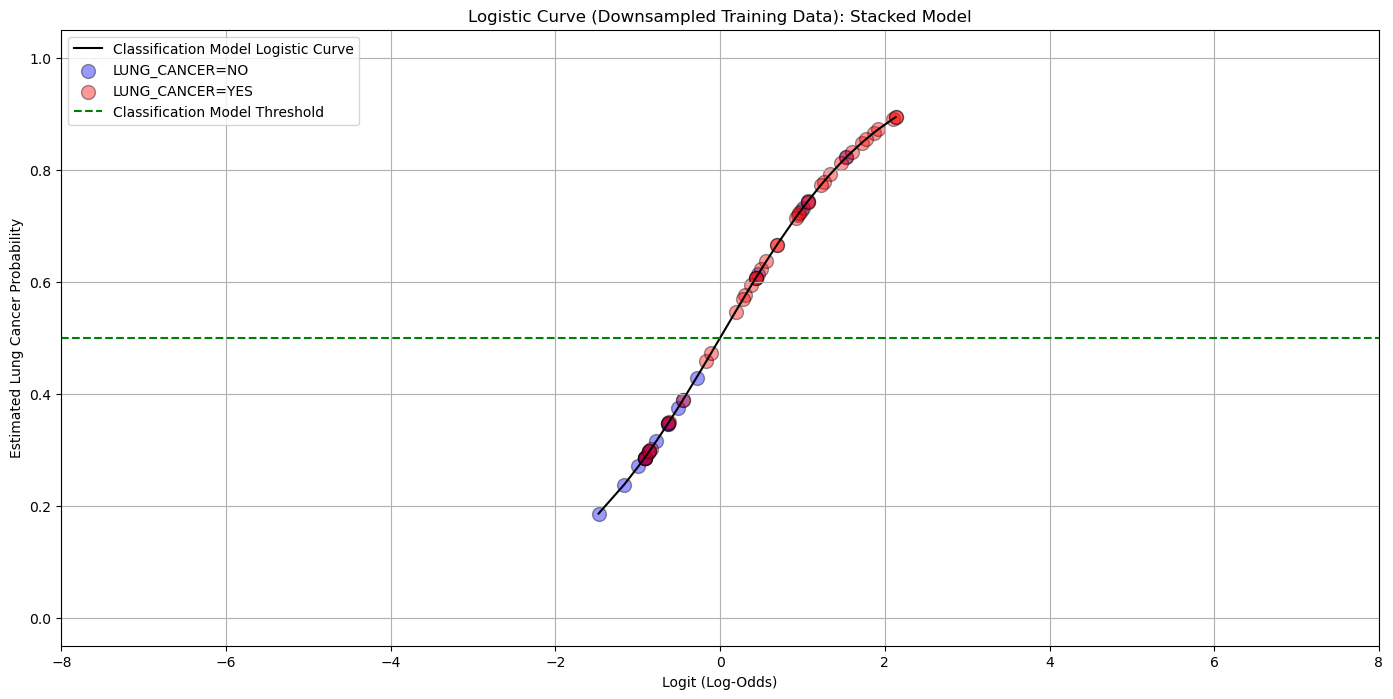

In [200]:
##################################
# Plotting the estimated logistic curve
# using the logit values
# and estimated probabilities
# obtained from the training data
##################################
plt.figure(figsize=(17, 8))
plt.plot(stacked_unbalanced_class_best_model_downsampled_logit_values_sorted, 
         stacked_unbalanced_class_best_model_downsampled_probabilities_sorted, label='Classification Model Logistic Curve', color='black')
plt.ylim(-0.05, 1.05)
plt.xlim(-8.00, 8.00)
target_0_indices = y_train_cnn == 0
target_1_indices = y_train_cnn == 1
plt.scatter(stacked_unbalanced_class_best_model_downsampled_logit_values[target_0_indices], 
            stacked_unbalanced_class_best_model_downsampled_probabilities[target_0_indices], 
            color='blue', alpha=0.40, s=100, marker= 'o', edgecolor='k', label='LUNG_CANCER=NO')
plt.scatter(stacked_unbalanced_class_best_model_downsampled_logit_values[target_1_indices], 
            stacked_unbalanced_class_best_model_downsampled_probabilities[target_1_indices], 
            color='red', alpha=0.40, s=100, marker='o', edgecolor='k', label='LUNG_CANCER=YES')
plt.axhline(0.5, color='green', linestyle='--', label='Classification Model Threshold')
plt.title('Logistic Curve (Downsampled Training Data): Stacked Model')
plt.xlabel('Logit (Log-Odds)')
plt.ylabel('Estimated Lung Cancer Probability')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

In [201]:
##################################
# Saving the best stacked model
# developed from the downsampled training data
################################## 
joblib.dump(stacked_unbalanced_class_best_model_downsampled, 
            os.path.join("..", MODELS_PATH, "stacked_unbalanced_class_best_model_downsampled.pkl"))

['..\\models\\stacked_unbalanced_class_best_model_downsampled.pkl']

### 1.6.7 Model Selection <a class="anchor" id="1.6.7"></a>

In [202]:
##################################
# Gathering the F1 scores from 
# training, cross-validation and validation
##################################
set_labels = ['Train','Cross-Validation','Validation']
f1_plot = pd.DataFrame({'INDIVIDUAL_ORIGINAL_TRAIN': list([individual_unbalanced_class_best_model_original_f1_train,
                                                           individual_unbalanced_class_best_model_original_f1_cv,
                                                           individual_unbalanced_class_best_model_original_f1_validation]),
                        'STACKED_ORIGINAL_TRAIN': list([stacked_unbalanced_class_best_model_original_f1_train,
                                                        stacked_unbalanced_class_best_model_original_f1_cv,
                                                        stacked_unbalanced_class_best_model_original_f1_validation]),
                        'INDIVIDUAL_UPSAMPLED_TRAIN': list([individual_balanced_class_best_model_upsampled_f1_train_smote,
                                                           individual_balanced_class_best_model_upsampled_f1_cv,
                                                           individual_balanced_class_best_model_upsampled_f1_validation]),
                        'STACKED_UPSAMPLED_TRAIN': list([stacked_balanced_class_best_model_upsampled_f1_train_smote,
                                                        stacked_balanced_class_best_model_upsampled_f1_cv,
                                                        stacked_balanced_class_best_model_upsampled_f1_validation]),
                        'INDIVIDUAL_DOWNSAMPLED_TRAIN': list([individual_unbalanced_class_best_model_downsampled_f1_train_cnn,
                                                              individual_unbalanced_class_best_model_downsampled_f1_cv,
                                                              individual_unbalanced_class_best_model_downsampled_f1_validation]),
                        'STACKED_DOWNSAMPLED_TRAIN': list([stacked_unbalanced_class_best_model_downsampled_f1_train_cnn,
                                                           stacked_unbalanced_class_best_model_downsampled_f1_cv,
                                                           stacked_unbalanced_class_best_model_downsampled_f1_validation])},
                       index = set_labels)
display(f1_plot)

,INDIVIDUAL_ORIGINAL_TRAIN,STACKED_ORIGINAL_TRAIN,INDIVIDUAL_UPSAMPLED_TRAIN,STACKED_UPSAMPLED_TRAIN,INDIVIDUAL_DOWNSAMPLED_TRAIN,STACKED_DOWNSAMPLED_TRAIN
Train,0.930556,0.940351,0.949495,0.957096,0.853333,0.821918
Cross-Validation,0.911574,0.912498,0.947396,0.958415,0.753711,0.753114
Validation,0.949495,0.914894,0.961538,0.970874,0.970874,0.952381


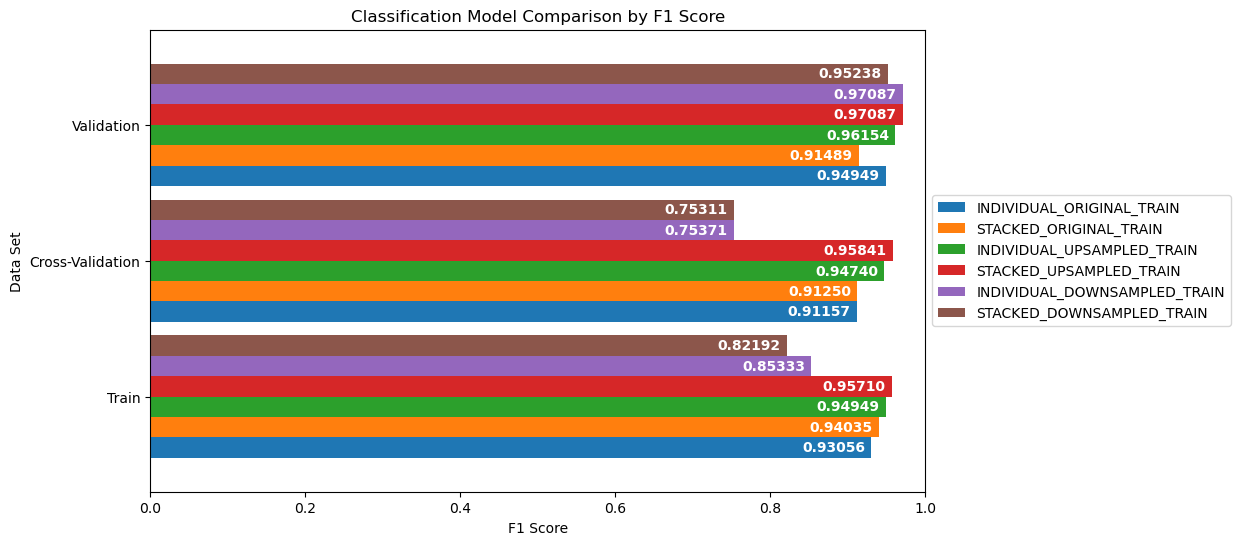

In [203]:
##################################
# Plotting all the F1 scores
# for all models
##################################
f1_plot = f1_plot.plot.barh(figsize=(10, 6), width=0.90)
f1_plot.set_xlim(0.00,1.00)
f1_plot.set_title("Classification Model Comparison by F1 Score")
f1_plot.set_xlabel("F1 Score")
f1_plot.set_ylabel("Data Set")
f1_plot.grid(False)
f1_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in f1_plot.containers:
    f1_plot.bar_label(container, fmt='%.5f', padding=-50, color='white', fontweight='bold')

### 1.6.8 Model Testing <a class="anchor" id="1.6.8"></a>

In [204]:
##################################
# Evaluating the F1 scores
# on the test data
##################################
individual_unbalanced_class_best_model_original_f1_test = f1_score(y_test, individual_unbalanced_class_best_model_original.predict(X_test))
stacked_unbalanced_class_best_model_original_f1_test = f1_score(y_test, stacked_unbalanced_class_best_model_original.predict(X_test))
individual_balanced_class_best_model_upsampled_f1_test = f1_score(y_test, individual_balanced_class_best_model_upsampled.predict(X_test))
stacked_balanced_class_best_model_upsampled_f1_test = f1_score(y_test, stacked_balanced_class_best_model_upsampled.predict(X_test))
individual_unbalanced_class_best_model_downsampled_f1_test = f1_score(y_test, individual_unbalanced_class_best_model_downsampled.predict(X_test))
stacked_unbalanced_class_best_model_downsampled_f1_test = f1_score(y_test, stacked_unbalanced_class_best_model_downsampled.predict(X_test))

In [205]:
##################################
# Adding the the F1 score estimated
# from the test data
##################################
set_labels = ['Train','Cross-Validation','Validation','Test']
updated_f1_plot = pd.DataFrame({'INDIVIDUAL_ORIGINAL_TRAIN': list([individual_unbalanced_class_best_model_original_f1_train,
                                                                   individual_unbalanced_class_best_model_original_f1_cv,
                                                                   individual_unbalanced_class_best_model_original_f1_validation,
                                                                   individual_unbalanced_class_best_model_original_f1_test]),
                                'STACKED_ORIGINAL_TRAIN': list([stacked_unbalanced_class_best_model_original_f1_train,
                                                                stacked_unbalanced_class_best_model_original_f1_cv,
                                                                stacked_unbalanced_class_best_model_original_f1_validation,
                                                               stacked_unbalanced_class_best_model_original_f1_test]),
                                'INDIVIDUAL_UPSAMPLED_TRAIN': list([individual_balanced_class_best_model_upsampled_f1_train_smote,
                                                                    individual_balanced_class_best_model_upsampled_f1_cv,
                                                                    individual_balanced_class_best_model_upsampled_f1_validation,
                                                                   individual_balanced_class_best_model_upsampled_f1_test]),
                                'STACKED_UPSAMPLED_TRAIN': list([stacked_balanced_class_best_model_upsampled_f1_train_smote,
                                                                 stacked_balanced_class_best_model_upsampled_f1_cv,
                                                                 stacked_balanced_class_best_model_upsampled_f1_validation,
                                                                stacked_balanced_class_best_model_upsampled_f1_test]),
                                'INDIVIDUAL_DOWNSAMPLED_TRAIN': list([individual_unbalanced_class_best_model_downsampled_f1_train_cnn,
                                                                      individual_unbalanced_class_best_model_downsampled_f1_cv,
                                                                      individual_unbalanced_class_best_model_downsampled_f1_validation,
                                                                      individual_unbalanced_class_best_model_downsampled_f1_test]),
                                'STACKED_DOWNSAMPLED_TRAIN': list([stacked_unbalanced_class_best_model_downsampled_f1_train_cnn,
                                                                   stacked_unbalanced_class_best_model_downsampled_f1_cv,
                                                                   stacked_unbalanced_class_best_model_downsampled_f1_validation,
                                                                  stacked_unbalanced_class_best_model_downsampled_f1_test])},
                               index = set_labels)
display(updated_f1_plot)

,INDIVIDUAL_ORIGINAL_TRAIN,STACKED_ORIGINAL_TRAIN,INDIVIDUAL_UPSAMPLED_TRAIN,STACKED_UPSAMPLED_TRAIN,INDIVIDUAL_DOWNSAMPLED_TRAIN,STACKED_DOWNSAMPLED_TRAIN
Train,0.930556,0.940351,0.949495,0.957096,0.853333,0.821918
Cross-Validation,0.911574,0.912498,0.947396,0.958415,0.753711,0.753114
Validation,0.949495,0.914894,0.961538,0.970874,0.970874,0.952381
Test,0.904762,0.878049,0.932331,0.935252,0.939394,0.916031


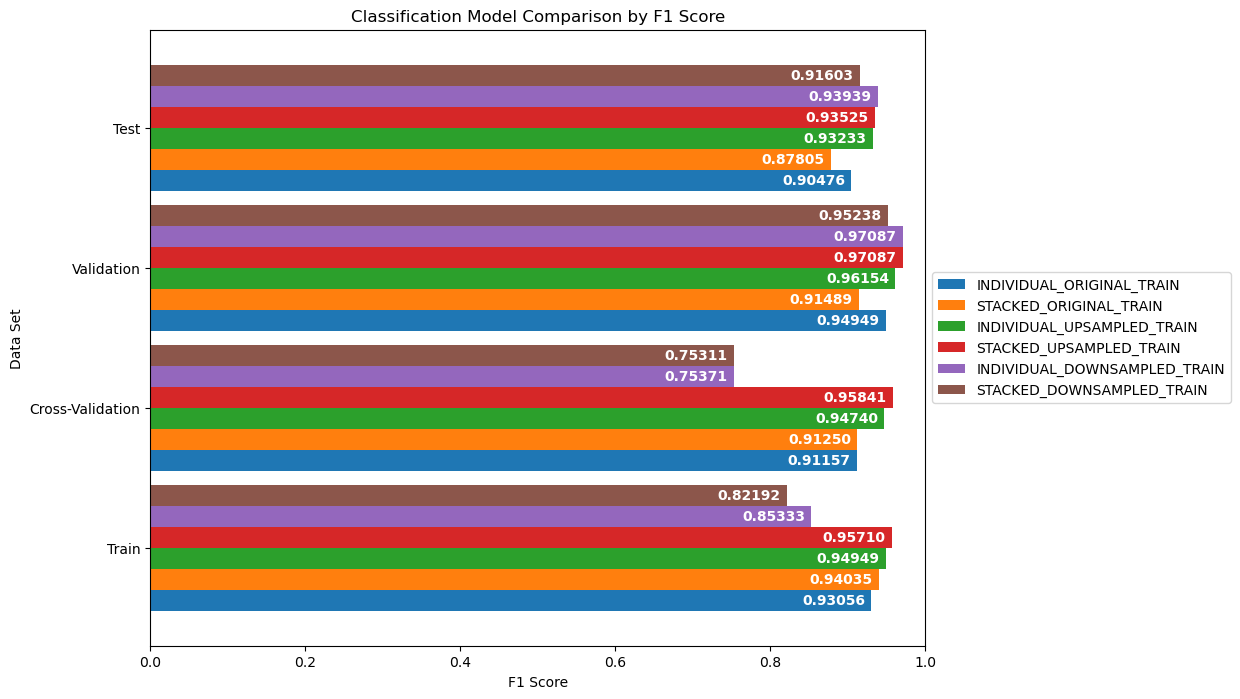

In [206]:
##################################
# Plotting all the F1 scores
# for all models
##################################
updated_f1_plot = updated_f1_plot.plot.barh(figsize=(10, 8), width=0.90)
updated_f1_plot.set_xlim(0.00,1.00)
updated_f1_plot.set_title("Classification Model Comparison by F1 Score")
updated_f1_plot.set_xlabel("F1 Score")
updated_f1_plot.set_ylabel("Data Set")
updated_f1_plot.grid(False)
updated_f1_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in updated_f1_plot.containers:
    updated_f1_plot.bar_label(container, fmt='%.5f', padding=-50, color='white', fontweight='bold')

### 1.6.9 Model Inference <a class="anchor" id="1.6.7"></a>

In [207]:
##################################
# Assigning as the final model
# the candidate model which 
# demonstrated the best performance
# on the test set
##################################
final_model = stacked_balanced_class_best_model_upsampled.named_steps['stacked_model']
final_model_base_learner = ['Stacked Model Base Learner: Decision Trees',
                            'Stacked Model Base Learner: Random Forest',
                            'Stacked Model Base Learner: Support Vector Machine']

In [208]:
##################################
# Defining a function to compute and plot 
# the feature importance for a defined model
##################################
def plot_feature_importance(importance, feature_names, model_name):
    indices = np.argsort(importance)
    plt.figure(figsize=(17, 8))
    plt.title(f"Feature Importance - {model_name}")
    plt.barh(range(len(importance)), importance[indices], align="center")
    plt.yticks(range(len(importance)), [feature_names[i] for i in indices])
    plt.tight_layout()
    plt.show()

In [209]:
##################################
# Defining the predictor names
##################################
feature_names = X_test.columns

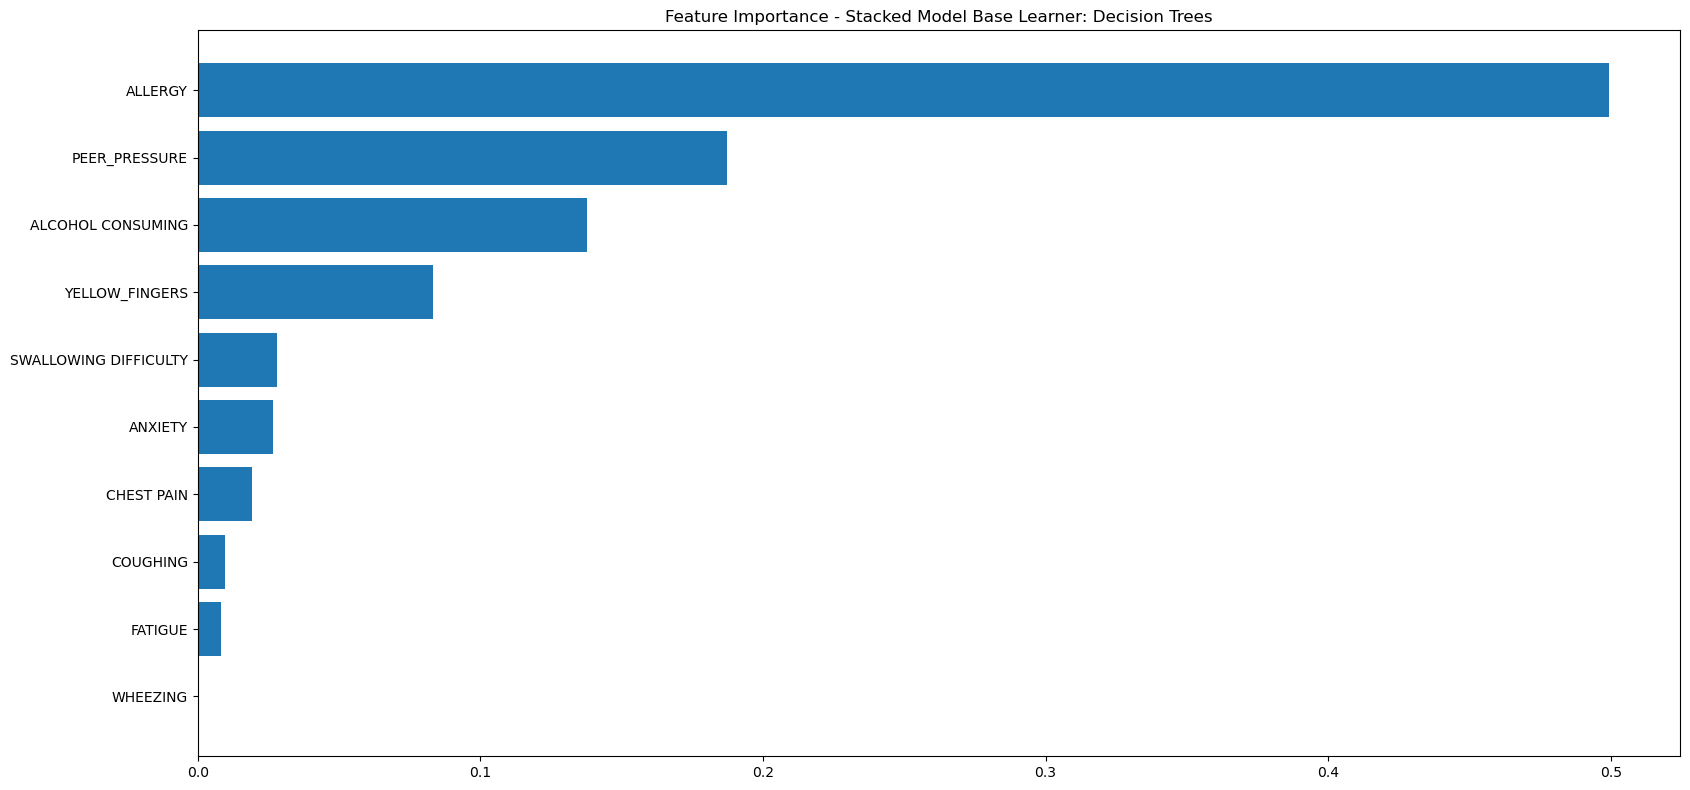

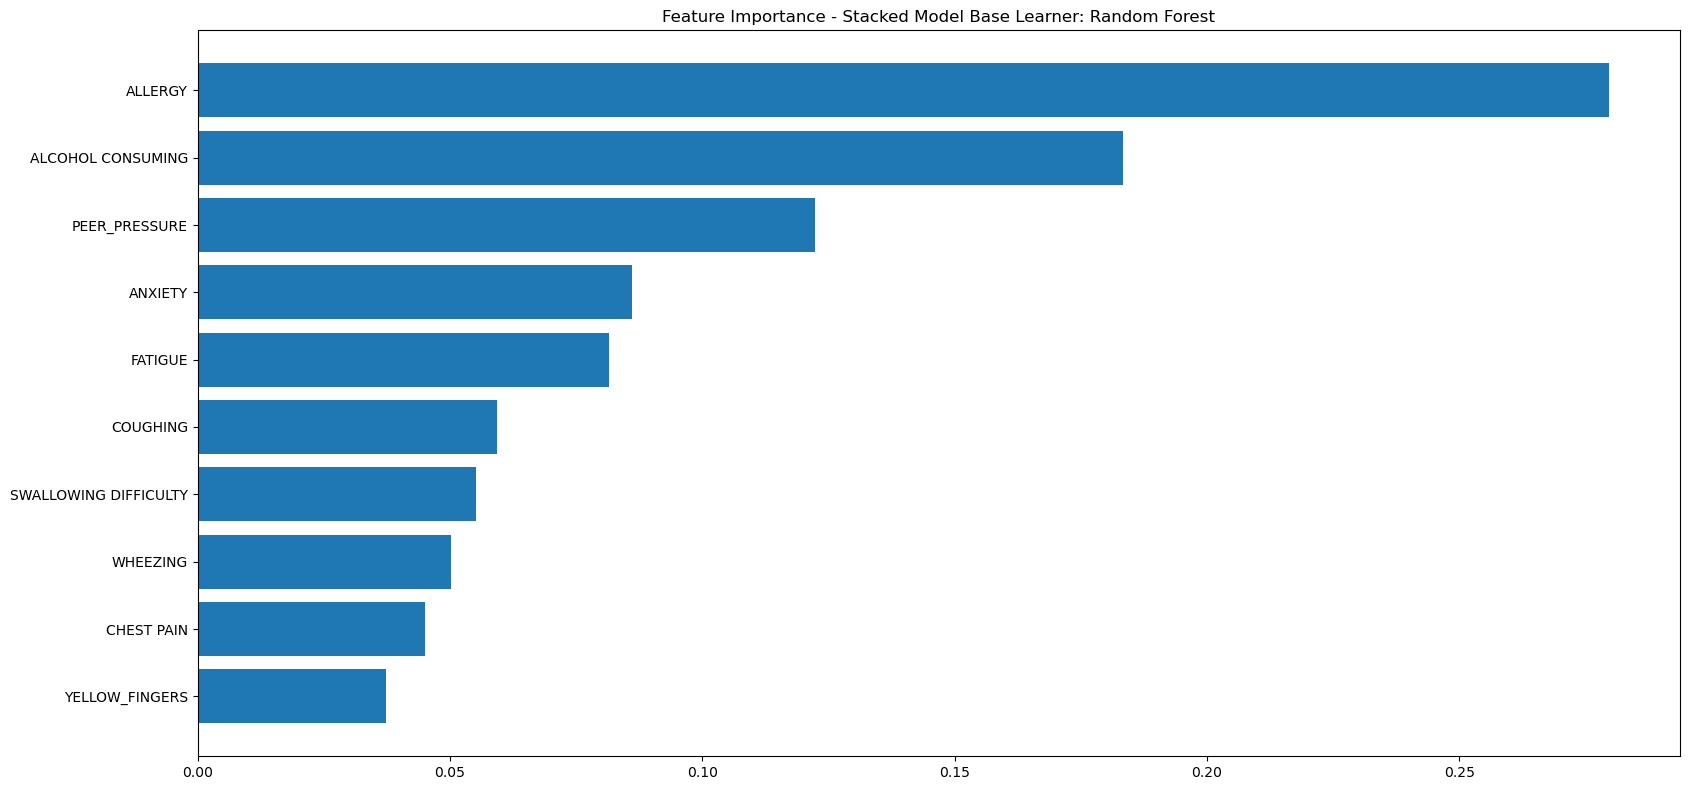

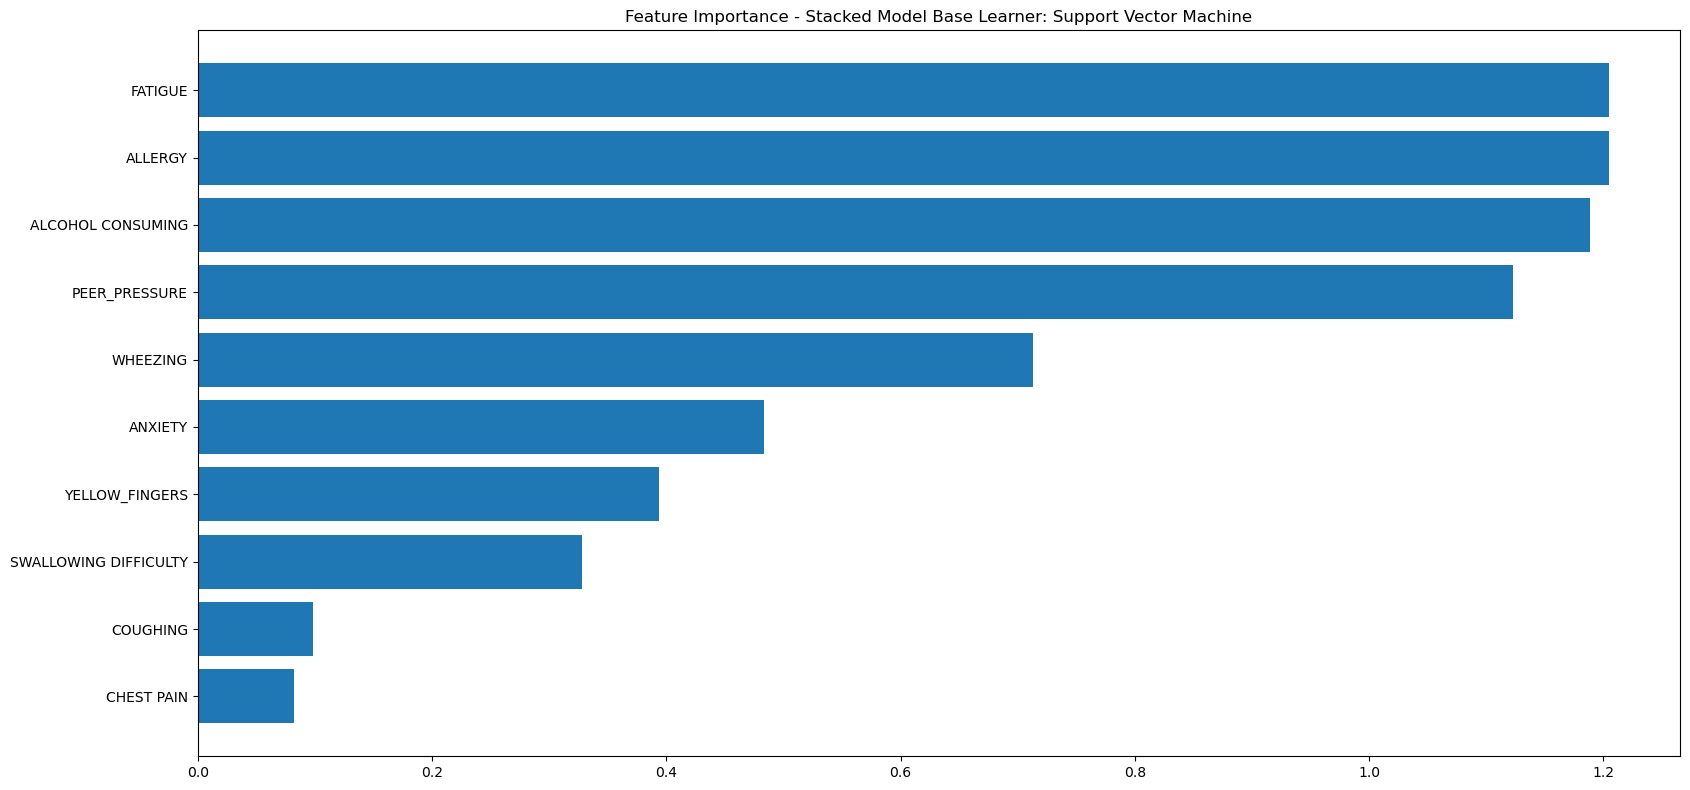

In [210]:
##################################
# Ranking the predictors based on model importance
# for each base learner using feature importance
# for tree-based models like DecisionTree and Random Forest
# and coefficients for linear models like SVC with linear kernel
##################################
for index, (name, model) in enumerate(final_model.named_estimators_.items()):
    if hasattr(model, 'feature_importances_'):  # For tree-based models like DecisionTree and RandomForest
        plot_feature_importance(model.feature_importances_, feature_names, model_name=final_model_base_learner[index])
    elif hasattr(model, 'coef_'):  # For linear models like SVC with linear kernel
        importance = np.abs(model.coef_).flatten()
        plot_feature_importance(importance, feature_names, model_name=final_model_base_learner[index])

In [211]:
##################################
# Generating predictions from the 
# base learners to be used as input
# to the logistic regression meta-learner
##################################
base_learners_predictions = []
for name, model in final_model.named_estimators_.items():
    base_learners_predictions.append(model.predict_proba(X_test)[:, 1])

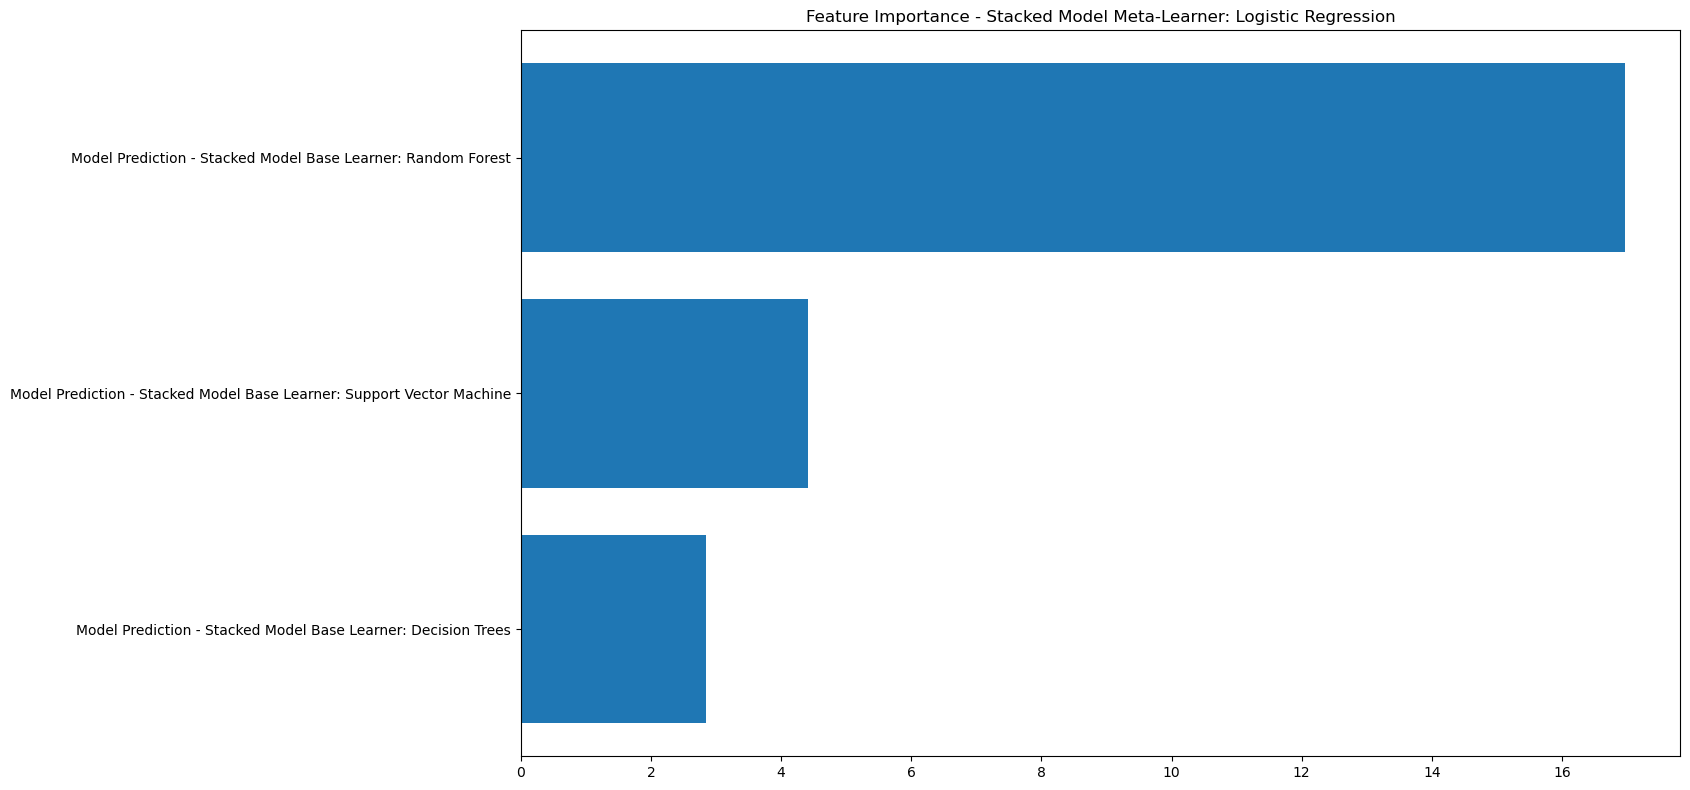

In [212]:
##################################
# Stacking the base learners' predictions
##################################
meta_input = np.column_stack(base_learners_predictions)

##################################
# Defining the base learner model names
##################################
meta_feature_names = [f'Model Prediction - {x}' for x in final_model_base_learner]

##################################
# Ranking the predictors based on model importance
# for each meta-learner using coefficients
# for linear models like logistic regression
##################################
if hasattr(final_model.final_estimator_, 'coef_'):
    importance = np.abs(final_model.final_estimator_.coef_).flatten()
    plot_feature_importance(importance, meta_feature_names, model_name='Stacked Model Meta-Learner: Logistic Regression')

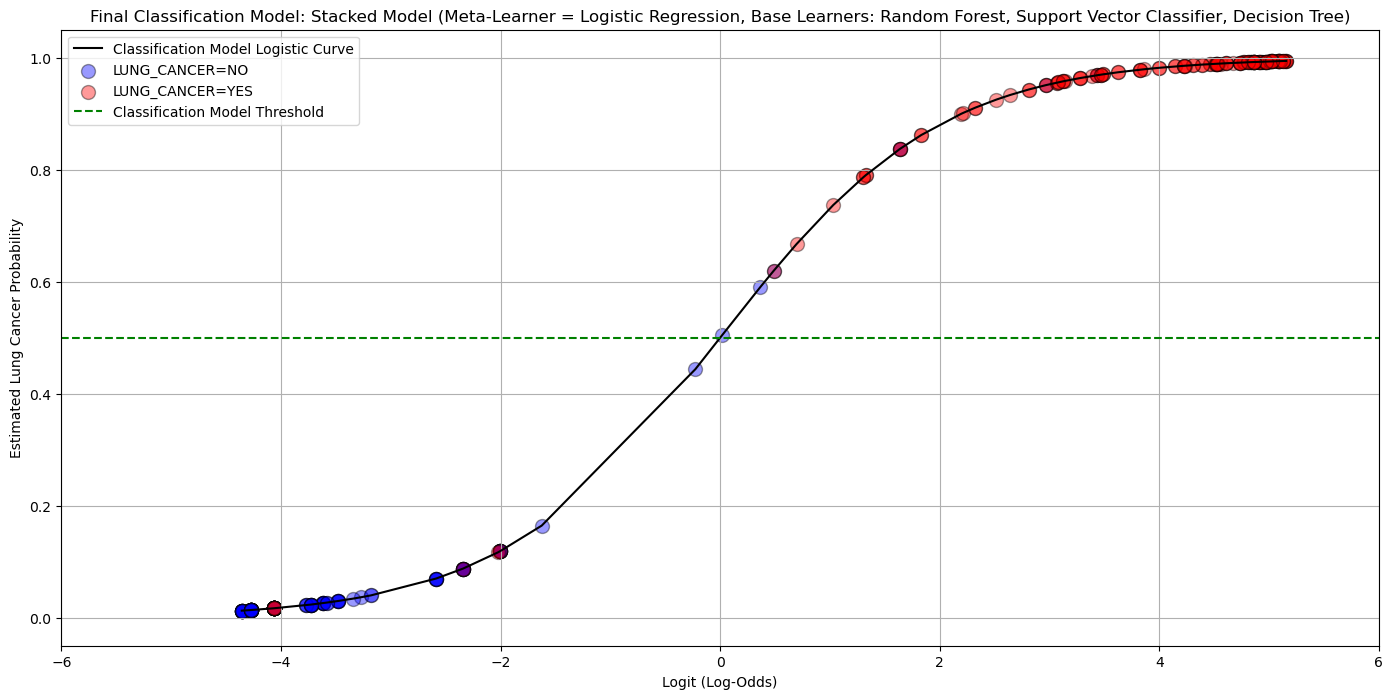

In [213]:
##################################
# Plotting the estimated logistic curve
# of the final classification model
# involving a stacked model with
# a logistic regression meta-learner
# and random forest, SVC and decision tree
# base learners
##################################
plt.figure(figsize=(17, 8))
plt.plot(stacked_balanced_class_best_model_upsampled_logit_values_sorted, 
         stacked_balanced_class_best_model_upsampled_probabilities_sorted, label='Classification Model Logistic Curve', color='black')
plt.ylim(-0.05, 1.05)
plt.xlim(-6.00, 6.00)
target_0_indices = y_train_smote == 0
target_1_indices = y_train_smote == 1
plt.scatter(stacked_balanced_class_best_model_upsampled_logit_values[target_0_indices], 
            stacked_balanced_class_best_model_upsampled_probabilities[target_0_indices], 
            color='blue', alpha=0.40, s=100, marker= 'o', edgecolor='k', label='LUNG_CANCER=NO')
plt.scatter(stacked_balanced_class_best_model_upsampled_logit_values[target_1_indices], 
            stacked_balanced_class_best_model_upsampled_probabilities[target_1_indices], 
            color='red', alpha=0.40, s=100, marker='o', edgecolor='k', label='LUNG_CANCER=YES')
plt.axhline(0.5, color='green', linestyle='--', label='Classification Model Threshold')
plt.title('Final Classification Model: Stacked Model (Meta-Learner = Logistic Regression, Base Learners: Random Forest, Support Vector Classifier, Decision Tree)')
plt.xlabel('Logit (Log-Odds)')
plt.ylabel('Estimated Lung Cancer Probability')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

In [214]:
##################################
# Rebuilding the upsampled training data
# for plotting categorical distributions
##################################
lung_cancer_train_smote = pd.concat([X_train_smote, y_train_smote], axis=1)
lung_cancer_train_smote.iloc[:,0:10] = lung_cancer_train_smote.iloc[:,0:10].replace({0: 'Absent', 1: 'Present'})
lung_cancer_train_smote['LUNG_CANCER'] = lung_cancer_train_smote['LUNG_CANCER'].replace({0: 'No', 1: 'Yes'})
lung_cancer_train_smote[lung_cancer_train_smote.columns[0:11]] = lung_cancer_train_smote[lung_cancer_train_smote.columns[0:11]].astype('category')
lung_cancer_train_smote.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Absent,Absent,Present,Present,Present,Present,Present,Absent,Present,Absent,Yes
1,Present,Present,Absent,Absent,Present,Present,Present,Present,Present,Present,Yes
2,Present,Present,Present,Present,Absent,Present,Absent,Present,Present,Absent,Yes
3,Absent,Absent,Absent,Present,Present,Present,Present,Absent,Present,Present,Yes
4,Present,Present,Present,Present,Absent,Absent,Absent,Absent,Present,Absent,Yes


In [215]:
##################################
# Describing the details of a 
# low-risk test case
##################################
X_sample = {"YELLOW_FINGERS":1,
            "ANXIETY":0,
            "PEER_PRESSURE":0,
            "FATIGUE":0,
            "ALLERGY":0,
            "WHEEZING":1,
            "ALCOHOL CONSUMING":0,
            "COUGHING":0,
            "SWALLOWING DIFFICULTY":1,
            "CHEST PAIN":1}
X_test_sample = pd.DataFrame([X_sample])
X_test_sample.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,0,0,0,0,1,0,0,1,1


In [216]:
##################################
# Rebuilding the low-risk test case data
# for plotting categorical distributions
##################################
X_test_sample_category = X_test_sample.copy()
X_test_sample_category.iloc[:,0:10] = X_test_sample_category.iloc[:,0:10].replace({0: 'Absent', 1: 'Present'})
X_test_sample_category[X_test_sample_category.columns[0:11]] = X_test_sample_category[X_test_sample_category.columns[0:11]].astype('category')
X_test_sample_category.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN
0,Present,Absent,Absent,Absent,Absent,Present,Absent,Absent,Present,Present


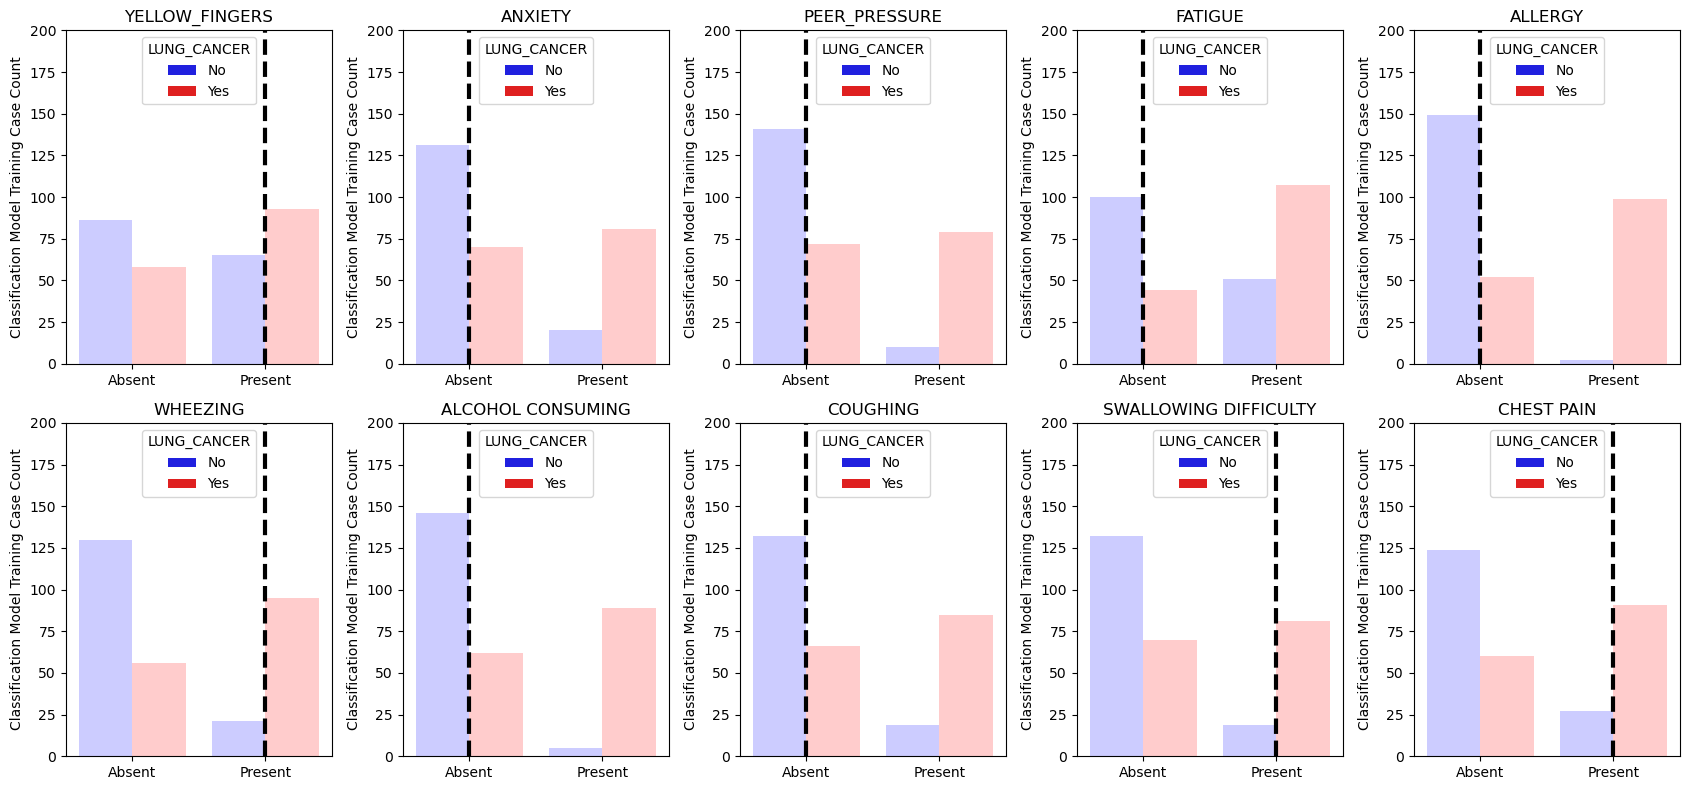

In [217]:
##################################
# Plotting the categorical distributions
# for a low-risk test case
##################################
fig, axs = plt.subplots(2, 5, figsize=(17, 8))

colors = ['blue','red']
level_order = ['Absent','Present']

sns.countplot(x='YELLOW_FINGERS', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[0, 0], order=level_order, palette=colors)
axs[0, 0].axvline(level_order.index(X_test_sample_category['YELLOW_FINGERS'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[0, 0].set_title('YELLOW_FINGERS')
axs[0, 0].set_ylabel('Classification Model Training Case Count')
axs[0, 0].set_xlabel(None)
axs[0, 0].set_ylim(0, 200)
axs[0, 0].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[0, 0].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='ANXIETY', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[0, 1], order=level_order, palette=colors)
axs[0, 1].axvline(level_order.index(X_test_sample_category['ANXIETY'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[0, 1].set_title('ANXIETY')
axs[0, 1].set_ylabel('Classification Model Training Case Count')
axs[0, 1].set_xlabel(None)
axs[0, 1].set_ylim(0, 200)
axs[0, 1].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[0, 1].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='PEER_PRESSURE', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[0, 2], order=level_order, palette=colors)
axs[0, 2].axvline(level_order.index(X_test_sample_category['PEER_PRESSURE'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[0, 2].set_title('PEER_PRESSURE')
axs[0, 2].set_ylabel('Classification Model Training Case Count')
axs[0, 2].set_xlabel(None)
axs[0, 2].set_ylim(0, 200)
axs[0, 2].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[0, 2].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='FATIGUE', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[0, 3], order=level_order, palette=colors)
axs[0, 3].axvline(level_order.index(X_test_sample_category['FATIGUE'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[0, 3].set_title('FATIGUE')
axs[0, 3].set_ylabel('Classification Model Training Case Count')
axs[0, 3].set_xlabel(None)
axs[0, 3].set_ylim(0, 200)
axs[0, 3].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[0, 3].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='ALLERGY', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[0, 4], order=level_order, palette=colors)
axs[0, 4].axvline(level_order.index(X_test_sample_category['ALLERGY'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[0, 4].set_title('ALLERGY')
axs[0, 4].set_ylabel('Classification Model Training Case Count')
axs[0, 4].set_xlabel(None)
axs[0, 4].set_ylim(0, 200)
axs[0, 4].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[0, 4].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='WHEEZING', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[1, 0], order=level_order, palette=colors)
axs[1, 0].axvline(level_order.index(X_test_sample_category['WHEEZING'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[1, 0].set_title('WHEEZING')
axs[1, 0].set_ylabel('Classification Model Training Case Count')
axs[1, 0].set_xlabel(None)
axs[1, 0].set_ylim(0, 200)
axs[1, 0].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[1, 0].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='ALCOHOL CONSUMING', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[1, 1], order=level_order, palette=colors)
axs[1, 1].axvline(level_order.index(X_test_sample_category['ALCOHOL CONSUMING'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[1, 1].set_title('ALCOHOL CONSUMING')
axs[1, 1].set_ylabel('Classification Model Training Case Count')
axs[1, 1].set_xlabel(None)
axs[1, 1].set_ylim(0, 200)
axs[1, 1].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[1, 1].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='COUGHING', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[1, 2], order=level_order, palette=colors)
axs[1, 2].axvline(level_order.index(X_test_sample_category['COUGHING'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[1, 2].set_title('COUGHING')
axs[1, 2].set_ylabel('Classification Model Training Case Count')
axs[1, 2].set_xlabel(None)
axs[1, 2].set_ylim(0, 200)
axs[1, 2].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[1, 2].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='SWALLOWING DIFFICULTY', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[1, 3], order=level_order, palette=colors)
axs[1, 3].axvline(level_order.index(X_test_sample_category['SWALLOWING DIFFICULTY'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[1, 3].set_title('SWALLOWING DIFFICULTY')
axs[1, 3].set_ylabel('Classification Model Training Case Count')
axs[1, 3].set_xlabel(None)
axs[1, 3].set_ylim(0, 200)
axs[1, 3].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[1, 3].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='CHEST PAIN', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[1, 4], order=level_order, palette=colors)
axs[1, 4].axvline(level_order.index(X_test_sample_category['CHEST PAIN'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[1, 4].set_title('CHEST PAIN')
axs[1, 4].set_ylabel('Classification Model Training Case Count')
axs[1, 4].set_xlabel(None)
axs[1, 4].set_ylim(0, 200)
axs[1, 4].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[1, 4].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

plt.tight_layout()
plt.show()

In [218]:
##################################
# Computing the logit and estimated probability
# for the test case
##################################
X_sample_logit = stacked_balanced_class_best_model_upsampled.decision_function(X_test_sample)[0]
X_sample_probability = stacked_balanced_class_best_model_upsampled.predict_proba(X_test_sample)[0, 1]
X_sample_class = "Low-Risk" if X_sample_probability < 0.50 else "High-Risk"
print(f"Test Case Logit Value: {X_sample_logit}")
print(f"Test Case Probability: {X_sample_probability}")
print(f"Test Case Class: {X_sample_class}")

Test Case Logit Value: -0.3863877455601523
Test Case Probability: 0.4045871790163868
Test Case Class: Low-Risk


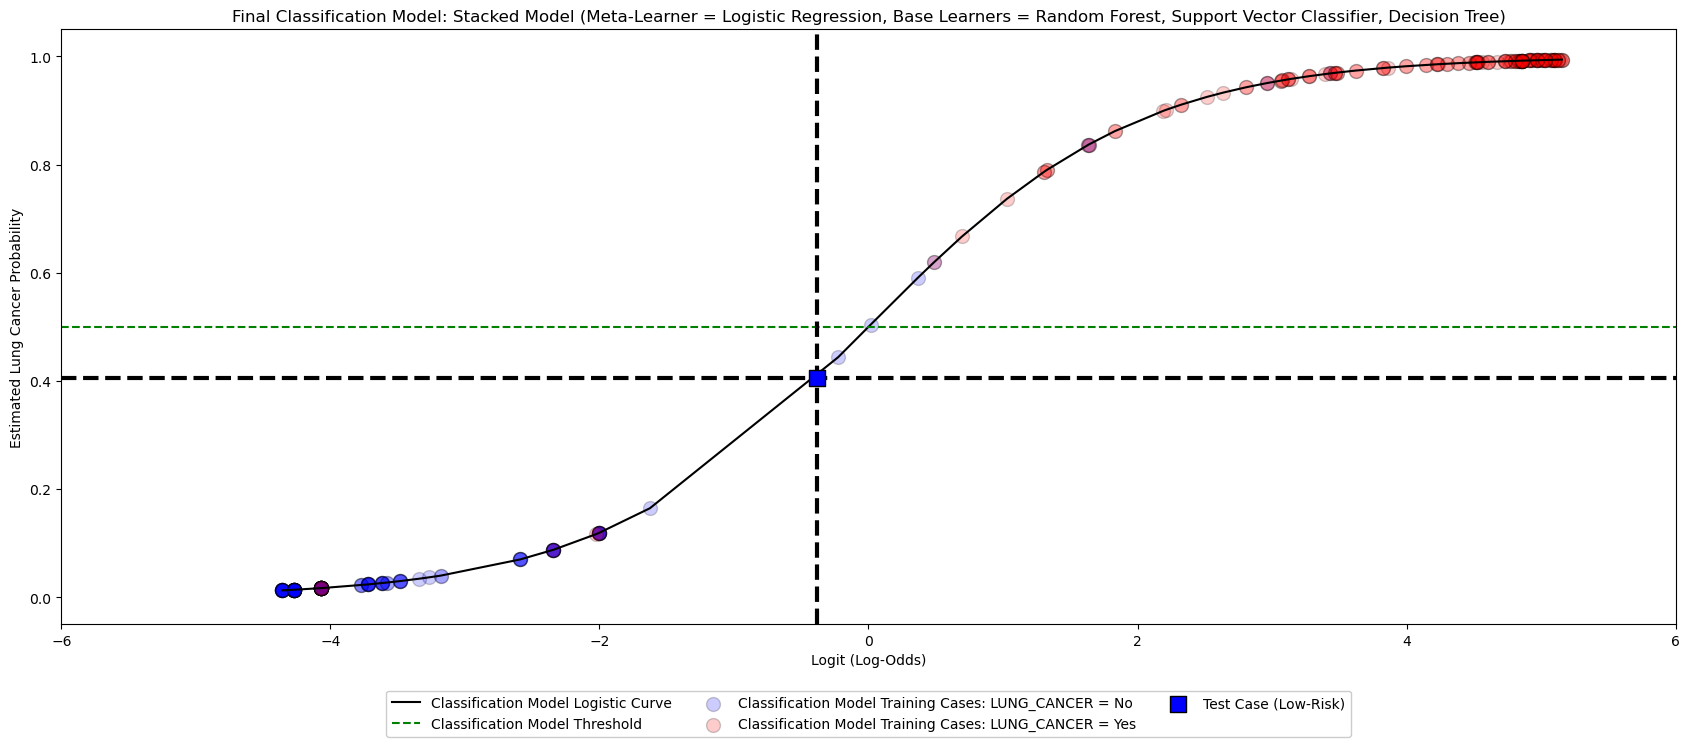

In [219]:
##################################
# Plotting the logit and estimated probability
# for the low-risk test case 
# in the estimated logistic curve
# of the final classification model
##################################
plt.figure(figsize=(17, 8))
plt.plot(stacked_balanced_class_best_model_upsampled_logit_values_sorted, 
         stacked_balanced_class_best_model_upsampled_probabilities_sorted, label='Classification Model Logistic Curve', color='black')
plt.ylim(-0.05, 1.05)
plt.xlim(-6.00, 6.00)
target_0_indices = y_train_smote == 0
target_1_indices = y_train_smote == 1
plt.axhline(0.5, color='green', linestyle='--', label='Classification Model Threshold')
plt.scatter(stacked_balanced_class_best_model_upsampled_logit_values[target_0_indices], 
            stacked_balanced_class_best_model_upsampled_probabilities[target_0_indices], 
            color='blue', alpha=0.20, s=100, marker= 'o', edgecolor='k', label='Classification Model Training Cases: LUNG_CANCER = No')
plt.scatter(stacked_balanced_class_best_model_upsampled_logit_values[target_1_indices], 
            stacked_balanced_class_best_model_upsampled_probabilities[target_1_indices], 
            color='red', alpha=0.20, s=100, marker='o', edgecolor='k', label='Classification Model Training Cases: LUNG_CANCER = Yes')
if X_sample_class == "Low-Risk":
    plt.scatter(X_sample_logit, X_sample_probability, color='blue', s=125, edgecolor='k', label='Test Case (Low-Risk)', marker= 's', zorder=5)
    plt.axvline(X_sample_logit, color='black', linestyle='--', linewidth=3)
    plt.axhline(X_sample_probability, color='black', linestyle='--', linewidth=3)
if X_sample_class == "High-Risk":
    plt.scatter(X_sample_logit, X_sample_probability, color='red', s=125, edgecolor='k', label='Test Case (High-Risk)', marker= 's', zorder=5)
    plt.axvline(X_sample_logit, color='black', linestyle='--', linewidth=3)
    plt.axhline(X_sample_probability, color='black', linestyle='--', linewidth=3)
plt.title('Final Classification Model: Stacked Model (Meta-Learner = Logistic Regression, Base Learners = Random Forest, Support Vector Classifier, Decision Tree)')
plt.xlabel('Logit (Log-Odds)')
plt.ylabel('Estimated Lung Cancer Probability')
plt.grid(False)
plt.legend(facecolor='white', framealpha=1, loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=3)
plt.tight_layout(rect=[0, 0, 1.00, 0.95])
plt.show()

In [220]:
##################################
# Describing the details of a 
# high-risk test case
##################################
X_sample = {"YELLOW_FINGERS":1,
            "ANXIETY":0,
            "PEER_PRESSURE":1,
            "FATIGUE":0,
            "ALLERGY":1,
            "WHEEZING":1,
            "ALCOHOL CONSUMING":0,
            "COUGHING":1,
            "SWALLOWING DIFFICULTY":1,
            "CHEST PAIN":1}
X_test_sample = pd.DataFrame([X_sample])
X_test_sample.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,0,1,0,1,1,0,1,1,1


In [221]:
##################################
# Rebuilding the high-risk test case data
# for plotting categorical distributions
##################################
X_test_sample_category = X_test_sample.copy()
X_test_sample_category.iloc[:,0:10] = X_test_sample_category.iloc[:,0:10].replace({0: 'Absent', 1: 'Present'})
X_test_sample_category[X_test_sample_category.columns[0:11]] = X_test_sample_category[X_test_sample_category.columns[0:11]].astype('category')
X_test_sample_category.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN
0,Present,Absent,Present,Absent,Present,Present,Absent,Present,Present,Present


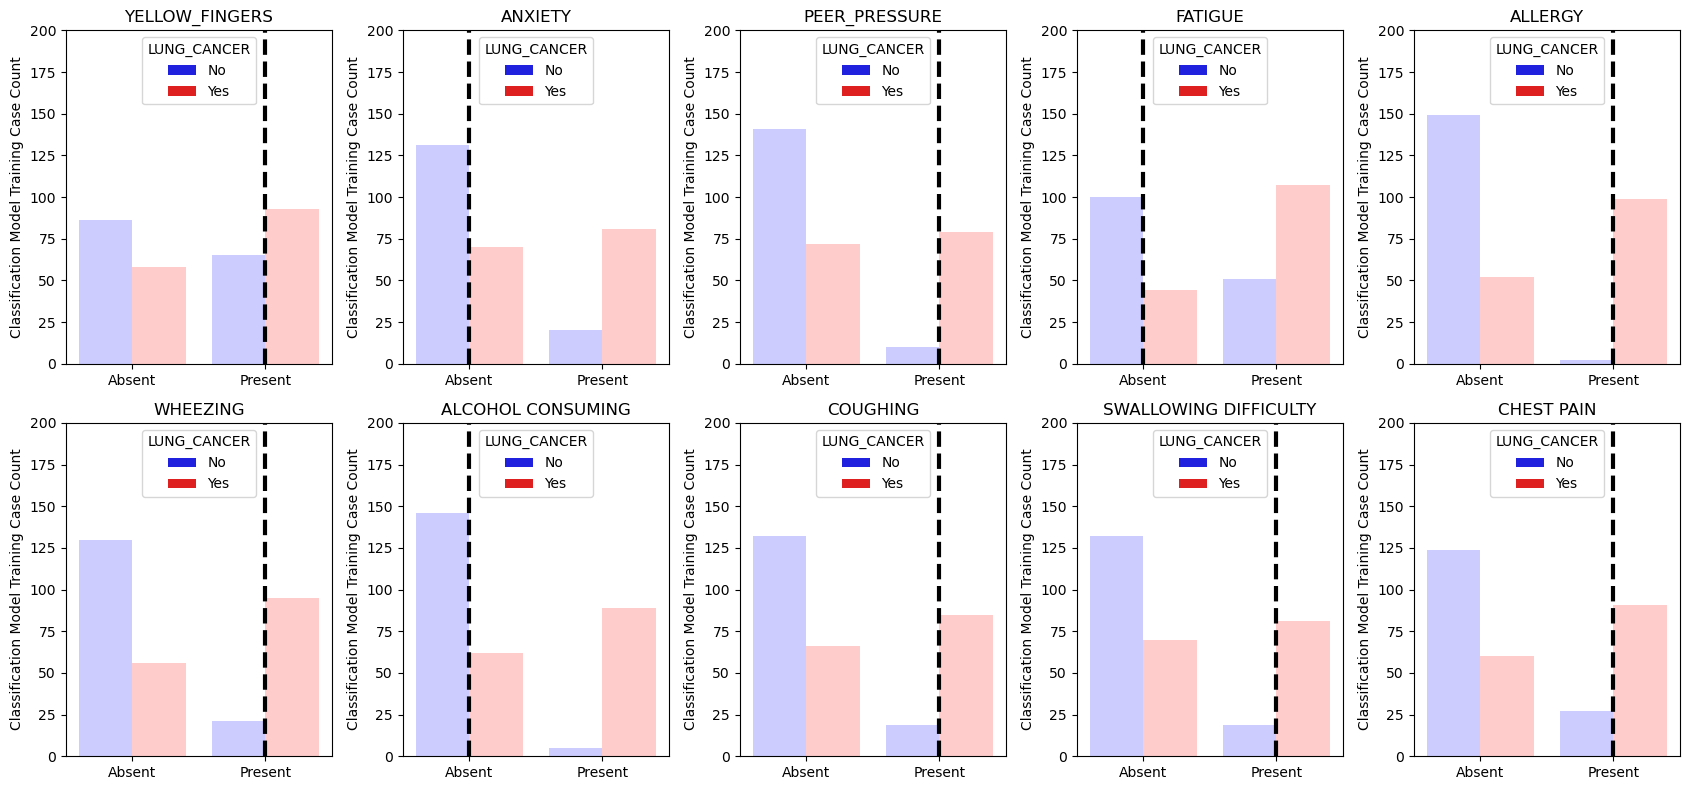

In [222]:
##################################
# Plotting the categorical distributions
# for a low-risk test case
##################################
fig, axs = plt.subplots(2, 5, figsize=(17, 8))

colors = ['blue','red']
level_order = ['Absent','Present']

sns.countplot(x='YELLOW_FINGERS', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[0, 0], order=level_order, palette=colors)
axs[0, 0].axvline(level_order.index(X_test_sample_category['YELLOW_FINGERS'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[0, 0].set_title('YELLOW_FINGERS')
axs[0, 0].set_ylabel('Classification Model Training Case Count')
axs[0, 0].set_xlabel(None)
axs[0, 0].set_ylim(0, 200)
axs[0, 0].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[0, 0].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='ANXIETY', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[0, 1], order=level_order, palette=colors)
axs[0, 1].axvline(level_order.index(X_test_sample_category['ANXIETY'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[0, 1].set_title('ANXIETY')
axs[0, 1].set_ylabel('Classification Model Training Case Count')
axs[0, 1].set_xlabel(None)
axs[0, 1].set_ylim(0, 200)
axs[0, 1].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[0, 1].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='PEER_PRESSURE', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[0, 2], order=level_order, palette=colors)
axs[0, 2].axvline(level_order.index(X_test_sample_category['PEER_PRESSURE'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[0, 2].set_title('PEER_PRESSURE')
axs[0, 2].set_ylabel('Classification Model Training Case Count')
axs[0, 2].set_xlabel(None)
axs[0, 2].set_ylim(0, 200)
axs[0, 2].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[0, 2].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='FATIGUE', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[0, 3], order=level_order, palette=colors)
axs[0, 3].axvline(level_order.index(X_test_sample_category['FATIGUE'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[0, 3].set_title('FATIGUE')
axs[0, 3].set_ylabel('Classification Model Training Case Count')
axs[0, 3].set_xlabel(None)
axs[0, 3].set_ylim(0, 200)
axs[0, 3].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[0, 3].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='ALLERGY', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[0, 4], order=level_order, palette=colors)
axs[0, 4].axvline(level_order.index(X_test_sample_category['ALLERGY'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[0, 4].set_title('ALLERGY')
axs[0, 4].set_ylabel('Classification Model Training Case Count')
axs[0, 4].set_xlabel(None)
axs[0, 4].set_ylim(0, 200)
axs[0, 4].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[0, 4].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='WHEEZING', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[1, 0], order=level_order, palette=colors)
axs[1, 0].axvline(level_order.index(X_test_sample_category['WHEEZING'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[1, 0].set_title('WHEEZING')
axs[1, 0].set_ylabel('Classification Model Training Case Count')
axs[1, 0].set_xlabel(None)
axs[1, 0].set_ylim(0, 200)
axs[1, 0].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[1, 0].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='ALCOHOL CONSUMING', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[1, 1], order=level_order, palette=colors)
axs[1, 1].axvline(level_order.index(X_test_sample_category['ALCOHOL CONSUMING'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[1, 1].set_title('ALCOHOL CONSUMING')
axs[1, 1].set_ylabel('Classification Model Training Case Count')
axs[1, 1].set_xlabel(None)
axs[1, 1].set_ylim(0, 200)
axs[1, 1].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[1, 1].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='COUGHING', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[1, 2], order=level_order, palette=colors)
axs[1, 2].axvline(level_order.index(X_test_sample_category['COUGHING'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[1, 2].set_title('COUGHING')
axs[1, 2].set_ylabel('Classification Model Training Case Count')
axs[1, 2].set_xlabel(None)
axs[1, 2].set_ylim(0, 200)
axs[1, 2].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[1, 2].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='SWALLOWING DIFFICULTY', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[1, 3], order=level_order, palette=colors)
axs[1, 3].axvline(level_order.index(X_test_sample_category['SWALLOWING DIFFICULTY'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[1, 3].set_title('SWALLOWING DIFFICULTY')
axs[1, 3].set_ylabel('Classification Model Training Case Count')
axs[1, 3].set_xlabel(None)
axs[1, 3].set_ylim(0, 200)
axs[1, 3].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[1, 3].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

sns.countplot(x='CHEST PAIN', hue='LUNG_CANCER', data=lung_cancer_train_smote, ax=axs[1, 4], order=level_order, palette=colors)
axs[1, 4].axvline(level_order.index(X_test_sample_category['CHEST PAIN'].iloc[0]), color='black', linestyle='--', linewidth=3)
axs[1, 4].set_title('CHEST PAIN')
axs[1, 4].set_ylabel('Classification Model Training Case Count')
axs[1, 4].set_xlabel(None)
axs[1, 4].set_ylim(0, 200)
axs[1, 4].legend(title='LUNG_CANCER', loc='upper center')
for patch, color in zip(axs[1, 4].patches, ['blue','blue','red','red'] ):
    patch.set_facecolor(color)
    patch.set_alpha(0.2)

plt.tight_layout()
plt.show()

In [223]:
##################################
# Computing the logit and estimated probability
# for a high-risk test case
##################################
X_sample_logit = stacked_balanced_class_best_model_upsampled.decision_function(X_test_sample)[0]
X_sample_probability = stacked_balanced_class_best_model_upsampled.predict_proba(X_test_sample)[0, 1]
X_sample_class = "Low-Risk" if X_sample_probability < 0.50 else "High-Risk"
print(f"Test Case Logit Value: {X_sample_logit}")
print(f"Test Case Probability: {X_sample_probability}")
print(f"Test Case Class: {X_sample_class}")

Test Case Logit Value: 2.6153097148460773
Test Case Probability: 0.931840411014508
Test Case Class: High-Risk


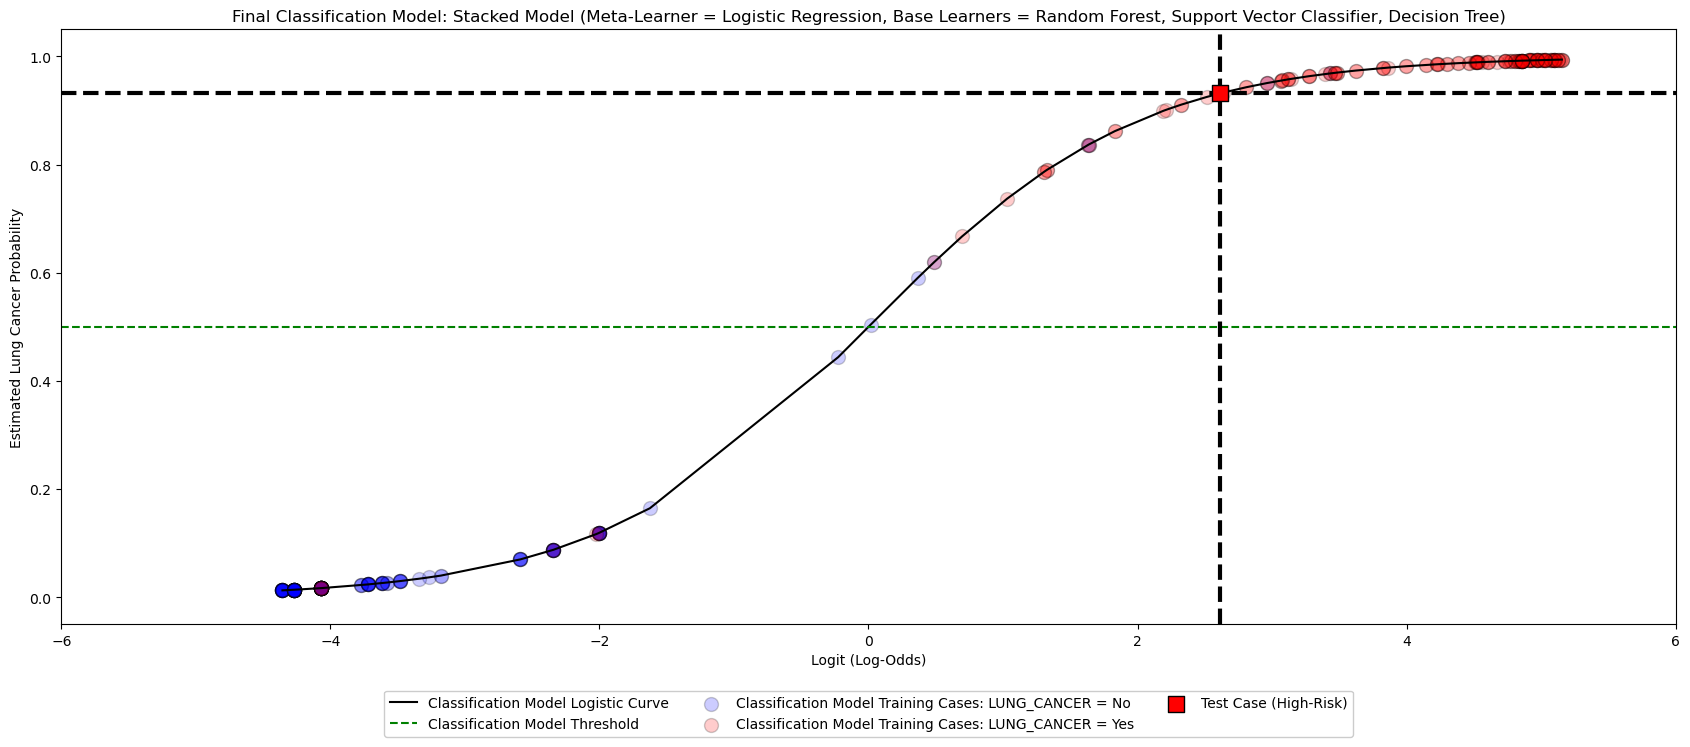

In [224]:
##################################
# Plotting the logit and estimated probability
# for the high-risk test case 
# in the estimated logistic curve
# of the final classification model
##################################
plt.figure(figsize=(17, 8))
plt.plot(stacked_balanced_class_best_model_upsampled_logit_values_sorted, 
         stacked_balanced_class_best_model_upsampled_probabilities_sorted, label='Classification Model Logistic Curve', color='black')
plt.ylim(-0.05, 1.05)
plt.xlim(-6.00, 6.00)
target_0_indices = y_train_smote == 0
target_1_indices = y_train_smote == 1
plt.axhline(0.5, color='green', linestyle='--', label='Classification Model Threshold')
plt.scatter(stacked_balanced_class_best_model_upsampled_logit_values[target_0_indices], 
            stacked_balanced_class_best_model_upsampled_probabilities[target_0_indices], 
            color='blue', alpha=0.20, s=100, marker= 'o', edgecolor='k', label='Classification Model Training Cases: LUNG_CANCER = No')
plt.scatter(stacked_balanced_class_best_model_upsampled_logit_values[target_1_indices], 
            stacked_balanced_class_best_model_upsampled_probabilities[target_1_indices], 
            color='red', alpha=0.20, s=100, marker='o', edgecolor='k', label='Classification Model Training Cases: LUNG_CANCER = Yes')
if X_sample_class == "Low-Risk":
    plt.scatter(X_sample_logit, X_sample_probability, color='blue', s=125, edgecolor='k', label='Test Case (Low-Risk)', marker= 's', zorder=5)
    plt.axvline(X_sample_logit, color='black', linestyle='--', linewidth=3)
    plt.axhline(X_sample_probability, color='black', linestyle='--', linewidth=3)
if X_sample_class == "High-Risk":
    plt.scatter(X_sample_logit, X_sample_probability, color='red', s=125, edgecolor='k', label='Test Case (High-Risk)', marker= 's', zorder=5)
    plt.axvline(X_sample_logit, color='black', linestyle='--', linewidth=3)
    plt.axhline(X_sample_probability, color='black', linestyle='--', linewidth=3)
plt.title('Final Classification Model: Stacked Model (Meta-Learner = Logistic Regression, Base Learners = Random Forest, Support Vector Classifier, Decision Tree)')
plt.xlabel('Logit (Log-Odds)')
plt.ylabel('Estimated Lung Cancer Probability')
plt.grid(False)
plt.legend(facecolor='white', framealpha=1, loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=3)
plt.tight_layout(rect=[0, 0, 1.00, 0.95])
plt.show()

# 3. References <a class="anchor" id="References"></a>

* **[Book]** [Data Preparation for Machine Learning: Data Cleaning, Feature Selection, and Data Transforms in Python](https://machinelearningmastery.com/data-preparation-for-machine-learning/) by Jason Brownlee
* **[Book]** [Feature Engineering and Selection: A Practical Approach for Predictive Models](http://www.feat.engineering/) by Max Kuhn and Kjell Johnson
* **[Book]** [Feature Engineering for Machine Learning](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/) by Alice Zheng and Amanda Casari
* **[Book]** [Applied Predictive Modeling](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) by Max Kuhn and Kjell Johnson
* **[Book]** [Data Mining: Practical Machine Learning Tools and Techniques](https://www.sciencedirect.com/book/9780123748560/data-mining-practical-machine-learning-tools-and-techniques?via=ihub=) by Ian Witten, Eibe Frank, Mark Hall and Christopher Pal 
* **[Book]** [Data Cleaning](https://dl.acm.org/doi/book/10.1145/3310205) by Ihab Ilyas and Xu Chu
* **[Book]** [Data Wrangling with Python](https://www.oreilly.com/library/view/data-wrangling-with/9781491948804/) by Jacqueline Kazil and Katharine Jarmul
* **[Book]** [Regression Modeling Strategies](https://link.springer.com/book/10.1007/978-1-4757-3462-1) by Frank Harrell
* **[Book]** [Ensemble Methods for Machine Learning](https://www.manning.com/books/ensemble-methods-for-machine-learning) by Gautam Kunapuli
* **[Book]** [Imbalanced Classification with Python: Better Metrics, Balance Skewed Classes, Cost-Sensitive Learning](https://machinelearningmastery.com/imbalanced-classification-with-python/) by Jason Brownlee
* **[Python Library API]** [NumPy](https://numpy.org/doc/) by NumPy Team
* **[Python Library API]** [pandas](https://pandas.pydata.org/docs/) by Pandas Team
* **[Python Library API]** [seaborn](https://seaborn.pydata.org/) by Seaborn Team
* **[Python Library API]** [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) by MatPlotLib Team
* **[Python Library API]** [itertools](https://docs.python.org/3/library/itertools.html) by Python Team
* **[Python Library API]** [operator](https://docs.python.org/3/library/operator.html) by Python Team
* **[Python Library API]** [sklearn.experimental](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.experimental) by Scikit-Learn Team
* **[Python Library API]** [sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) by Scikit-Learn Team
* **[Python Library API]** [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) by Scikit-Learn Team
* **[Python Library API]** [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) by Scikit-Learn Team
* **[Python Library API]** [scipy](https://docs.scipy.org/doc/scipy/) by SciPy Team
* **[Python Library API]** [sklearn.tree](https://scikit-learn.org/stable/modules/tree.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.svm](https://scikit-learn.org/stable/modules/svm.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html) by Scikit-Learn Team
* **[Python Library API]** [imblearn.over_sampling](https://imbalanced-learn.org/stable/over_sampling.html) by Imbalanced-Learn Team
* **[Python Library API]** [imblearn.under_sampling](https://imbalanced-learn.org/stable/under_sampling.html) by Imbalanced-Learn Team
* **[Article]** [Step-by-Step Exploratory Data Analysis (EDA) using Python](https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20with,distributions%20using%20Python%20programming%20language.) by Malamahadevan Mahadevan (Analytics Vidhya)
* **[Article]** [Exploratory Data Analysis in Python — A Step-by-Step Process](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee) by Andrea D'Agostino (Towards Data Science)
* **[Article]** [Exploratory Data Analysis with Python](https://medium.com/@douglas.rochedo/exploratory-data-analysis-with-python-78b6c1d479cc) by Douglas Rocha (Medium)
* **[Article]** [4 Ways to Automate Exploratory Data Analysis (EDA) in Python](https://builtin.com/data-science/EDA-python) by Abdishakur Hassan (BuiltIn)
* **[Article]** [10 Things To Do When Conducting Your Exploratory Data Analysis (EDA)](https://www.analyticsvidhya.com) by Alifia Harmadi (Medium)
* **[Article]** [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Statistical Imputation for Missing Values in Machine Learning](https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Imputing Missing Data with Simple and Advanced Techniques](https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87) by Idil Ismiguzel (Towards Data Science)
* **[Article]** [Missing Data Imputation Approaches | How to handle missing values in Python](https://www.machinelearningplus.com/machine-learning/missing-data-imputation-how-to-handle-missing-values-in-python/) by Selva Prabhakaran (Machine Learning +)
* **[Article]** [Master The Skills Of Missing Data Imputation Techniques In Python(2022) And Be Successful](https://medium.com/analytics-vidhya/a-quick-guide-on-missing-data-imputation-techniques-in-python-2020-5410f3df1c1e) by Mrinal Walia (Analytics Vidhya)
* **[Article]** [How to Preprocess Data in Python](https://builtin.com/machine-learning/how-to-preprocess-data-python) by Afroz Chakure (BuiltIn)
* **[Article]** [Easy Guide To Data Preprocessing In Python](https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html) by Ahmad Anis (KDNuggets)
* **[Article]** [Data Preprocessing in Python](https://towardsdatascience.com/data-preprocessing-in-python-b52b652e37d5) by Tarun Gupta (Towards Data Science)
* **[Article]** [Data Preprocessing using Python](https://medium.com/@suneet.bhopal/data-preprocessing-using-python-1bfee9268fb3) by Suneet Jain (Medium)
* **[Article]** [Data Preprocessing in Python](https://medium.com/@abonia/data-preprocessing-in-python-1f90d95d44f4) by Abonia Sojasingarayar (Medium)
* **[Article]** [Data Preprocessing in Python](https://medium.datadriveninvestor.com/data-preprocessing-3cd01eefd438) by Afroz Chakure (Medium)
* **[Article]** [Detecting and Treating Outliers | Treating the Odd One Out!](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/) by Harika Bonthu (Analytics Vidhya)
* **[Article]** [Outlier Treatment with Python](https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02) by Sangita Yemulwar (Analytics Vidhya)
* **[Article]** [A Guide to Outlier Detection in Python](https://builtin.com/data-science/outlier-detection-python) by Sadrach Pierre (BuiltIn)
* **[Article]** [How To Find Outliers in Data Using Python (and How To Handle Them)](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/) by Eric Kleppen (Career Foundry)
* **[Article]** [Statistics in Python — Collinearity and Multicollinearity](https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f) by Wei-Meng Lee (Towards Data Science)
* **[Article]** [Understanding Multicollinearity and How to Detect it in Python](https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc) by Terence Shin (Towards Data Science)
* **[Article]** [A Python Library to Remove Collinearity](https://www.yourdatateacher.com/2021/06/28/a-python-library-to-remove-collinearity/) by Gianluca Malato (Your Data Teacher)
* **[Article]** [How to Normalize Data Using scikit-learn in Python](https://www.digitalocean.com/community/tutorials/normalize-data-in-python) by Jayant Verma (Digital Ocean)
* **[Article]** [What are Categorical Data Encoding Methods | Binary Encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/) by Shipra Saxena  (Analytics Vidhya)
* **[Article]** [Guide to Encoding Categorical Values in Python](https://pbpython.com/categorical-encoding.html) by Chris Moffitt (Practical Business Python)
* **[Article]** [Categorical Data Encoding Techniques in Python: A Complete Guide](https://soumenatta.medium.com/categorical-data-encoding-techniques-in-python-a-complete-guide-a913aae19a22) by Soumen Atta (Medium)
* **[Article]** [Categorical Feature Encoding Techniques](https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24) by Tara Boyle (Medium)
* **[Article]** [Ordinal and One-Hot Encodings for Categorical Data](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Hypothesis Testing with Python: Step by Step Hands-On Tutorial with Practical Examples](https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e) by Ece Işık Polat (Towards Data Science)
* **[Article]** [17 Statistical Hypothesis Tests in Python (Cheat Sheet)](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [A Step-by-Step Guide to Hypothesis Testing in Python using Scipy](https://medium.com/@gabriel_renno/a-step-by-step-guide-to-hypothesis-testing-in-python-using-scipy-8eb5b696ab07) by Gabriel Rennó (Medium)
* **[Article]** [How to Evaluate Classification Models in Python: A Beginner's Guide](https://builtin.com/data-science/evaluating-classification-models) by Sadrach Pierre (BuiltIn)
* **[Article]** [Machine Learning Classifiers Comparison with Python](https://towardsdatascience.com/machine-learning-classifiers-comparison-with-python-33149aecdbca) by Roberto Salazar (Towards Data Science)
* **[Article]** [Top 6 Machine Learning Algorithms for Classification](https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501) by Destin Gong (Towards Data Science)
* **[Article]** [Metrics For Evaluating Machine Learning Classification Models](https://towardsdatascience.com/metrics-for-evaluating-machine-learning-classification-models-python-example-59b905e079a5) by Cory Maklin (Towards Data Science)
* **[Article]** [Evaluation Metrics for Classification Problems with Implementation in Python](https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3) by Venu Gopal Kadamba (Medium)
* **[Article]** [Tour of Evaluation Metrics for Imbalanced Classification](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Metrics To Evaluate Machine Learning Algorithms in Python](https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [How To Compare Machine Learning Algorithms in Python with scikit-learn](https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [How to Deal With Imbalanced Classification and Regression Data](https://neptune.ai/blog/how-to-deal-with-imbalanced-classification-and-regression-data) by Prince Canuma (Neptune.AI)
* **[Article]** [Random Oversampling and Undersampling for Imbalanced Classification](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [How to Handle Imbalance Data and Small Training Sets in ML](https://towardsdatascience.com/how-to-handle-imbalance-data-and-small-training-sets-in-ml-989f8053531d) by Ege Hosgungor (Towards Data Science)
* **[Article]** [Class Imbalance Strategies — A Visual Guide with Code](https://towardsdatascience.com/class-imbalance-strategies-a-visual-guide-with-code-8bc8fae71e1a) by Travis Tang (Towards Data Science)
* **[Article]** [Machine Learning: How to Handle Class Imbalance](https://medium.com/analytics-vidhya/machine-learning-how-to-handle-class-imbalance-920e48c3e970) by Ken Hoffman (Medium)
* **[Article]** [Handling Class Imbalance in Machine Learning](https://medium.com/mlearning-ai/handling-class-imbalance-in-machine-learning-cb1473e825ce) by Okan Yenigün (Medium)
* **[Article]** [Undersampling Algorithms for Imbalanced Classification](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Condensed Nearest Neighbor Rule Undersampling (CNN) & TomekLinks](https://bobrupakroy.medium.com/condensed-nearest-neighbor-rule-undersampling-cnn-380c0d84ca88) by Rupak Roy (Medium)
* **[Article]** [CNN (Condensed Nearest Neighbors)](https://abhic159.medium.com/cnn-condensed-nearest-neighbors-3261bd0c39fb) by Abhishek (Medium)
* **[Article]** [Synthetic Minority Over-sampling TEchnique (SMOTE)](https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c) by Cory Maklin (Medium)
* **[Article]** [SMOTE for Imbalanced Classification with Python](https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/) by Swastik Satpathy (Analytics Vidhya)
* **[Article]** [An Introduction to SMOTE](https://www.kdnuggets.com/2022/11/introduction-smote.html#:~:text=SMOTE%20(Synthetic%20Minority%20Oversampling%20Technique)%20is%20an%20oversampling%20method%20of,a%20point%20along%20that%20line.) by Abid Ali Awan (KD Nuggets)
* **[Article]** [A Comprehensive Guide to Ensemble Learning (with Python codes)](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/) by Aishwarya Singh (Analytics Vidhya)
* **[Article]** [Stacked Ensembles — Improving Model Performance on a Higher Level](https://towardsdatascience.com/stacked-ensembles-improving-model-performance-on-a-higher-level-99ffc4ea5523) by Yenwee Lim (Towards Data Science)
* **[Article]** [Stacking to Improve Model Performance: A Comprehensive Guide on Ensemble Learning in Python](https://medium.com/@brijesh_soni/stacking-to-improve-model-performance-a-comprehensive-guide-on-ensemble-learning-in-python-9ed53c93ce28) by Brijesh Soni (Medium)
* **[Article]** [Stacking Ensemble Machine Learning With Python](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/) by Jason Brownlee (Machine Learning Mastery)
* **[Publication]** [Data Quality for Machine Learning Tasks](https://journals.sagepub.com/doi/10.1177/0962280206074463) by Nitin Gupta, Shashank Mujumdar, Hima Patel, Satoshi Masuda, Naveen Panwar, Sambaran Bandyopadhyay, Sameep Mehta, Shanmukha Guttula, Shazia Afzal, Ruhi Sharma Mittal and Vitobha Munigala (KDD ’21: Proceedings of the 27th ACM SIGKDD Conference on Knowledge Discovery & Data Mining)
* **[Publication]** [Overview and Importance of Data Quality for Machine Learning Tasks](https://dl.acm.org/doi/10.1145/3394486.3406477) by Abhinav Jain, Hima Patel, Lokesh Nagalapatti, Nitin Gupta, Sameep Mehta, Shanmukha Guttula, Shashank Mujumdar, Shazia Afzal, Ruhi Sharma Mittal and Vitobha Munigala (KDD ’20: Proceedings of the 26th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining)
* **[Publication]** [Mathematical Contributions to the Theory of Evolution: Regression, Heredity and Panmixia](https://royalsocietypublishing.org/doi/10.1098/rsta.1896.0007) by Karl Pearson (Royal Society)
* **[Publication]** [The Probable Error of the Mean](http://seismo.berkeley.edu/~kirchner/eps_120/Odds_n_ends/Students_original_paper.pdf) by Student (Biometrika)
* **[Publication]** [On the Criterion That a Given System of Deviations from the Probable in the Case of a Correlated System of Variables is Such That It can Be Reasonably Supposed to Have Arisen From Random Sampling](https://www.tandfonline.com/doi/abs/10.1080/14786440009463897) by Karl Pearson (Philosophical Magazine)
* **[Publication]** [The Origins of Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) by JS Cramer (Econometrics eJournal)
* **[Publication]** [Classification and Regression Trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) by Leo Breiman, Jerome Friedman, Richard Olshen and Charles Stone (Computer Science)
* **[Publication]** [Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) by Leo Breiman (Machine Learning)
* **[Publication]** [A Training Algorithm for Optimal Margin Classifiers](https://dl.acm.org/doi/10.1145/130385.130401) by Bernhard Boser, Isabelle Guyon and Vladimir Vapnik (Proceedings of the Fifth Annual Workshop on Computational Learning Theory)
* **[Publication]** [SMOTE: Synthetic Minority Over-Sampling Technique](https://dl.acm.org/doi/10.5555/1622407.1622416) by Nitesh Chawla, Kevin Bowyer, Lawrence Hall and Philip Kegelmeyer (Journal of Artificial Intelligence Research)
* **[Publication]** [The Condensed Nearest Neighbor Rule](https://ieeexplore.ieee.org/document/1054155) by Peter Hart (IEEE Transactions on Information Theory)
* **[Course]** [DataCamp Python Data Analyst Certificate](https://app.datacamp.com/learn/career-tracks/data-analyst-with-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Python Associate Data Scientist Certificate](https://app.datacamp.com/learn/career-tracks/associate-data-scientist-in-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Python Data Scientist Certificate](https://app.datacamp.com/learn/career-tracks/data-scientist-in-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Machine Learning Scientist Certificate](https://app.datacamp.com/learn/career-tracks/machine-learning-scientist-with-python) by DataCamp Team (DataCamp)
* **[Course]** [IBM Data Analyst Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-analyst) by IBM Team (Coursera)
* **[Course]** [IBM Data Science Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-science) by IBM Team (Coursera)
* **[Course]** [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning) by IBM Team (Coursera)

In [225]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))